# Background Information
ABC Estate Wines is a wine manufacturer that produces various distinct wine varieties. They possess sales data from the 20th century, which they aim to analyze for valuable insights and forecasts. By leveraging this data, the company seeks to improve sales performance and capitalize on emerging market opportunities, helping them maintain a competitive edge in the wine industry.
# Business Context
To stay competitive in the market, leveraging historical data to uncover meaningful insights, trends, and patterns is essential for identifying emerging opportunities and boosting sales performance. With this goal in mind, ABC Estate Wines seeks to use its historical sales data for time series forecasting, enabling them to make data-driven decisions and optimize their future sales strategies.
# Problem Statement
The objective of this analysis is to examine ABC Estate Wines' sales data for various wine variants from the 20th century, utilizing data analytics and forecasting techniques to identify trends and patterns. These insights will help understand market dynamics and support informed strategic decisions, ultimately enhancing sales performance and maintaining a competitive edge in the wine industry.
# Data Dictionary
### Rose
1. YearMonth: Time stamp
2. Rose: Sales volume of rose wine

### Sparkling
1. YearMonth: Time stamp
2. Sparkling: Sales volume of sparkling wine

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [2]:
# version of libraries used
print(f'version of numpy used: {np.__version__}')
print(f'version of pandas used: {pd.__version__}')
print(f'version of matplotlib used: {matplotlib.__version__}')
print(f'version of seaborn used: {sns.__version__}')

version of numpy used: 1.24.3
version of pandas used: 2.0.3
version of matplotlib used: 3.7.2
version of seaborn used: 0.12.2


For our analysis ABC Estate Wine has shared data for 2 distinct varieties of wine namely Rose and Sparkling, we will be analyzing both these varieties  separately 
## Analyzing Rose wine data
### Uploading Data

In [3]:
rose = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/TSF/Rose.csv')

### Data Overview
#### Glimpse of Data

In [4]:
rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

#### Shape of Dataset

In [5]:
print("shape of the dataset")
print("----------------------------------------------------------------------------")
display(rose.shape)

shape of the dataset
----------------------------------------------------------------------------


(187, 2)

#### Information of Features

In [6]:
print("information of features")
print("----------------------------------------------------------------------------")
rose.info()

information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


#### Statistical Summary

In [7]:
print("statistical summary")
print("----------------------------------------------------------------------------")
rose.describe().T

statistical summary
----------------------------------------------------------------------------


count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

#### Checking for Missing Values

In [8]:
print('Number of rows with missing values:') 
print("----------------------------------------------------------------------------")
rose.isnull().sum()

Number of rows with missing values:
----------------------------------------------------------------------------


YearMonth    0
Rose         2
dtype: int64

In [9]:
# Display rows which has missing data
rows_with_missing = rose[rose.isnull().any(axis=1)]
print(rows_with_missing)

    YearMonth  Rose
174   1994-07   NaN
175   1994-08   NaN


#### Checking for Duplicates

In [10]:
print("checking for duplicates")
print("----------------------------------------------------------------------------")
print(f"number of dupliacte rows: {rose.duplicated().sum()}")

checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


#### Key Observations
1. Dataset has 187 rows and 2 columns in which YearMonth column has object type data which should be datetime, we will convert it into datetime data time and set it as inde to change data into a tme series data.
2. There are missing values in the data which we will treat during pre-processing.

### Converting Data to Time Series

In [11]:
rose['YearMonth'] = pd.to_datetime(rose['YearMonth'], format= '%Y-%m')
rose.set_index('YearMonth', inplace= True)
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [12]:
rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### Exploratory Data Analysis

#### Plotting Data

In [13]:
# setting subsequent figure size
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

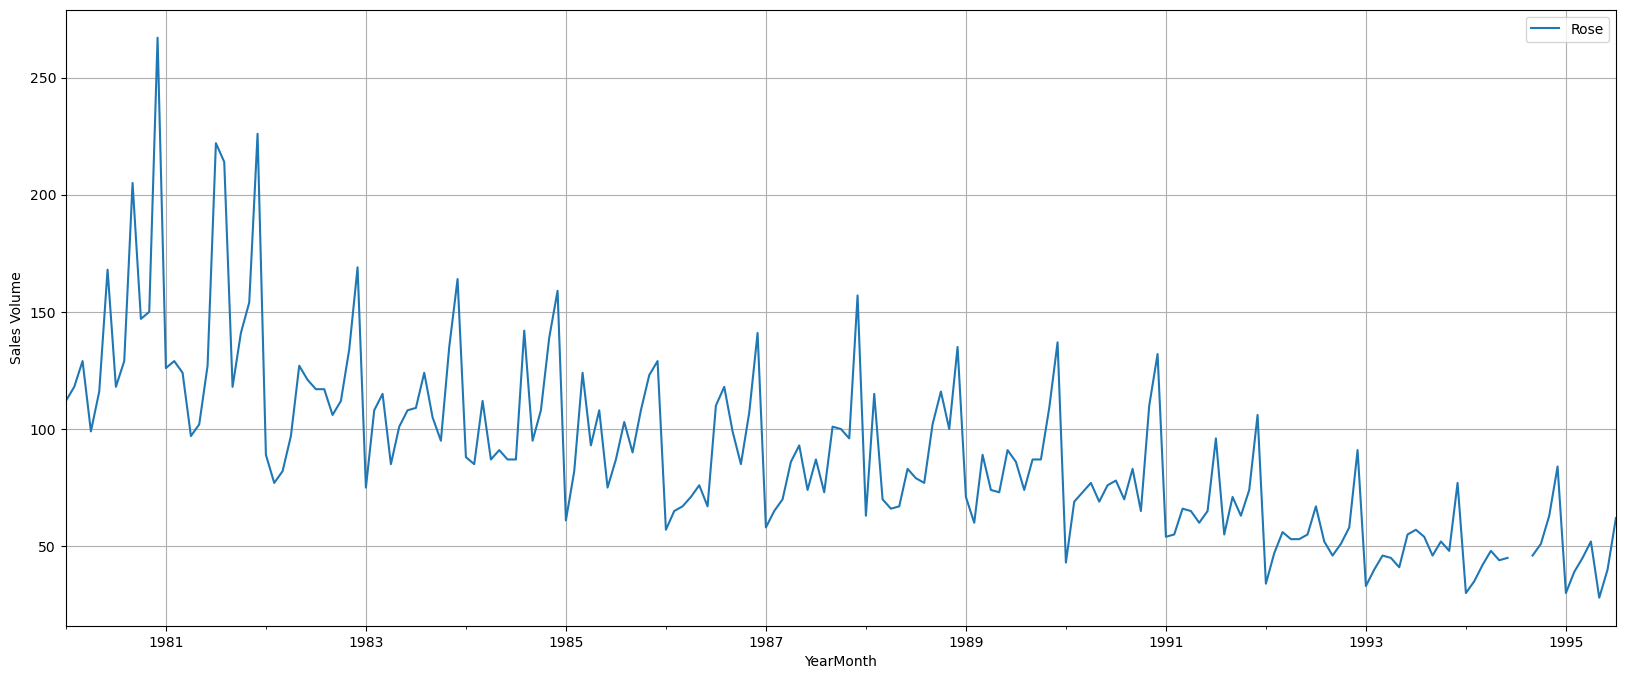

In [14]:
rose.plot()
plt.ylabel('Sales Volume')
plt.grid()

#### Boxplot by Year

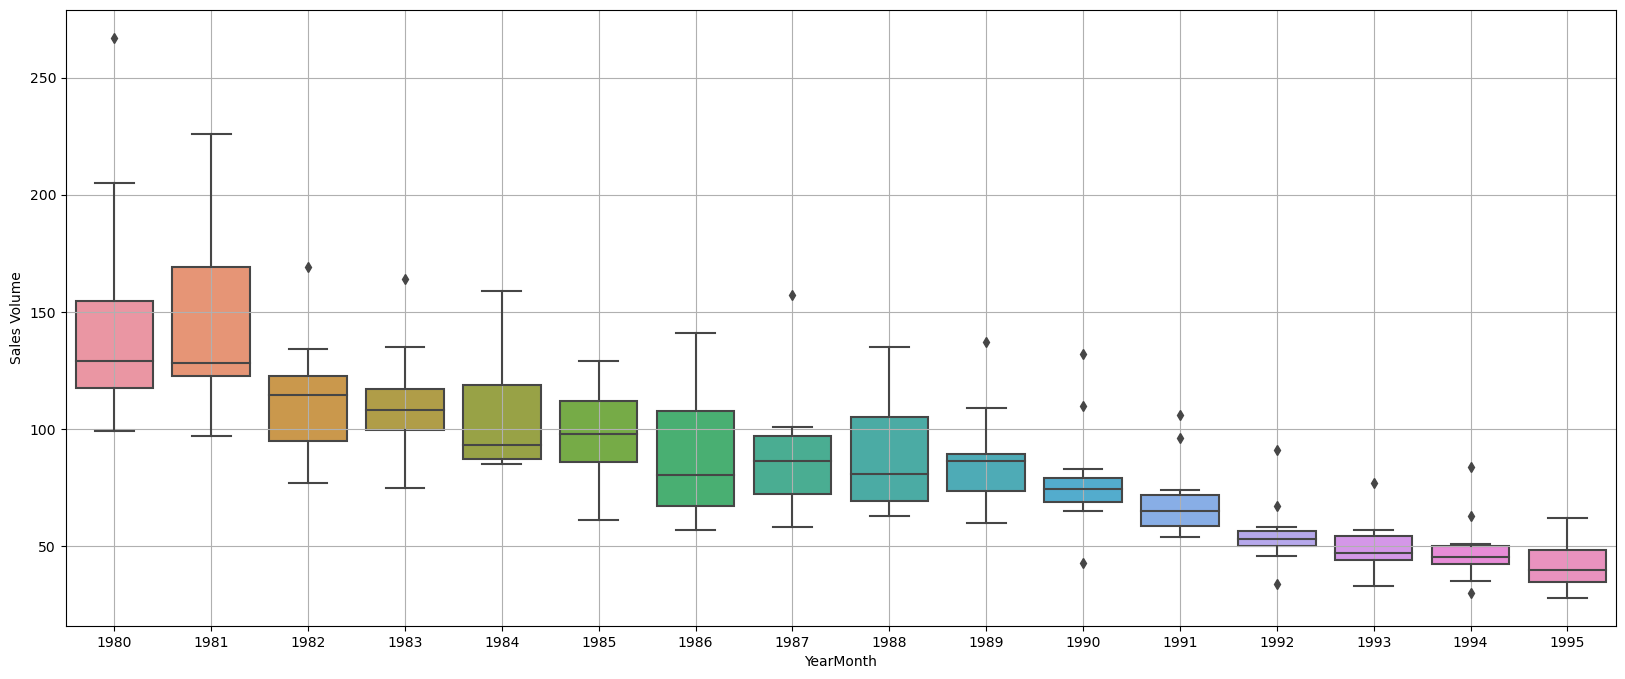

In [15]:
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.ylabel('Sales Volume')
plt.grid();

#### Boxplot by Month

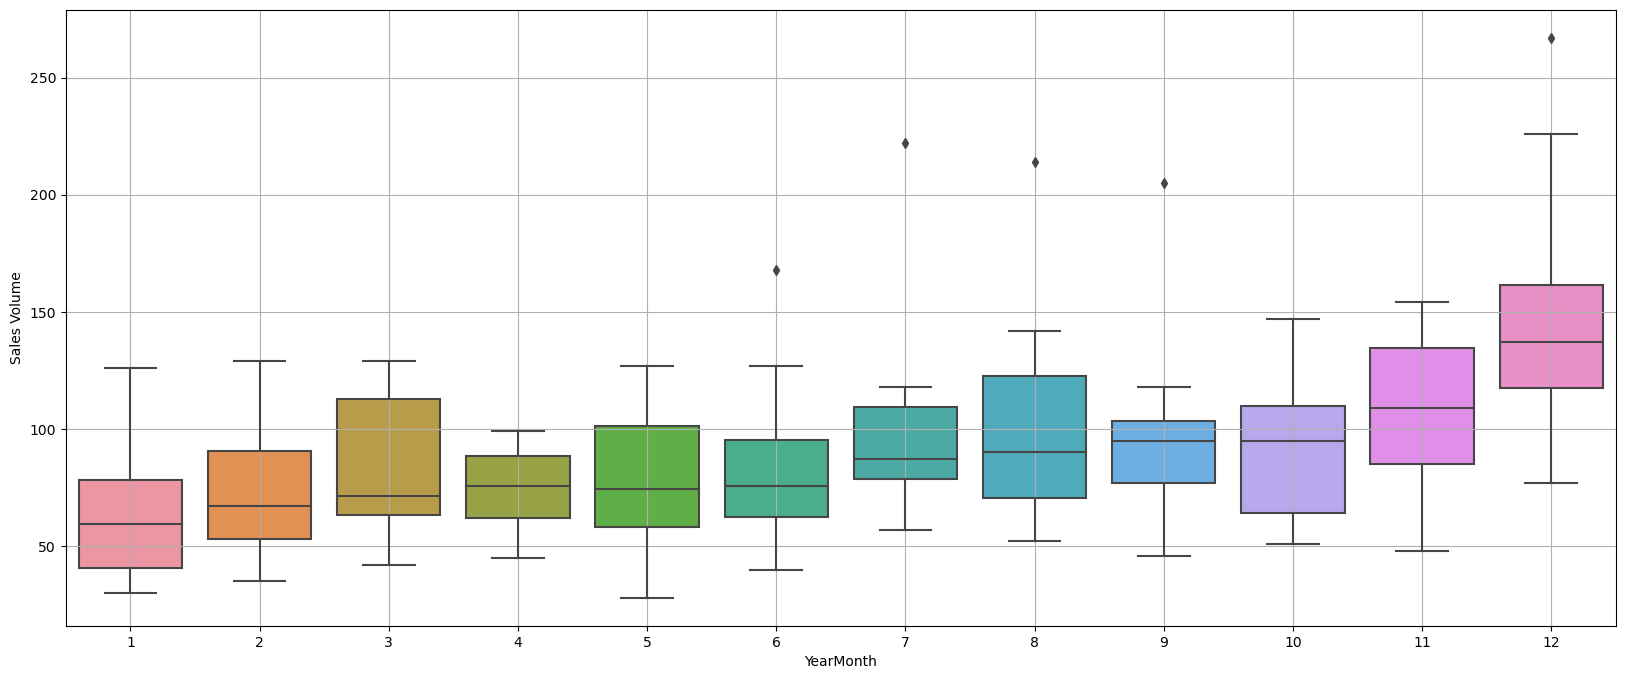

In [16]:
sns.boxplot(x = rose.index.month,y = rose['Rose'])
plt.ylabel('Sales Volume')
plt.grid();

#### Time Series Monthplot

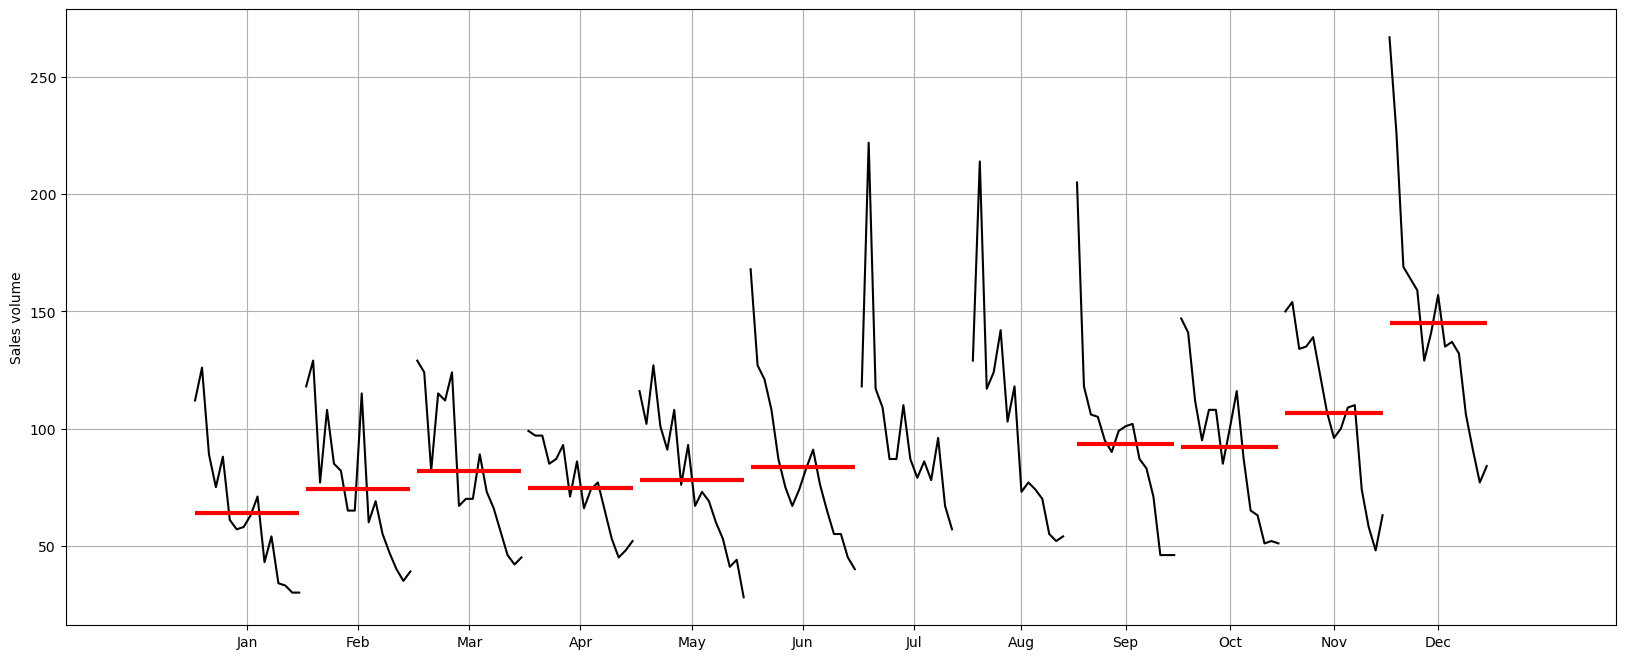

In [17]:
# time series monthplot to understand the spread of Sales across different years
month_plot(rose['Rose'],ylabel='Sales volume')
plt.grid();

#### Monthly Sales across Years

In [18]:
# Pivot table across month and year
monthly_table_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
monthly_table_across_years

YearMonth     1      2      3     4      5      6      7      8      9   \
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994        30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983        95.0  135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986        85.0  107.0  141.0  
1987       100.0   96.0  157.0  
1988       116.0  100.0  135.0  
1989        87.0  109.0  137.0  
1990        65.0  110.0  132.0  
1991        63.0   74.0  106.0  
1992        51.0   58.0   91.0  
1993        52.0   48.0   77.0  
1994        51.0   63.0   84.0  
1995         NaN    NaN    NaN

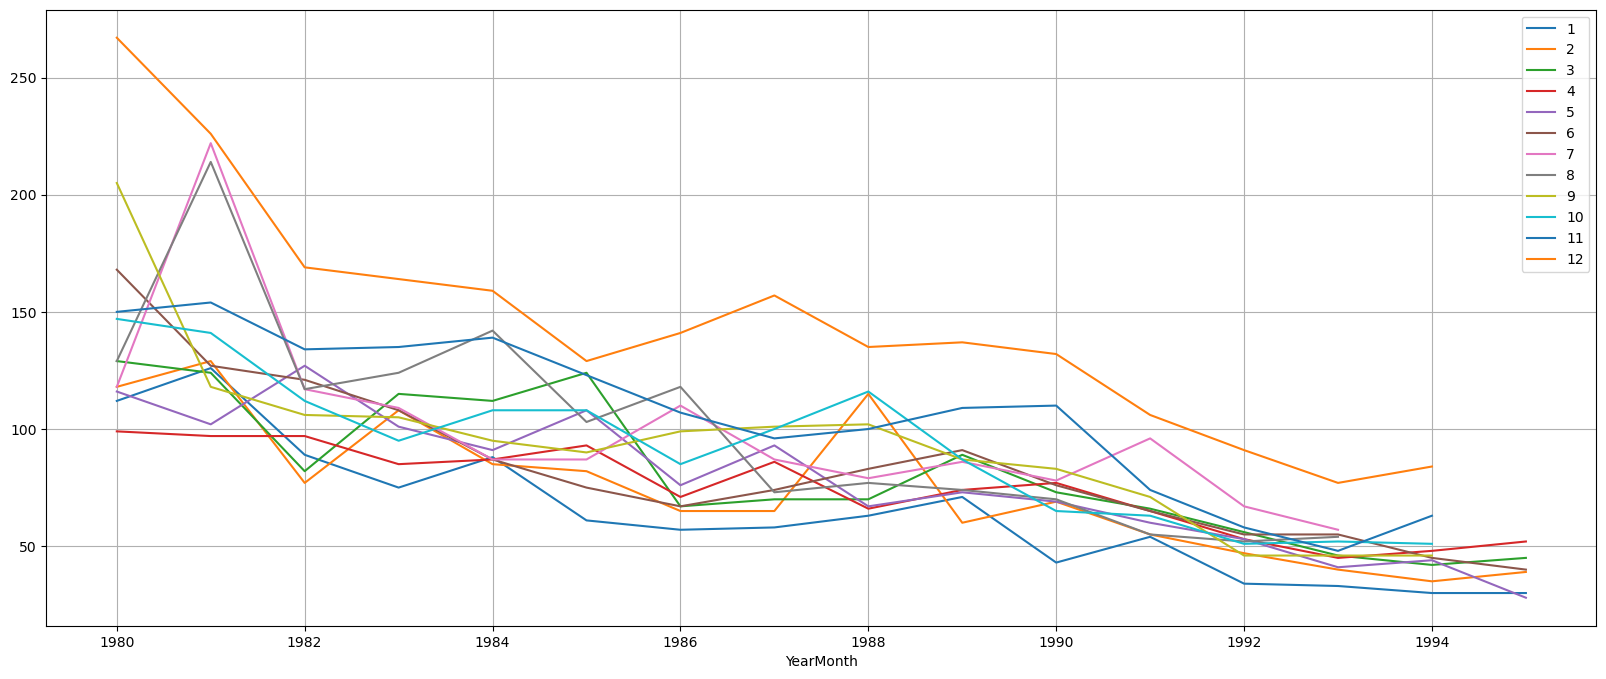

In [19]:
# Plot the table
monthly_table_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Yearly Sales across Months

In [20]:
# Pivot table across year and month
yearly_table_across_months = pd.pivot_table(rose, values = 'Rose', columns = rose.index.year, index = rose.index.month)
yearly_table_across_months

YearMonth   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
YearMonth                                                                  
1          112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   
2          118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   
3          129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   
4           99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   
5          116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   
6          168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   
7          118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   
8          129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   
9          205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   
10         147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   
11         150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0   
12         267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0   

YearMonth   1989   1990   1991  1992  1993  1994  1995  
YearMonth                                               
1           71.0   43.0   54.0  34.0  33.0  30.0  30.0  
2           60.0   69.0   55.0  47.0  40.0  35.0  39.0  
3           89.0   73.0   66.0  56.0  46.0  42.0  45.0  
4           74.0   77.0   65.0  53.0  45.0  48.0  52.0  
5           73.0   69.0   60.0  53.0  41.0  44.0  28.0  
6           91.0   76.0   65.0  55.0  55.0  45.0  40.0  
7           86.0   78.0   96.0  67.0  57.0   NaN  62.0  
8           74.0   70.0   55.0  52.0  54.0   NaN   NaN  
9           87.0   83.0   71.0  46.0  46.0  46.0   NaN  
10          87.0   65.0   63.0  51.0  52.0  51.0   NaN  
11         109.0  110.0   74.0  58.0  48.0  63.0   NaN  
12         137.0  132.0  106.0  91.0  77.0  84.0   NaN

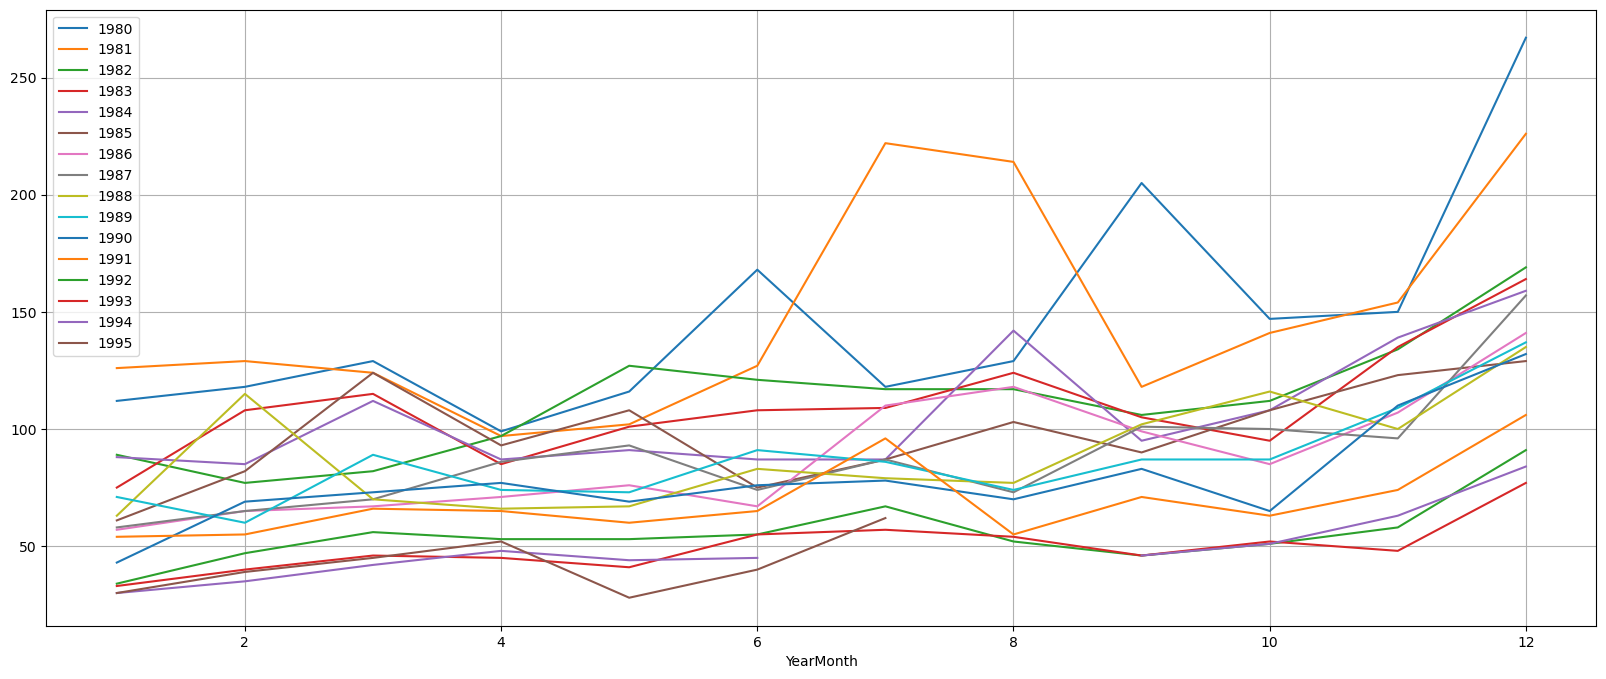

In [21]:
# Plot the table
yearly_table_across_months.plot()
plt.grid()
plt.legend(loc='best');

#### Emperical Cumulative Sales Distribution 

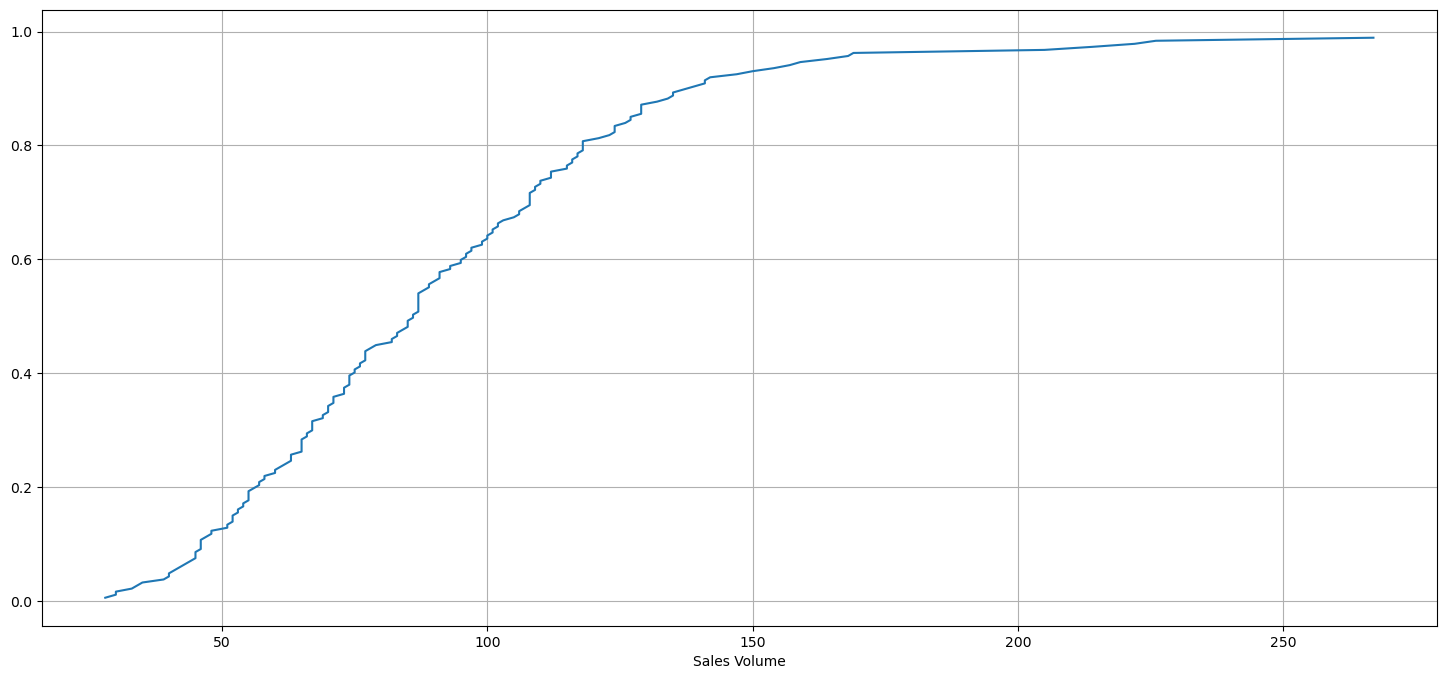

In [22]:
plt.figure(figsize = (18, 8))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales Volume');

#### Average Sales Volume per month and the month on month percentage change of Sales Volume.

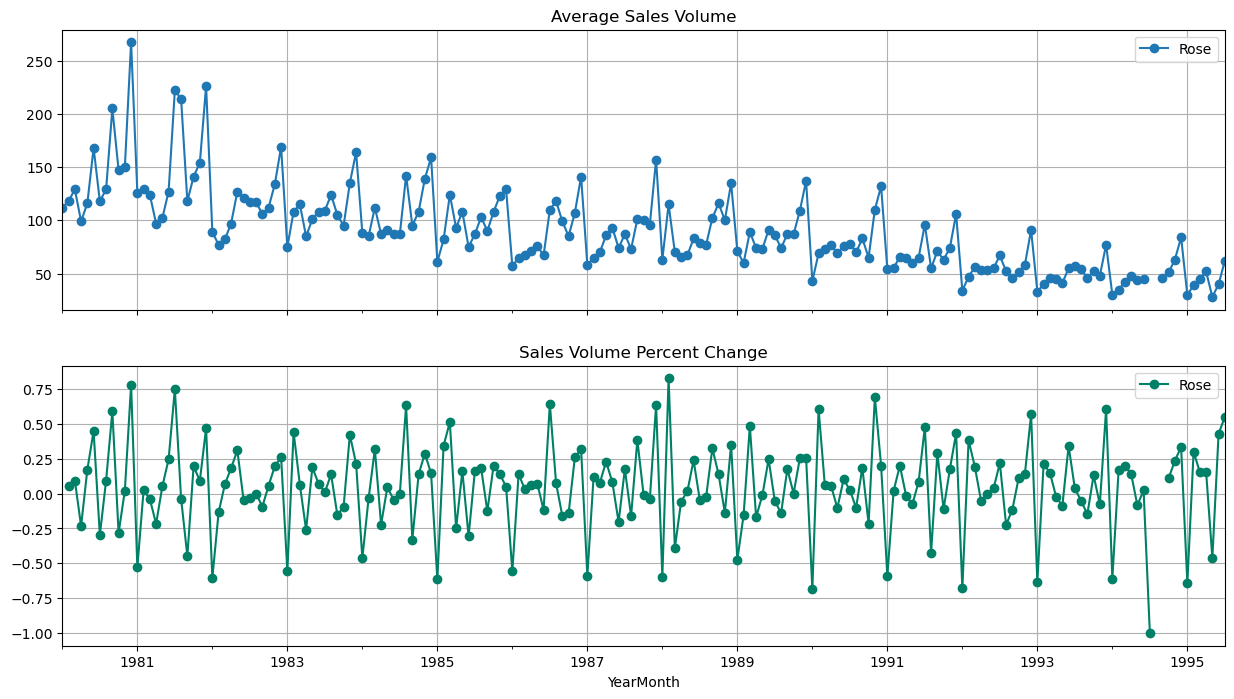

In [23]:
# group by date and get average Sales Volume, and precent change
average    = rose.groupby(rose.index)["Rose"].mean()
pct_change = rose.groupby(rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales volume over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales Volume",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales volume over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Volume Percent Change",grid=True)

#### Key Observations
1. Data is showing both trend and seasonality where trend is downward meaning from 1981 till 1995 we are seeing a steady decline in sales of Rose wine and this change is sales in multiplicative in nature.
2. Seasonally, the highest sales occur in December, while the lowest are observed in January. Sales typically show a steady increase from January through November, followed by a significant spike in December.

### Data Pre-processing
#### Treating Missing Values
For missing values we will be using interpolate with method as 'linear'.

In [24]:
rose['Rose'] = rose['Rose'].interpolate(method='linear', limit_direction='forward')

In [25]:
print('Number of rows with missing values:') 
rose.isnull().sum()

Number of rows with missing values:


Rose    0
dtype: int64

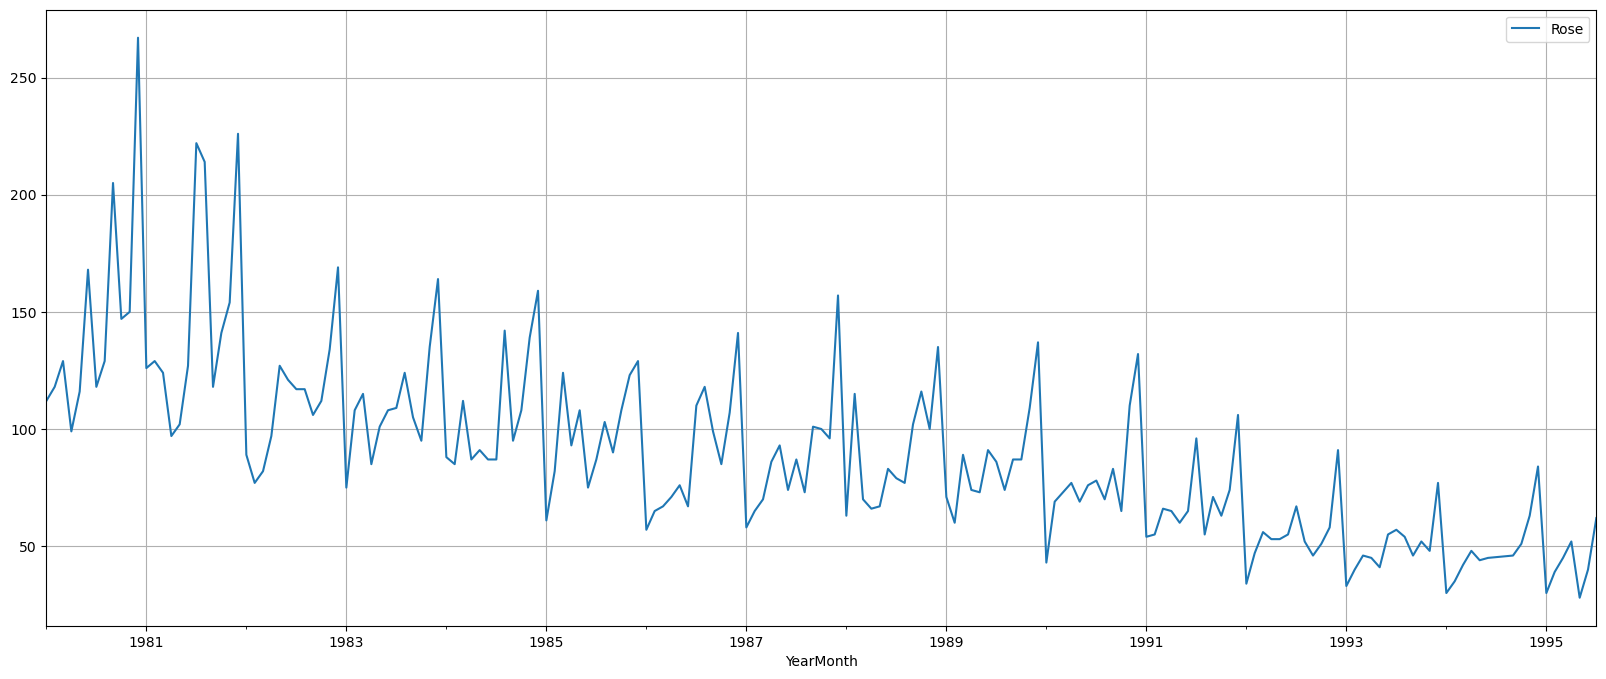

In [26]:
# plotting processed data
rose.plot()
plt.grid();

### Data Decomposition

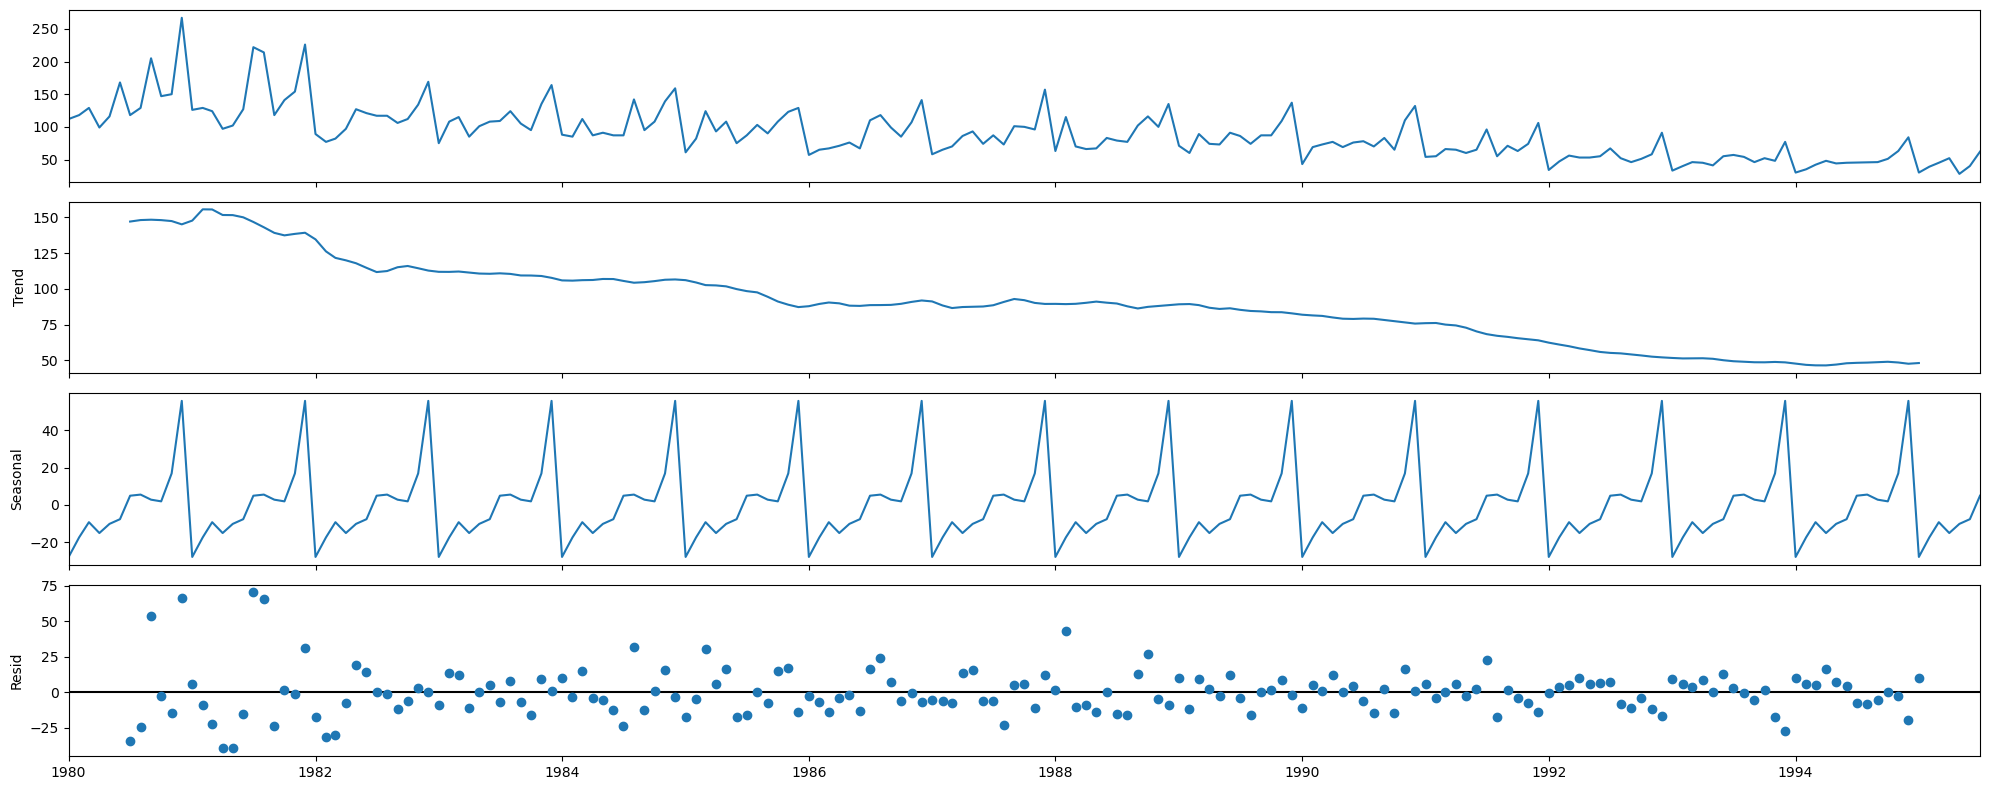

In [27]:
decomposition = seasonal_decompose(rose, model= 'additive')
decomposition.plot();

Upon decomposing the data, we can observe both trend and seasonality in the data where like we have mentioned during the, EDA trend is downward in nature. The magnitude of fluctuations in the residuals decreases over time, indicating that a multiplicative model would be more suitable. Therefore, we will proceed with decomposition by specifying the model as multiplicative.

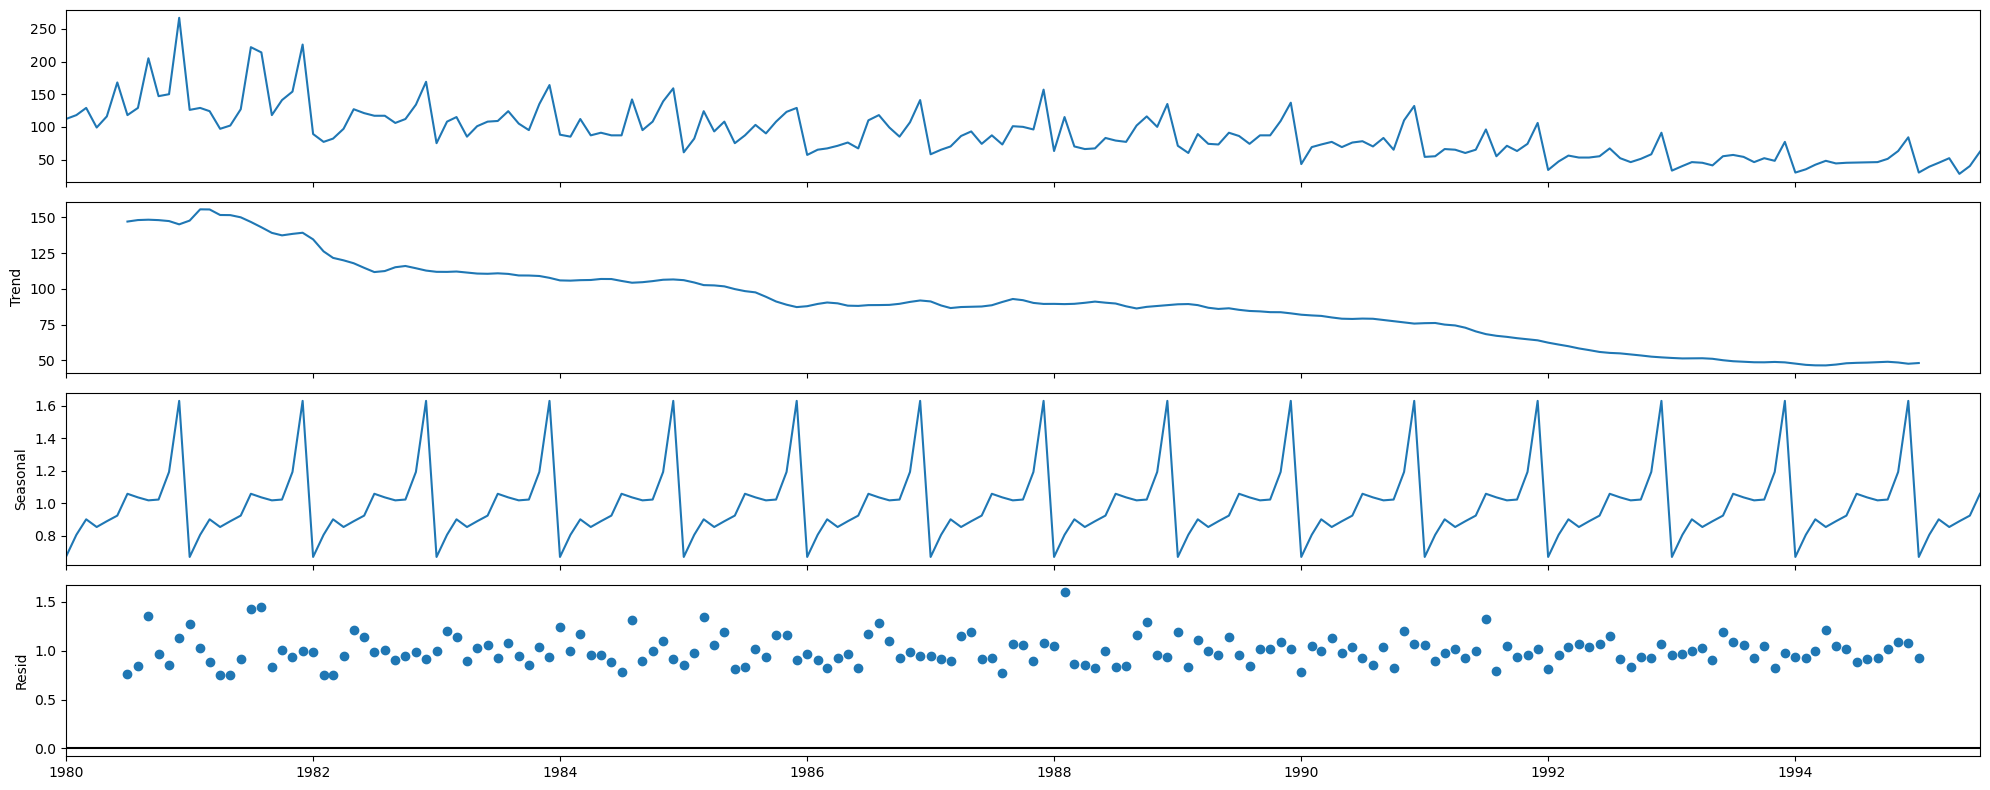

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rose, model= 'multiplicative')
decomposition.plot();

Fluctuations in the residuals have become more consistent indicating that a multiplicative model is better.

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

### Splitting Data

In [30]:
train=rose[rose.index.year < 1991]
test=rose[rose.index.year >= 1991]

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### Model Building - Original Data
#### Linear Regression Model

In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
train_time = [i+1 for i in range(len(LinearRegression_train))]
test_time = [i+43 for i in range(len(LinearRegression_test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



In [35]:
lr = LinearRegression()

In [36]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

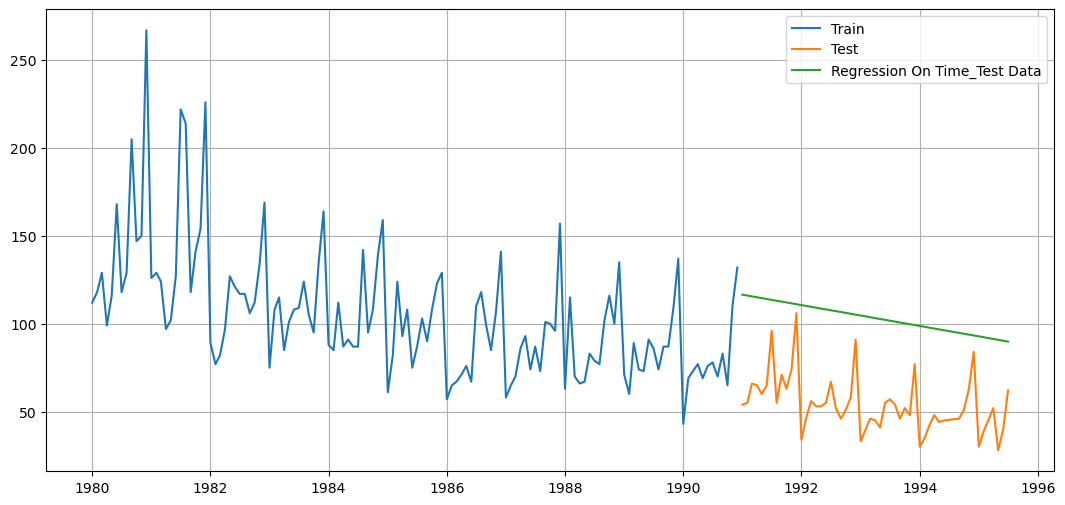

In [37]:
test_predictions_model1    = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

##### Model Evaluation

In [38]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.43


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  51.433312

#### SImple Average Model

In [40]:
train.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [41]:
SimpleAverage_test = test.copy()
SimpleAverage_test.head()

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

In [42]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

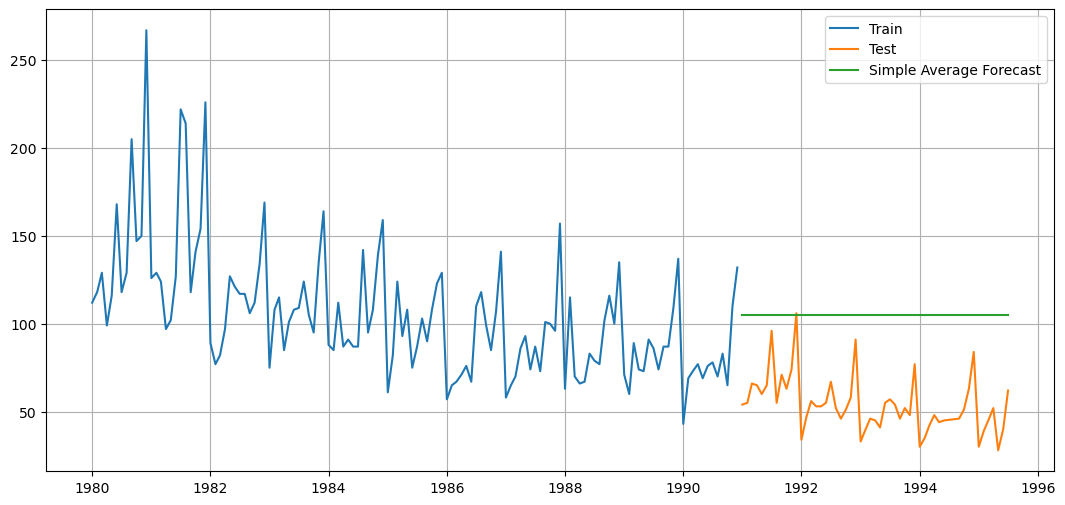

In [43]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.grid();

##### Model Evaluation

In [44]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For SimpleAverage forecast on the Test Data,  RMSE is %3.2f" %(rmse_model2_test))

For SimpleAverage forecast on the Test Data,  RMSE is 53.46


In [45]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['SimpleAverage_Forecast'])
tempDf

Test RMSE
SimpleAverage_Forecast   53.46057

In [46]:
resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime        51.433312
SimpleAverage_Forecast  53.460570

#### Moving Average Model

In [47]:
MovingAverage =rose.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [48]:
# trailing moving average
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN
1980-08-01  129.0       123.5      132.75  126.500000         NaN
1980-09-01  205.0       167.0      155.00  139.166667  132.666667
1980-10-01  147.0       176.0      149.75  147.166667  136.555556

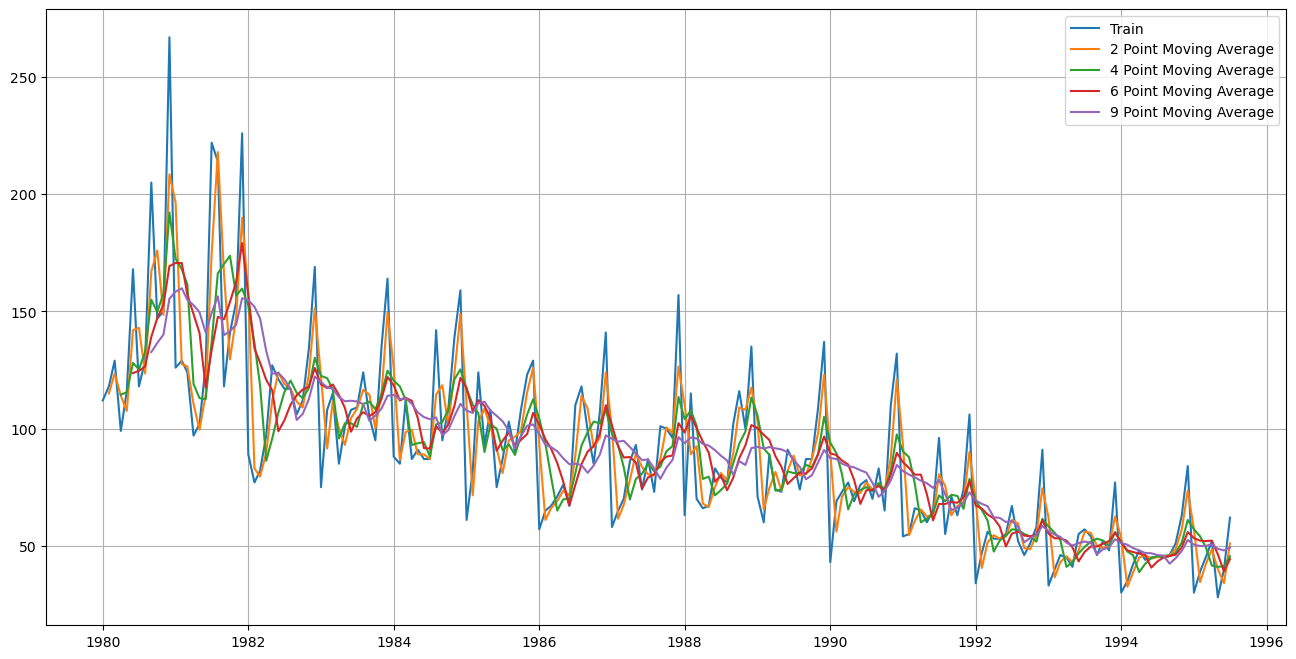

In [49]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [50]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

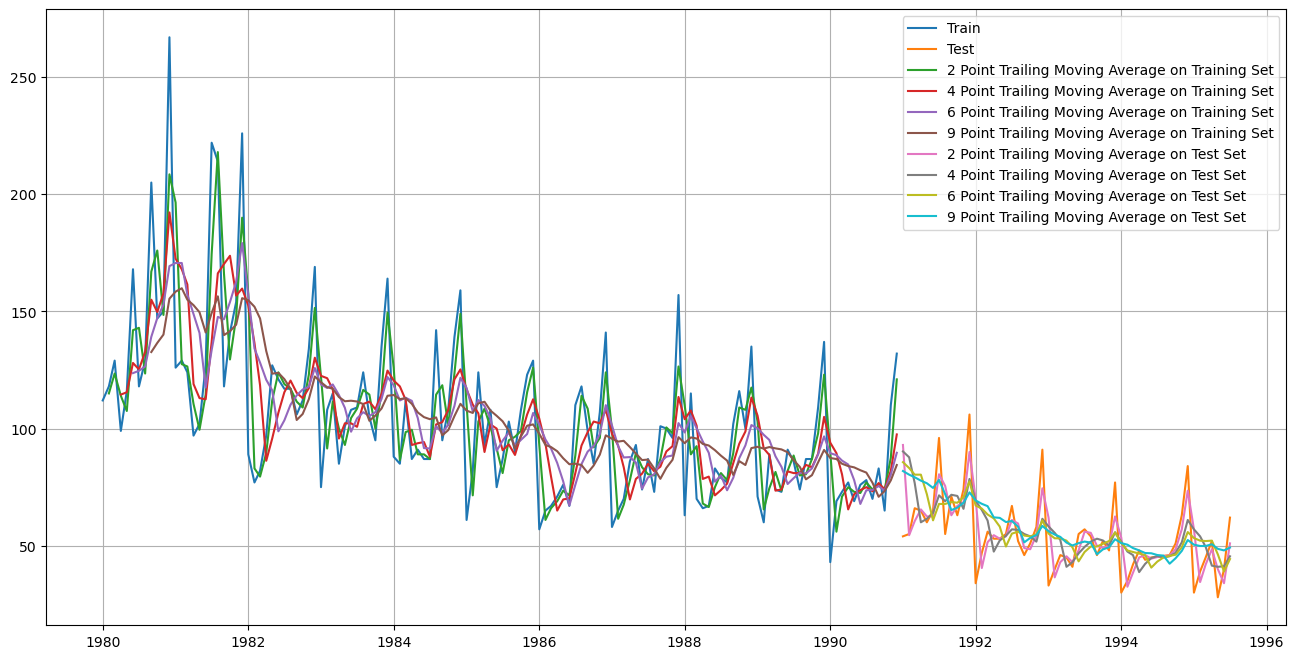

In [51]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

##### Model Evaluation

In [52]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model3_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model3_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model3_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model3_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [53]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime             51.433312
SimpleAverage_Forecast       53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

#### Exponential Model
##### Single Exponential Model

In [54]:
SES_train = train.copy()
SES_test = test.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.12362013444181875,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [57]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.983765
1991-02-01  55.0  87.983765
1991-03-01  66.0  87.983765
1991-04-01  65.0  87.983765
1991-05-01  60.0  87.983765

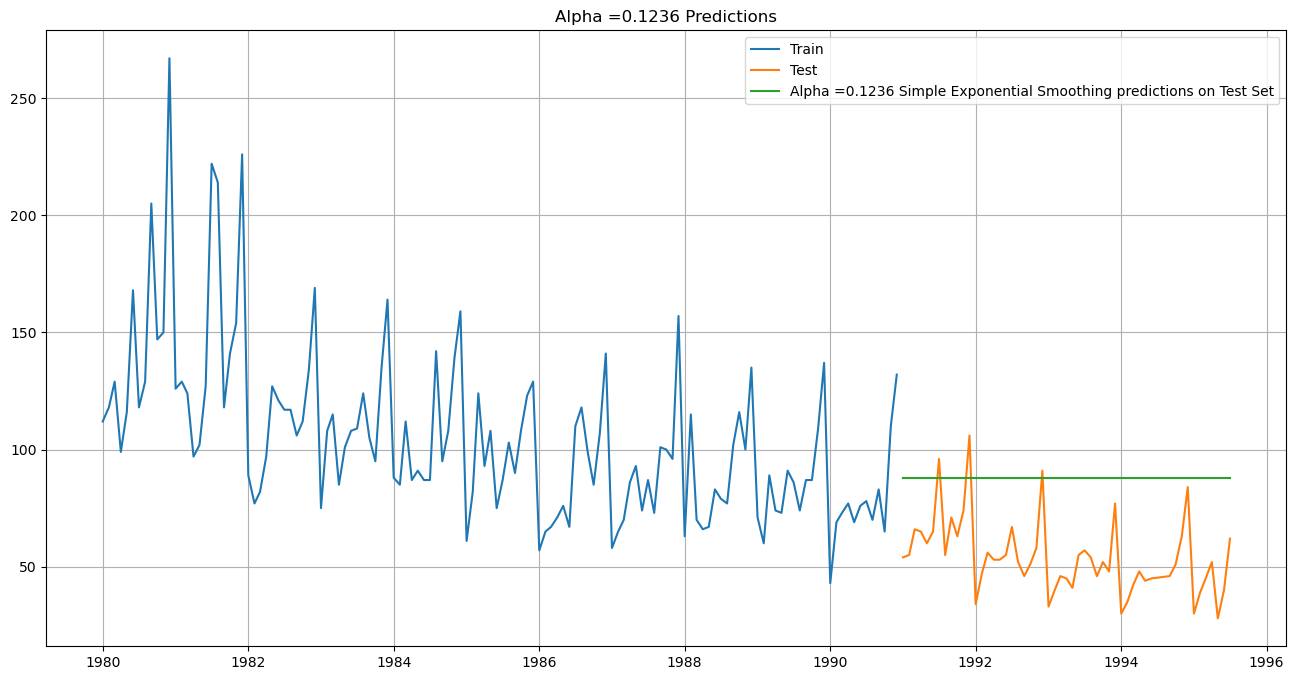

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.1236 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1236 Predictions');

##### Model Evaluation

In [59]:
## Test Data

rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))

For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [60]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.1236,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                         51.433312
SimpleAverage_Forecast                   53.460570
2pointTrailingMovingAverage              11.529278
4pointTrailingMovingAverage              14.451403
6pointTrailingMovingAverage              14.566327
9pointTrailingMovingAverage              14.727630
Alpha=0.1236,SimpleExponentialSmoothing  37.592212

##### Double Exponential Smoothing

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['Rose'], initialization_method='estimated')

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  72.063238
1991-02-01  55.0  71.568859
1991-03-01  66.0  71.074481
1991-04-01  65.0  70.580103
1991-05-01  60.0  70.085725

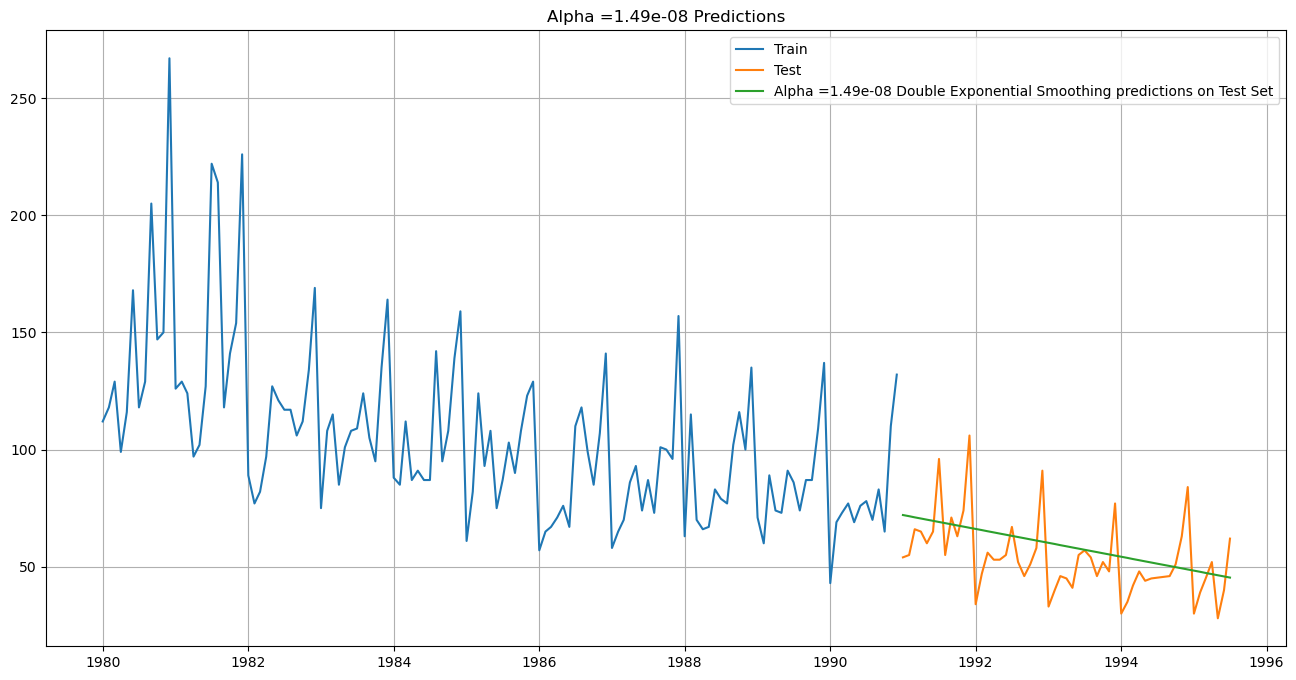

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =1.49e-08 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1.49e-08 Predictions');

##### Model Evaluation

In [66]:
## Test Data

rmse_model4_test_2 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =1.49e-08 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_2))

For Alpha =1.49e-08 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.269


In [67]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_2]},index=['Alpha=1.49e-08,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                           51.433312
SimpleAverage_Forecast                     53.460570
2pointTrailingMovingAverage                11.529278
4pointTrailingMovingAverage                14.451403
6pointTrailingMovingAverage                14.566327
9pointTrailingMovingAverage                14.727630
Alpha=0.1236,SimpleExponentialSmoothing    37.592212
Alpha=1.49e-08,DoubleExponentialSmoothing  15.268944

##### Triple Exponential Smoothing

In [68]:
TES_train = train.copy()
TES_test = test.copy()

In [69]:
model_TES = ExponentialSmoothing(TES_train['Rose'], trend= 'additive', 
                                 seasonal = 'additive', initialization_method= 'estimated')

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [70]:
model_TES_autofit = model_TES.fit(optimized=True)
model_TES_autofit.params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
TES_test['predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  42.684928
1991-02-01  55.0  54.564005
1991-03-01  66.0  61.995209
1991-04-01  65.0  50.852018
1991-05-01  60.0  59.034271

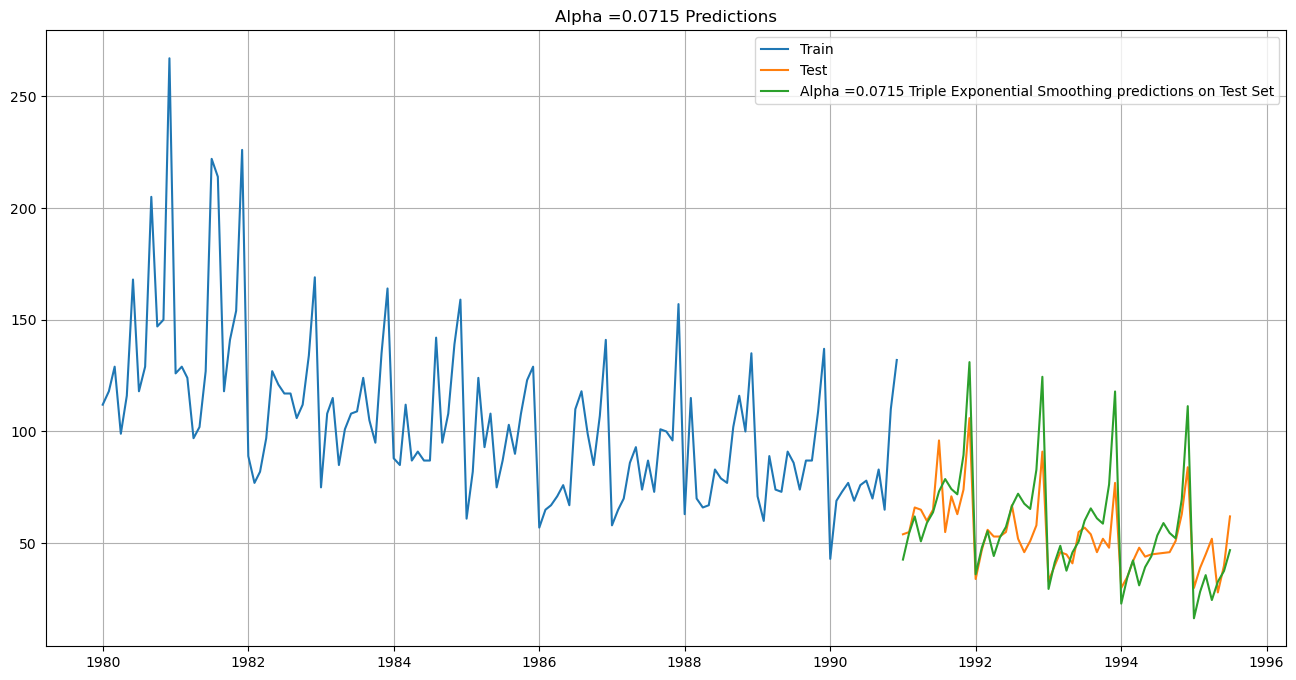

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict'], label='Alpha =0.0715 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0715 Predictions');

##### Model Evaluation

In [73]:
## Test Data

rmse_model4_test_3 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict'],squared=False)
print("For Alpha =0.0715 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_3))

For Alpha =0.0715 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 14.250


In [74]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_3]},index=['Alpha=0.0715,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                           51.433312
SimpleAverage_Forecast                     53.460570
2pointTrailingMovingAverage                11.529278
4pointTrailingMovingAverage                14.451403
6pointTrailingMovingAverage                14.566327
9pointTrailingMovingAverage                14.727630
Alpha=0.1236,SimpleExponentialSmoothing    37.592212
Alpha=1.49e-08,DoubleExponentialSmoothing  15.268944
Alpha=0.0715,TripleExponentialSmoothing    14.249661

### Checking for Stationarity in Time Series Data
Before applying ARIMA and SARIMA modelling we have to check if data is stationary as these models need stationary data for which we will do Dickey Fuller Test for which hypothesis are:
H0: Data is not stationary.
Ha: Data is stationary.

In [75]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=7).mean()  # rolling mean
    rolstd = timeseries.rolling(window=7).std()    # rolling standard deviation

    # Plot rolling statistics
    plt.figure(figsize=(10,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')  # Dropping NaN to avoid errors
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    # Adding Critical values to output
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    # Print the test results
    print(dfoutput)

    # Interpretation based on p-value
    if dfoutput['p-value'] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. The series is stationary.")
    else:
        print("Weak evidence against the null hypothesis, indicating the series is non-stationary.")

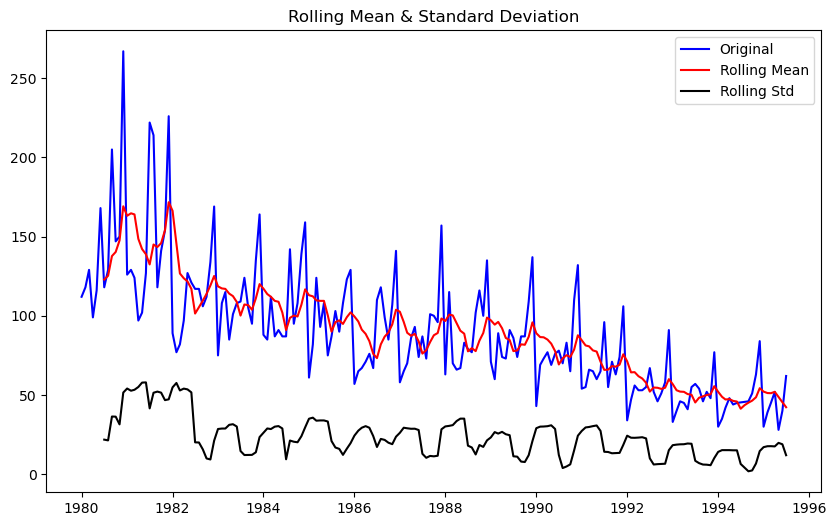

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64
Weak evidence against the null hypothesis, indicating the series is non-stationary.


In [76]:
# applying Dickey Fuller test
test_stationarity(rose['Rose'])

Since, p-value is greater than 0.05 means we cannotreject the null hypothesis that data is not stationary. We will have to make data stationary.

### Making Data Stationary

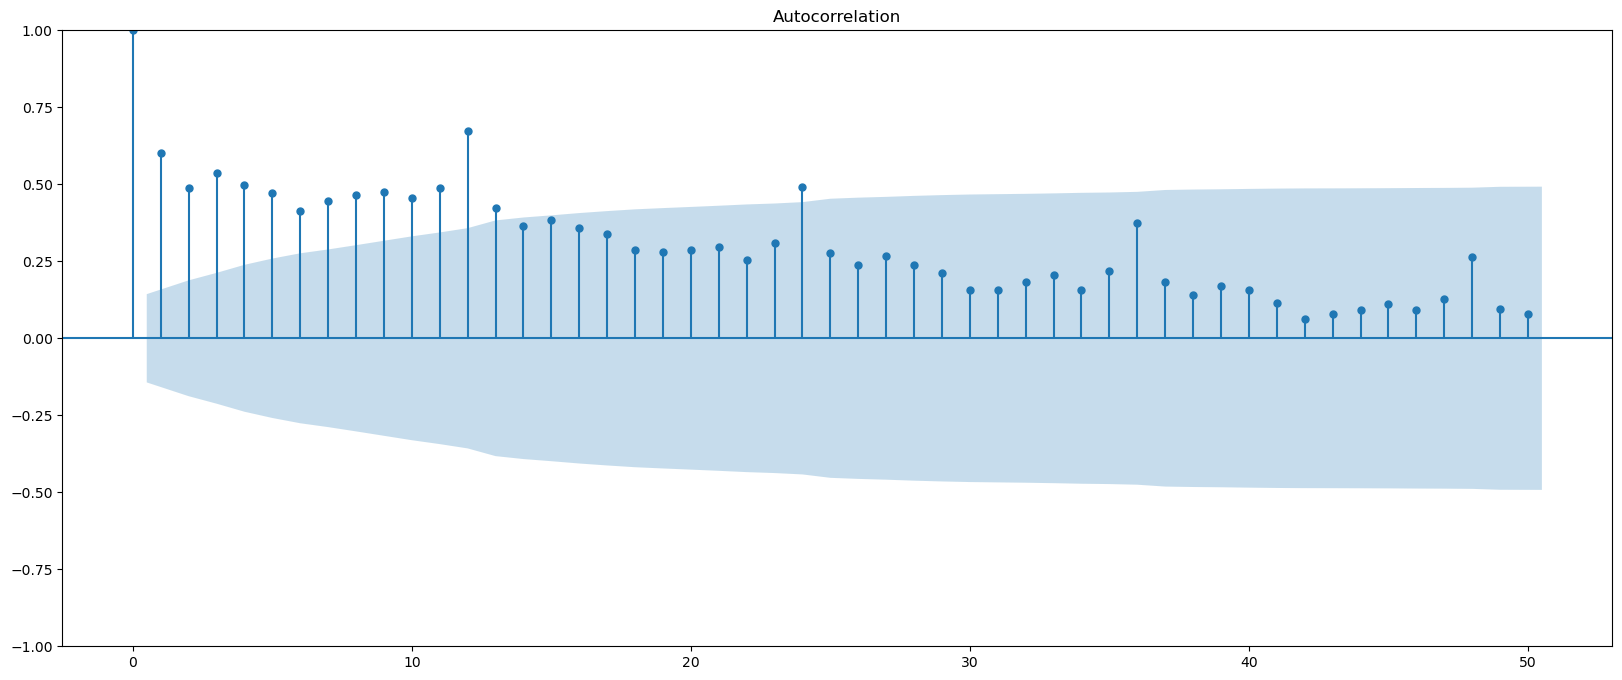

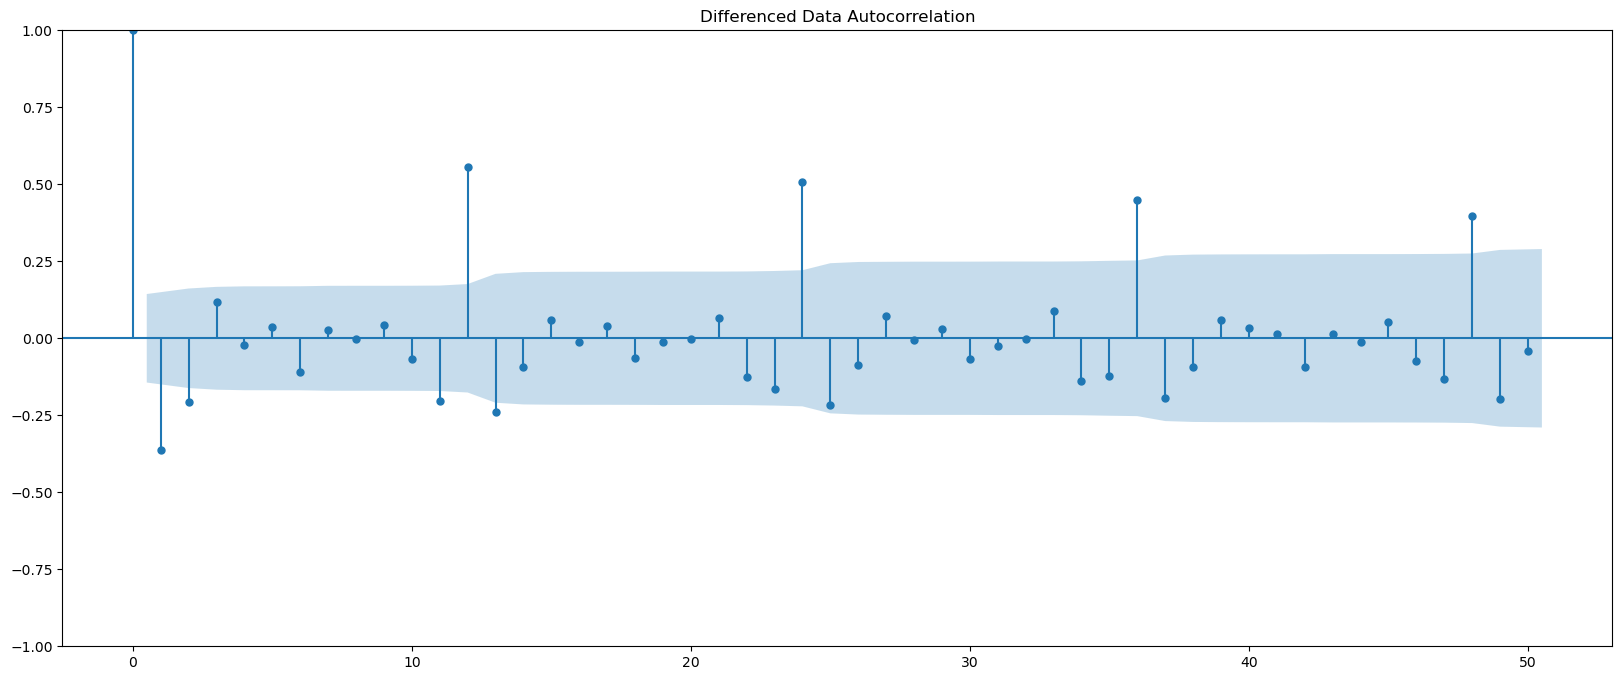

In [77]:
plot_acf(rose['Rose'],lags=50)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [78]:
stationary_df = rose.copy()
stationary_df['Seasonal_First_Difference']=stationary_df['Rose']-stationary_df['Rose'].shift(12)

In [79]:
stationary_df.head(13)

Rose  Seasonal_First_Difference
YearMonth                                   
1980-01-01  112.0                        NaN
1980-02-01  118.0                        NaN
1980-03-01  129.0                        NaN
1980-04-01   99.0                        NaN
1980-05-01  116.0                        NaN
1980-06-01  168.0                        NaN
1980-07-01  118.0                        NaN
1980-08-01  129.0                        NaN
1980-09-01  205.0                        NaN
1980-10-01  147.0                        NaN
1980-11-01  150.0                        NaN
1980-12-01  267.0                        NaN
1981-01-01  126.0                       14.0

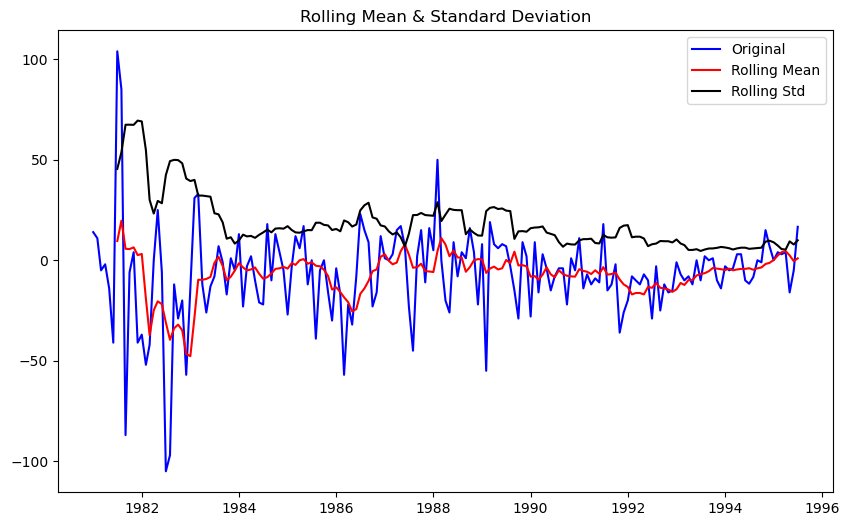

Results of Dickey-Fuller Test:
Test Statistic                  -4.255354
p-value                          0.000530
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64
Strong evidence against the null hypothesis (H0), reject the null hypothesis. The series is stationary.


In [80]:
test_stationarity(stationary_df['Seasonal_First_Difference'].dropna())

### Plot for Autocorrelation and Partial Autocorrelation Function

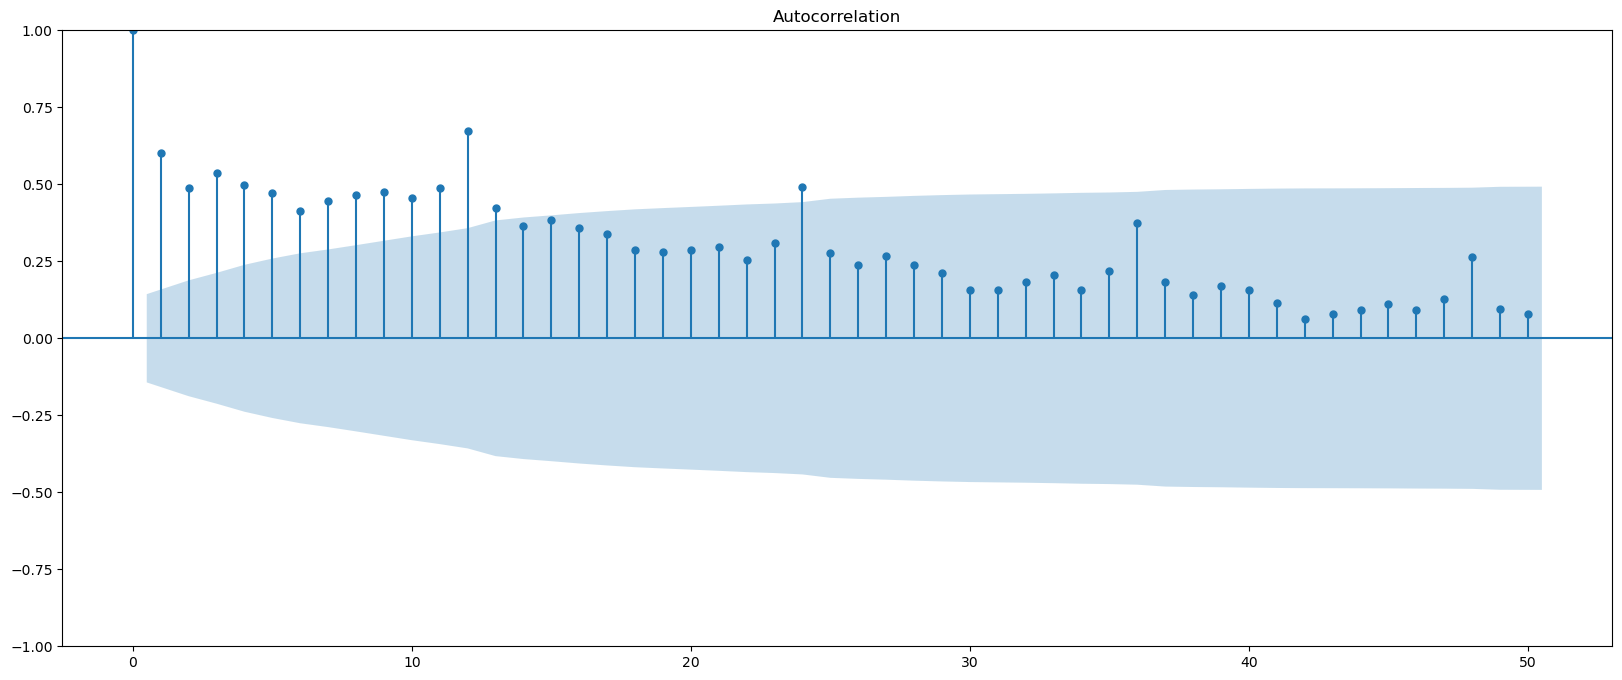

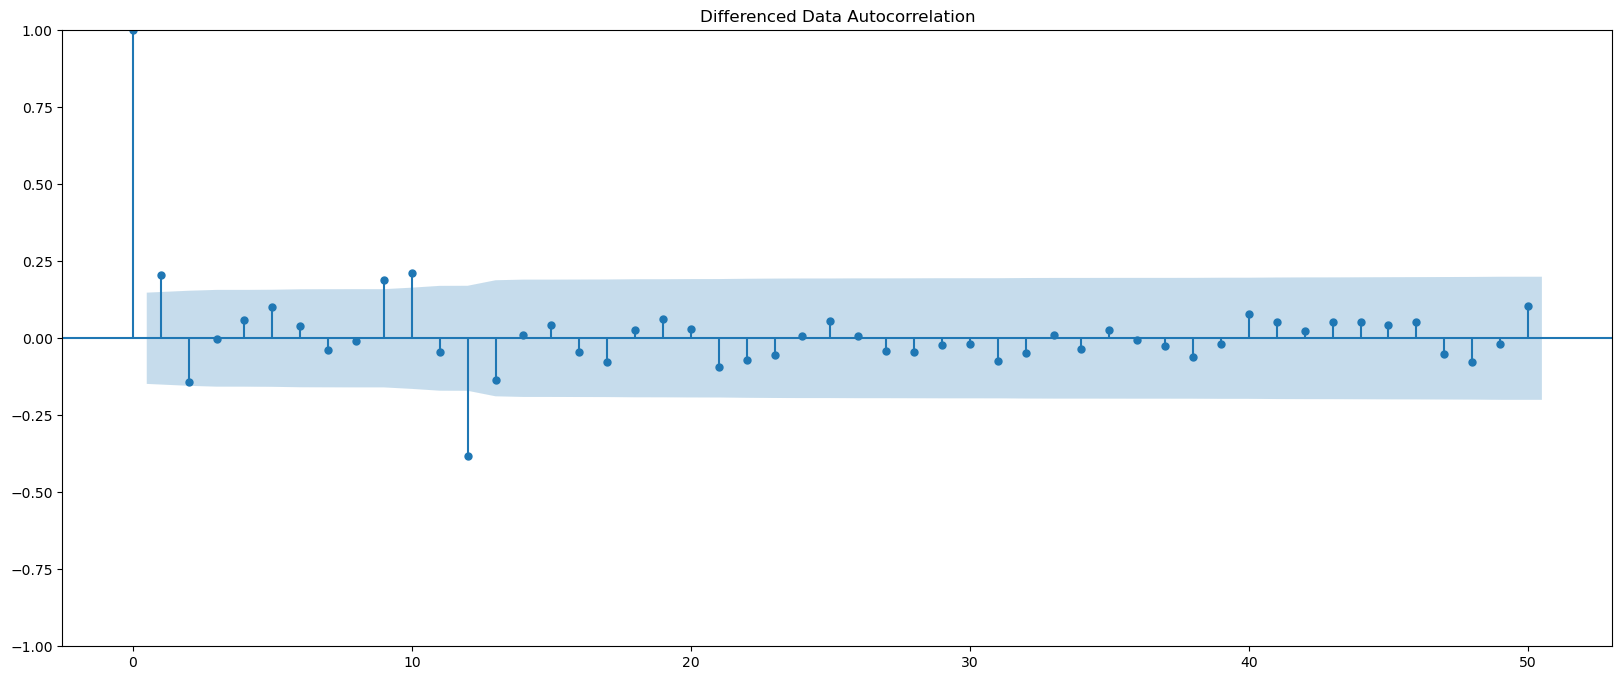

In [81]:
plot_acf(stationary_df['Rose'],lags=50)
plot_acf(stationary_df['Seasonal_First_Difference'].dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

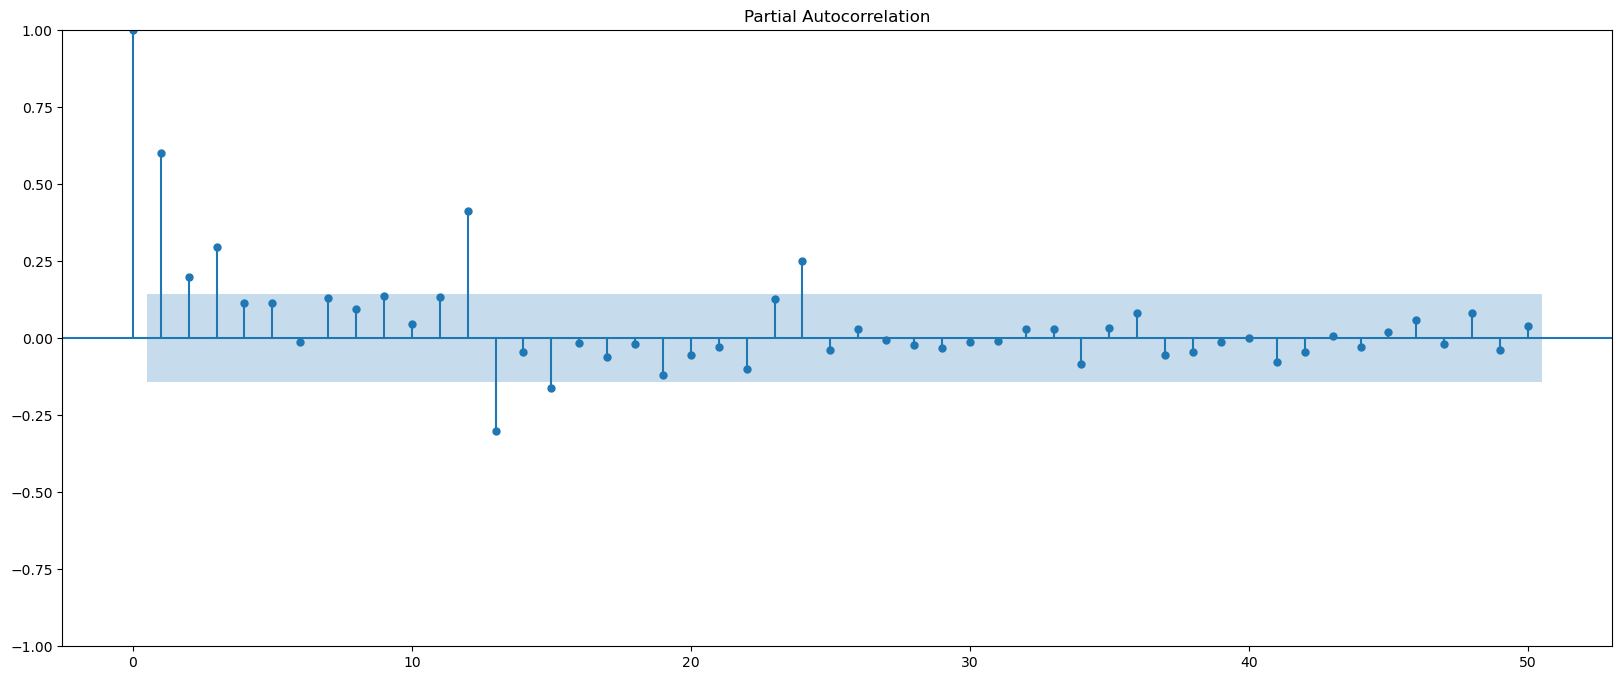

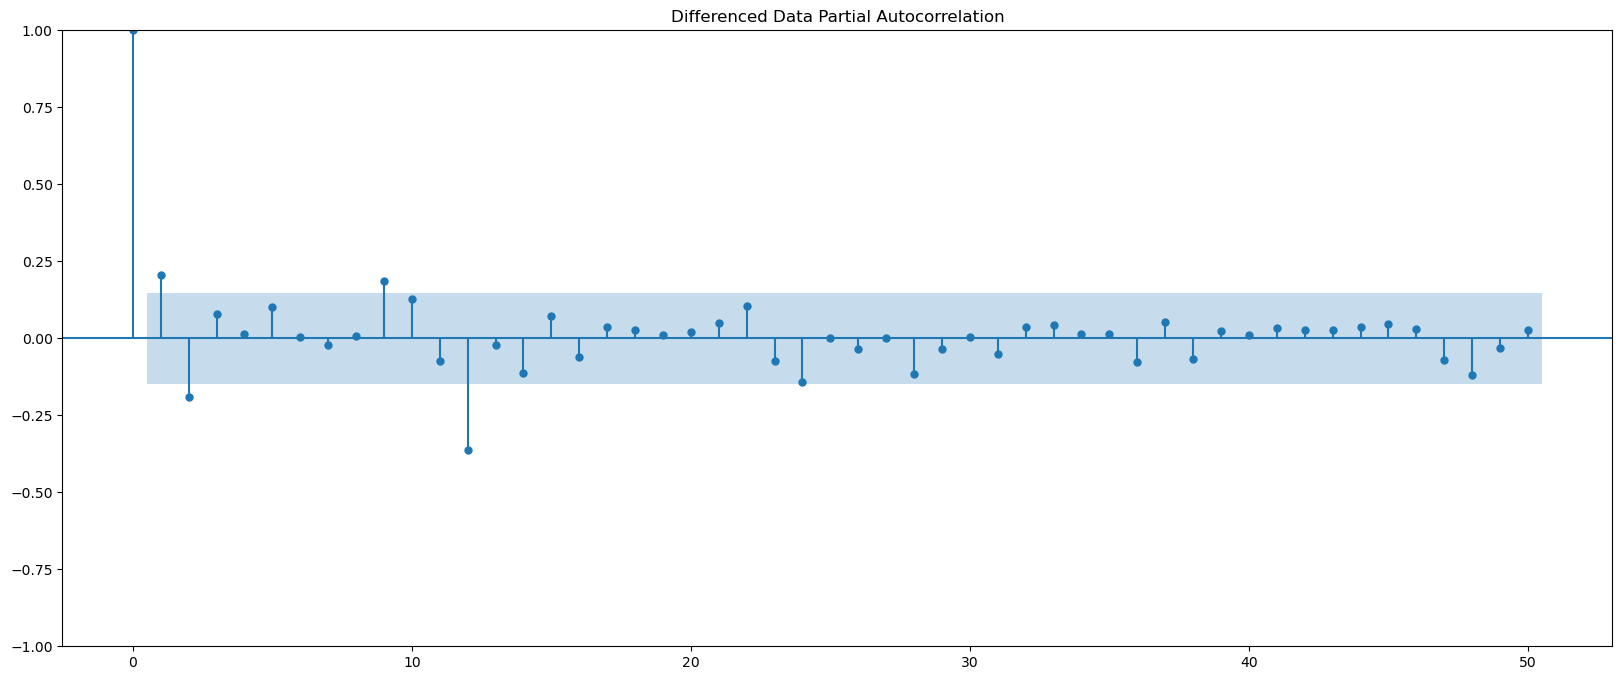

In [82]:
plot_pacf(stationary_df['Rose'],lags=50)
plot_pacf(stationary_df['Seasonal_First_Difference'].dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Autocorrelation and Partial Autocorrelation Function are used to calculate optimum values of auto regression(AR) and moving average(MA) represented by p and q respectively. From the above plot we can conclude that optimum value of p should be 2 and q should be 1.

### Model Building - Stationary Data
#### ARIMA Modelling
Though we have calculated optimum value of p and q using ACF and PACF plot, however, for building model we will be taking a range of p and q and calculate optimum values of p and q using auto ARIMA model.

In [83]:
# getting a combination of different parameters of p and q in the range of 0 and 3 while keeping d constant at 1
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [84]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [85]:
# Loop through the parameter combinations in pdq
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

    # Use pd.concat instead of append
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734648
ARIMA(0, 1, 4) - AIC:1281.6766982143945
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309991


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 4) - AIC:1279.6052639845361
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6951502492393
ARIMA(2, 1, 4) - AIC:1278.7682989803338
ARIMA(3, 1, 0) - AIC:1297.4810917271675
ARIMA(3, 1, 1) - AIC:1282.4192776271939
ARIMA(3, 1, 2) - AIC:1283.720740597716


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:1278.656709446262
ARIMA(3, 1, 4) - AIC:1287.7190768613955
ARIMA(4, 1, 0) - AIC:1296.326656900442
ARIMA(4, 1, 1) - AIC:1283.7931715123077
ARIMA(4, 1, 2) - AIC:1285.7182485629369


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) - AIC:1278.4514003768543
ARIMA(4, 1, 4) - AIC:1282.3706429160204


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head(5)

param          AIC
13  (2, 1, 3)  1274.695150
23  (4, 1, 3)  1278.451400
18  (3, 1, 3)  1278.656709
14  (2, 1, 4)  1278.768299
9   (1, 1, 4)  1279.605264

In time series the best combination of p, d and q is the one with lowest AIC value for which we have sorted the above table in ascending order of AIC value based on which we can conclude that the best set of parameters are p =2, d =1 and q =3. Now we will manually build an ARIMA model using these best best parameters.

In [87]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 22 Sep 2024   AIC                           1274.695
Time:                        21:40:24   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.047      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.708      0.000      -0.893      -0.565
ma.L1          1.0448      0.653      1.601      0.1

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### Predict on the Test Set using this model and evaluate the model

In [88]:
# Make sure the forecast returns a series or array with the correct shape
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [89]:
# Check if the prediction is a one-dimensional array
if isinstance(predicted_auto_ARIMA, tuple):
    predicted_auto_ARIMA = predicted_auto_ARIMA[0]  # Extract forecasted values if it's a tuple

In [90]:
# Now calculate RMSE, ensuring both are array-like
rmse_model5 = metrics.mean_squared_error(test['Rose'], predicted_auto_ARIMA, squared=False)
print('For ARIMA(2,1,3) Model with  forecast on the Test Data, RMSE is %3.3f',rmse_model5)

For ARIMA(2,1,3) Model with  forecast on the Test Data, RMSE is %3.3f 36.81714953212603


In [91]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model5]},index=['ARIMA(2,1,3)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                           51.433312
SimpleAverage_Forecast                     53.460570
2pointTrailingMovingAverage                11.529278
4pointTrailingMovingAverage                14.451403
6pointTrailingMovingAverage                14.566327
9pointTrailingMovingAverage                14.727630
Alpha=0.1236,SimpleExponentialSmoothing    37.592212
Alpha=1.49e-08,DoubleExponentialSmoothing  15.268944
Alpha=0.0715,TripleExponentialSmoothing    14.249661
ARIMA(2,1,3)                               36.817150

#### SARIMA Modelling
In SARIMA models in addition to trend we also account for seasonality and to understand the seasonal parameter we have to use ACF plot.

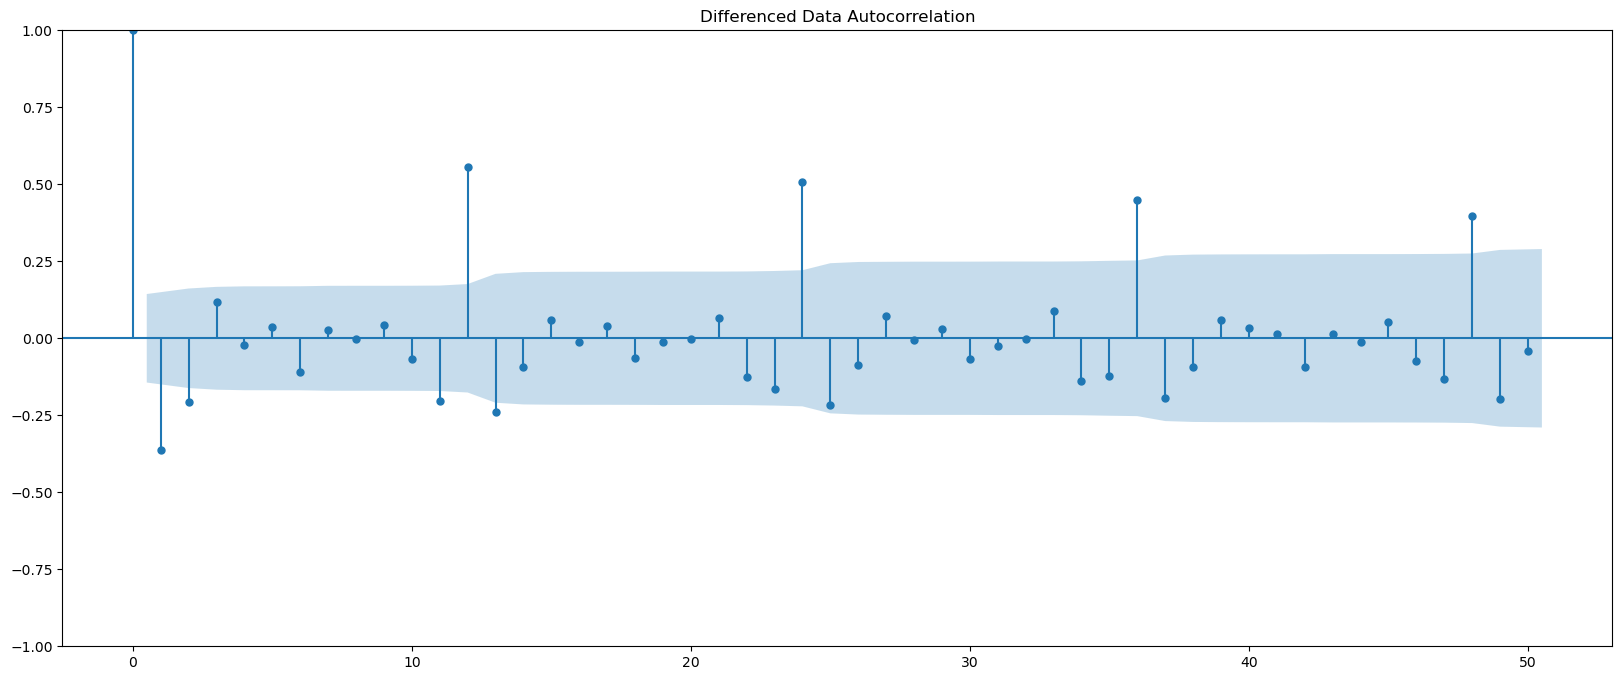

In [92]:
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting as 12.

In [93]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [94]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [95]:
# Loop through the parameter combinations
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Fit the SARIMA model using scaled data
            SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
            # Fit the model with more iterations and an alternative optimization method
            results_SARIMA = SARIMA_model.fit(maxiter=2000, disp=False)

            # Print the AIC for the parameter combination
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

            # Create a new row for AIC values
            new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})

            # Ensure the new row has no NA values
            if not new_row.isnull().values.any():
                SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)

        except Exception as e:
            print(f"Error fitting SARIMA{param}x{param_seasonal}: {e}")

# Display the DataFrame with the SARIMA model results
print(SARIMA_AIC)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753413
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697569


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894564
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383772
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302171


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536139


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461669


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260668608
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054105


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264854


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341405


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933578762


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913619614


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257945


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545040583


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.937508567823
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585698


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257694
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055023908


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948405
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661061


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.297310307114
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255507


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063872
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.718054713796


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428508665


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060842194


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470802


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936964
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.949504070622


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101095


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402519913


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760926731326


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.618320901308


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318504475454


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.169019682763


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597830728156


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.8717668983784
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.508602157591


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.198816555963
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645451


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801383773


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280814
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231799669


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.209349194947


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472069678
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.424960110142


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471203442


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822671


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608003604


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369787


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866292184
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146723


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598186


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.32583111036


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713674077


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.190935490377


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488805264


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348879


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888639412


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980810101
        param       seasonal          AIC
0   (0, 1, 0)  (0, 0, 0, 12)  1323.965788
1   (0, 1, 0)  (0, 0, 1, 12)  1145.423083
2   (0, 1, 0)  (0, 0, 2, 12)   976.437530
3   (0, 1, 0)  (1, 0, 0, 12)  1139.921739
4   (0, 1, 0)  (1, 0, 1, 12)  1116.020787
..        ...            ...          ...
76  (2, 1, 2)  (1, 0, 1, 12)  1044.190935
77  (2, 1, 2)  (1, 0, 2, 12)   907.666149
78  (2, 1, 2)  (2, 0, 0, 12)   897.346444
79  (2, 1, 2)  (2, 0, 1, 12)   898.378189
80  (2, 1, 2)  (2, 0, 2, 12)   890.668798

[81 rows x 3 columns]


In [96]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.871767
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

From the above table which is sorted in ascending order of AIC score we can take the best values of parameters at (0, 1, 2)	(2, 0, 2, 12). We will build the final SARIMA model using these parameters.

In [97]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train,
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=2000, disp=False)
print(results_auto_SARIMA.summary())

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 22 Sep 2024   AIC                            887.938
Time:                                    21:40:54   BIC                            906.448
Sample:                                01-01-1980   HQIC                           895.437
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.426     -0.004      0.996    -372.110     370.425
ma.L2         -0.1573     29.760   

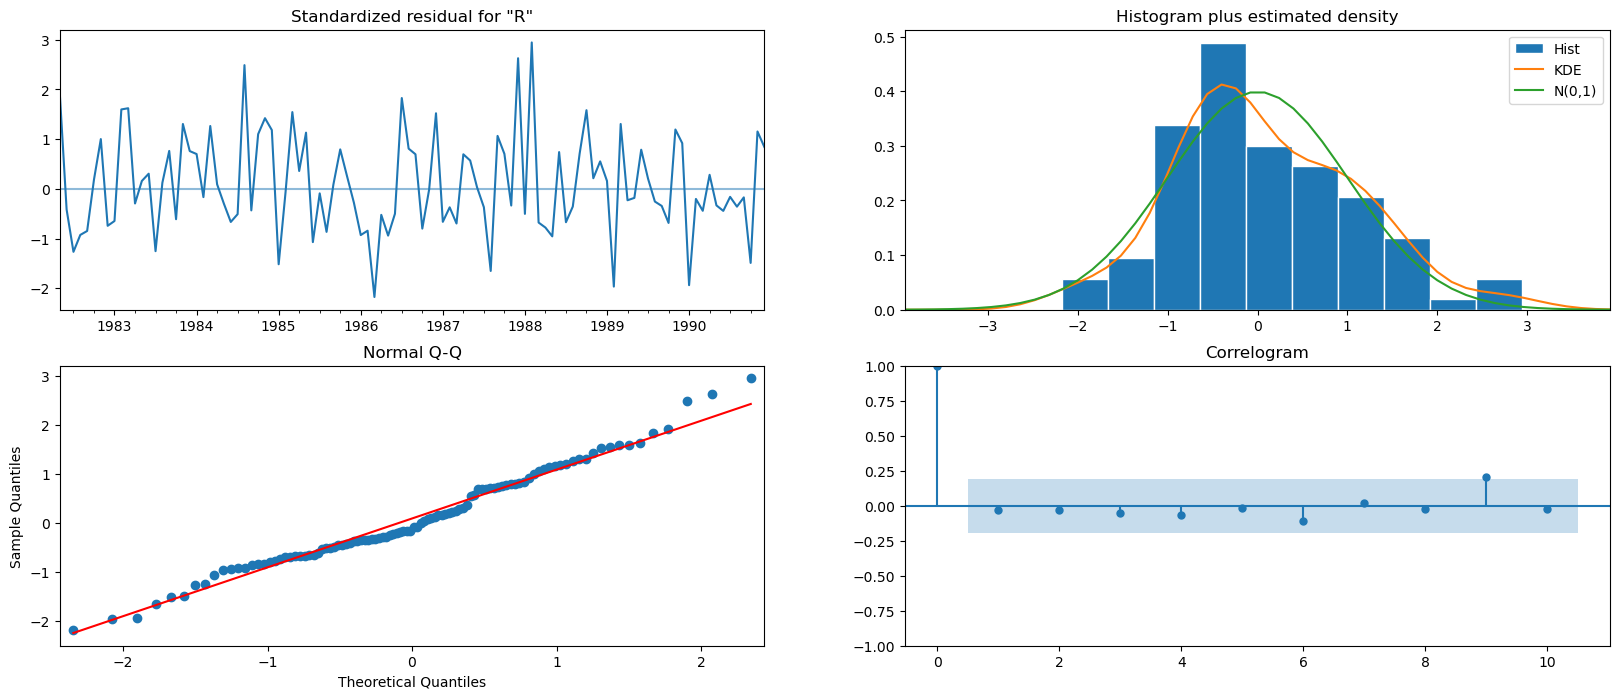

In [98]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In the above diagnostic plot residuals are randomly scattered meaning we have optimized the model. 

##### Predict on the Test Set using this model and evaluate the model

In [99]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [100]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  62.867261  15.928500      31.647975      94.086547
1991-02-01  70.541189  16.147658      38.892362     102.190017
1991-03-01  77.356410  16.147655      45.707587     109.005233
1991-04-01  76.208813  16.147655      44.559991     107.857636
1991-05-01  72.747397  16.147655      41.098574     104.396220

In [101]:
rmse_model6 = metrics.mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('For SARIMA(0, 1, 2) (2, 0, 2, 12) Model with  forecast on the Test Data, RMSE is %3.3f',rmse_model6)

For SARIMA(0, 1, 2) (2, 0, 2, 12) Model with  forecast on the Test Data, RMSE is %3.3f 26.928360855038665


In [102]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model6]},index=['SARIMA(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
RegressionOnTime                           51.433312
SimpleAverage_Forecast                     53.460570
2pointTrailingMovingAverage                11.529278
4pointTrailingMovingAverage                14.451403
6pointTrailingMovingAverage                14.566327
9pointTrailingMovingAverage                14.727630
Alpha=0.1236,SimpleExponentialSmoothing    37.592212
Alpha=1.49e-08,DoubleExponentialSmoothing  15.268944
Alpha=0.0715,TripleExponentialSmoothing    14.249661
ARIMA(2,1,3)                               36.817150
SARIMA(0,1,2)(2,0,2,12)                    26.928361

In [103]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
2pointTrailingMovingAverage                11.529278
Alpha=0.0715,TripleExponentialSmoothing    14.249661
4pointTrailingMovingAverage                14.451403
6pointTrailingMovingAverage                14.566327
9pointTrailingMovingAverage                14.727630
Alpha=1.49e-08,DoubleExponentialSmoothing  15.268944
SARIMA(0,1,2)(2,0,2,12)                    26.928361
ARIMA(2,1,3)                               36.817150
Alpha=0.1236,SimpleExponentialSmoothing    37.592212
RegressionOnTime                           51.433312
SimpleAverage_Forecast                     53.460570

From the above table we can conclude that 2pointTrailingMovingAverage model is the best performing model as it has the lowest RMSE score. For forecasting we will use this model.

### Building the most optimum model on the Full Data

In [104]:
rose_moving_average = rose.copy()
rose_moving_average['Trailing_2'] = rose_moving_average['Rose'].rolling(2).mean()
rose_moving_average.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

#### Evaluate the model on the whole and predict 12 months into the future

In [105]:
rose_moving_average = rose_moving_average.dropna()

In [106]:
rmse_final_model = metrics.mean_squared_error(rose_moving_average['Rose'],rose_moving_average['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the full Data,  RMSE is %3.3f" %(rmse_final_model))

For 2 point Moving Average Model forecast on the full Data,  RMSE is 17.498


In [107]:
# Get the last two actual data points
last_two_values = rose_moving_average['Rose'].iloc[-2:].values  # This will be a NumPy array

# Forecast the next 12 months
forecasted_values = []

# Forecast each month iteratively
for i in range(12):
    # Forecast the next value as the average of the last two values
    next_value = np.mean(last_two_values)  # Use np.mean to calculate the average
    
    # Append the forecast to the list
    forecasted_values.append(next_value)
    
    # Update last_two_values to include the new forecast
    last_two_values = np.array([last_two_values[-1], next_value])  # Convert to NumPy array

# Create a date range for the next 12 months
last_date = rose_moving_average.index[-1]
forecast_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Rose': forecasted_values}, index=forecast_dates)

# Calculate residuals (difference between actual values and moving average)
residuals = rose_moving_average['Rose'] - rose_moving_average['Trailing_2']

# Calculate the standard deviation of residuals
residual_std = np.std(residuals)

# Calculate the confidence intervals (95% confidence level)
z_score = 1.96  # For a 95% confidence interval
forecast_df['lower_CI'] = forecast_df['Rose'] - z_score * residual_std
forecast_df['upper_CI'] = forecast_df['Rose'] + z_score * residual_std

# Display the forecast table with confidence intervals
display(forecast_df)



Rose   lower_CI   upper_CI
1995-08-01  51.000000  16.705127  85.294873
1995-09-01  56.500000  22.205127  90.794873
1995-10-01  53.750000  19.455127  88.044873
1995-11-01  55.125000  20.830127  89.419873
1995-12-01  54.437500  20.142627  88.732373
1996-01-01  54.781250  20.486377  89.076123
1996-02-01  54.609375  20.314502  88.904248
1996-03-01  54.695312  20.400439  88.990186
1996-04-01  54.652344  20.357471  88.947217
1996-05-01  54.673828  20.378955  88.968701
1996-06-01  54.663086  20.368213  88.957959
1996-07-01  54.668457  20.373584  88.963330

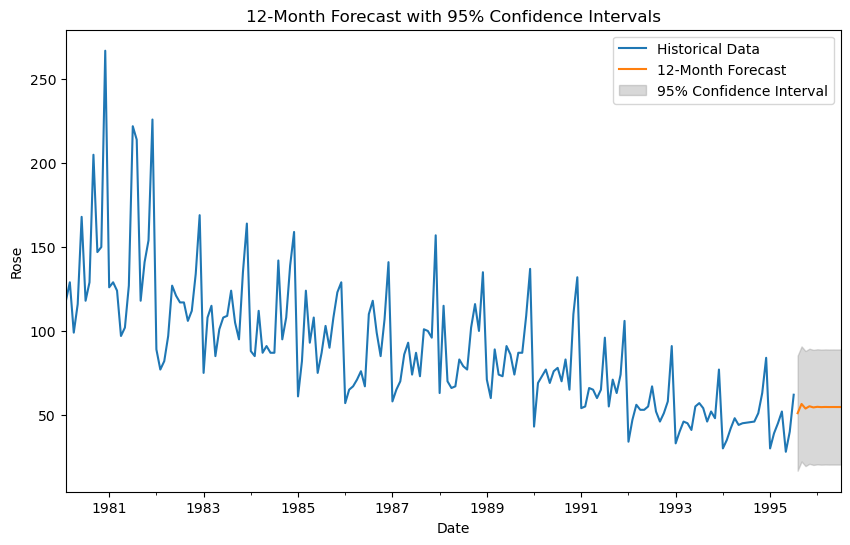

In [108]:
plt.figure(figsize=(10, 6))

# Plot the historical data
rose_moving_average['Rose'].plot(label='Historical Data')

# Plot the forecasted values
forecast_df['Rose'].plot(label='12-Month Forecast')

# Plot the confidence intervals
plt.fill_between(forecast_df.index, forecast_df['lower_CI'], forecast_df['upper_CI'], 
                 color='gray', alpha=0.3, label='95% Confidence Interval')

# Add labels and legend
plt.title('12-Month Forecast with 95% Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Rose')
plt.legend()
plt.show()


The plot above illustrates the forecasted sales, represented by the orange line, for the next 12 months. The shaded region around it indicates the range within which sales are expected to fall with 95% confidence.

## Analyzing Sparkling wine data
### Uploading Data

In [109]:
sparkling = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/TSF/Sparkling.csv')

### Data Overview
#### Glimpse of Data

In [110]:
sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

#### Shape of Dataset

In [111]:
print("shape of the dataset")
print("----------------------------------------------------------------------------")
display(sparkling.shape)

shape of the dataset
----------------------------------------------------------------------------


(187, 2)

#### Information of Features

In [112]:
print("information of features")
print("----------------------------------------------------------------------------")
sparkling.info()

information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


#### Statistical Summary

In [113]:
print("statistical summary")
print("----------------------------------------------------------------------------")
sparkling.describe().T

statistical summary
----------------------------------------------------------------------------


count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

#### Checking for Missing Values

In [114]:
print('Number of rows with missing values:') 
print("----------------------------------------------------------------------------")
sparkling.isnull().sum()

Number of rows with missing values:
----------------------------------------------------------------------------


YearMonth    0
Sparkling    0
dtype: int64

#### Checking for duplicates

In [115]:
print("checking for duplicates")
print("----------------------------------------------------------------------------")
print(f"number of dupliacte rows: {sparkling.duplicated().sum()}")

checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 0


##### Key Observations
1. Dataset has 2 rows and 187 observations in which YearMonth column should be of datetime dataype but is of object type. We will convert this feature to datetime and transform the data to a time series data.
2. There are no missing values in the dataset.
### Converting Data to Timeseries 

In [116]:
sparkling['YearMonth'] = pd.to_datetime(sparkling['YearMonth'], format= '%Y-%m')
sparkling.set_index('YearMonth', inplace= True)
sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [117]:
sparkling.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

### Exploratory Data Analysis(EDA)
#### Plotting Data

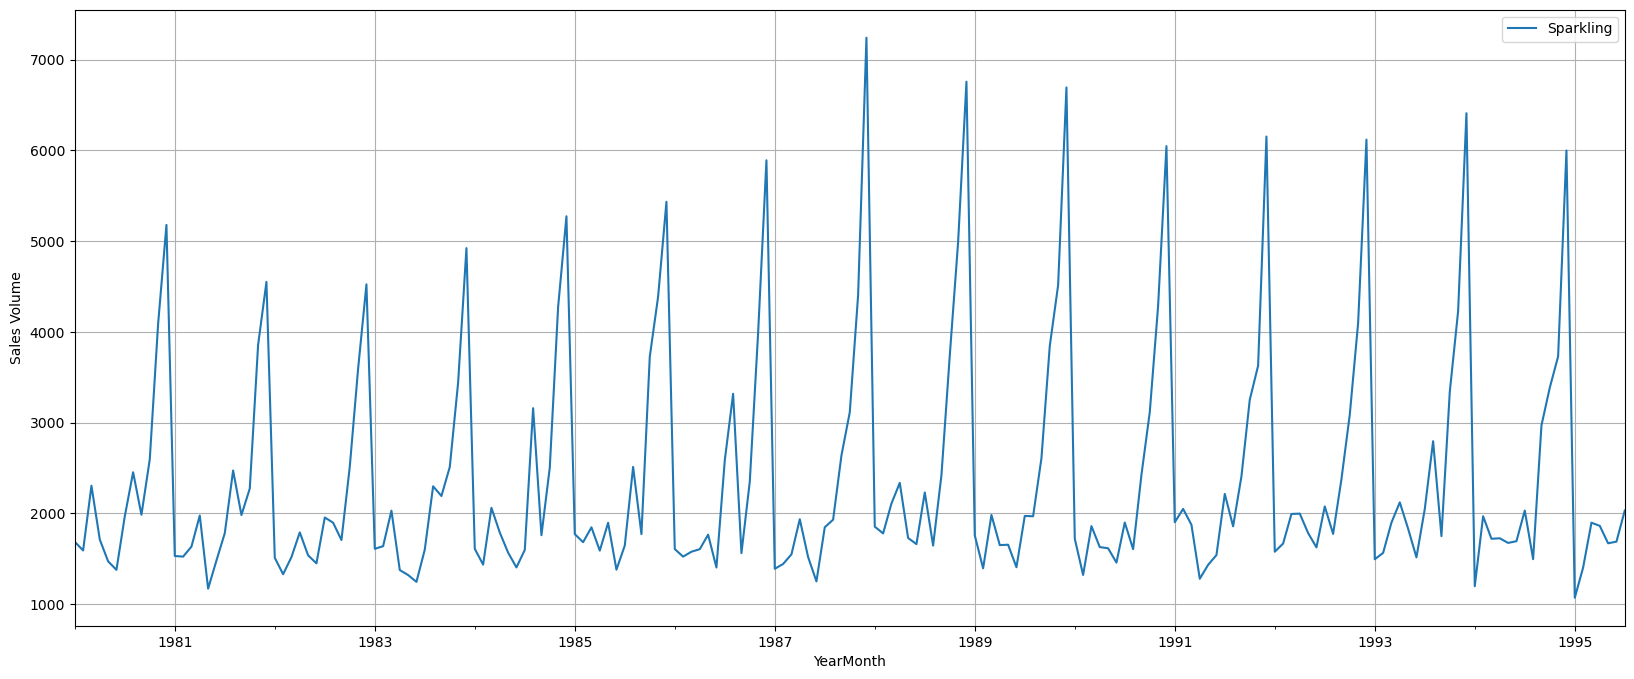

In [118]:
sparkling.plot()
plt.ylabel('Sales Volume')
plt.grid()

#### Boxplot by Year

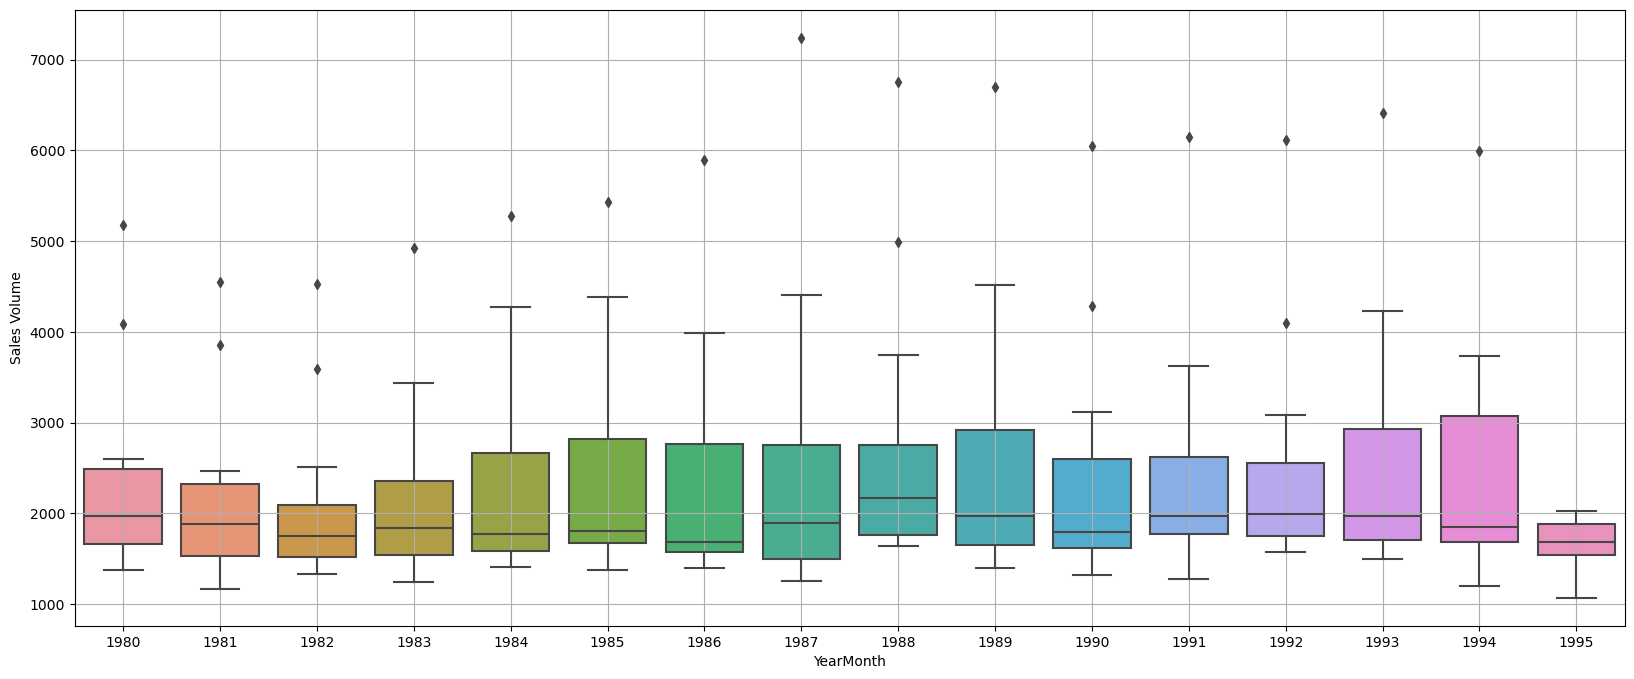

In [119]:
sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling'])
plt.ylabel('Sales Volume')
plt.grid();

#### Boxplot by Month

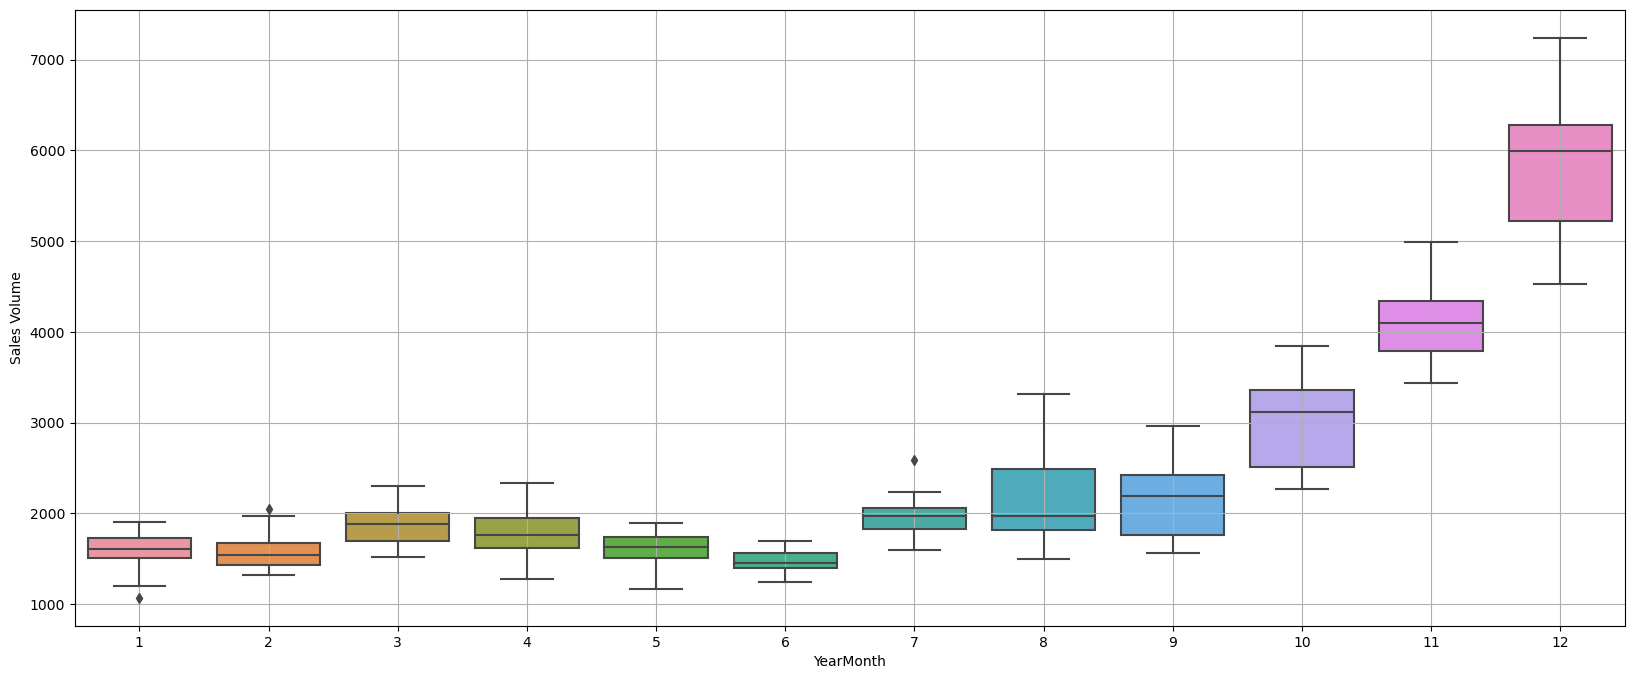

In [120]:
sns.boxplot(x = sparkling.index.month,y = sparkling['Sparkling'])
plt.ylabel('Sales Volume')
plt.grid();

#### Time Series Monthplot

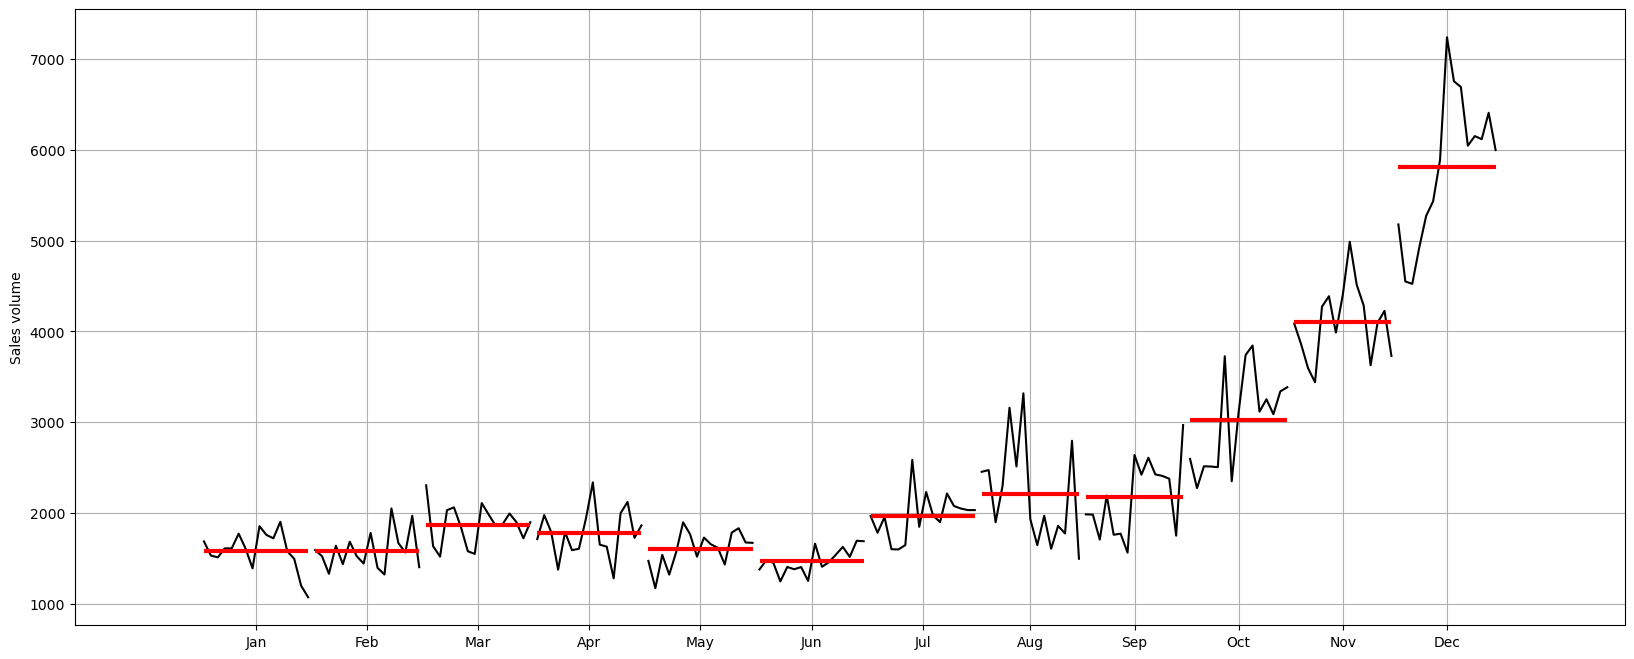

In [121]:
# time series monthplot to understand the spread of Sales across different years
month_plot(sparkling['Sparkling'],ylabel='Sales volume')
plt.grid();

#### Monthly Sales Across Years

In [122]:
# Pivot table across month and year
monthly_table_across_years = pd.pivot_table(sparkling, values = 'Sparkling', 
                                            columns = sparkling.index.month, index = sparkling.index.year)
monthly_table_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

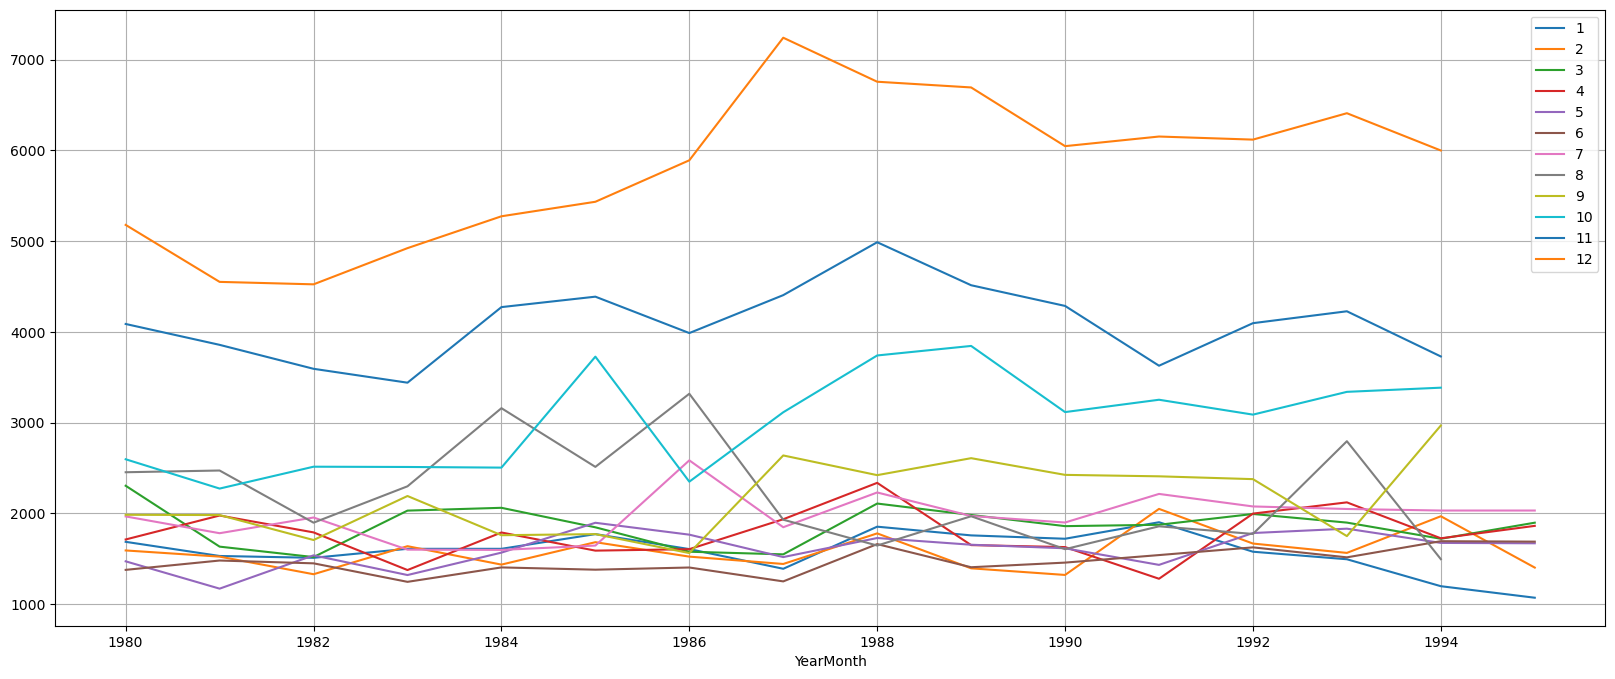

In [123]:
# Plot the table
monthly_table_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Yearly Sales Across Months

In [124]:
# Pivot table across year and month
yearly_table_across_months = pd.pivot_table(sparkling, values = 'Sparkling', 
                                            columns = sparkling.index.year, index = sparkling.index.month)
yearly_table_across_months

YearMonth    1980    1981    1982    1983    1984    1985    1986    1987  \
YearMonth                                                                   
1          1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
2          1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
3          2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
4          1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
5          1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
6          1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
7          1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
8          2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
9          1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
10         2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
11         4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
12         5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

YearMonth    1988    1989    1990    1991    1992    1993    1994    1995  
YearMonth                                                                  
1          1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2          1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3          2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4          2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5          1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6          1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7          2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8          1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9          2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10         3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11         4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12         6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

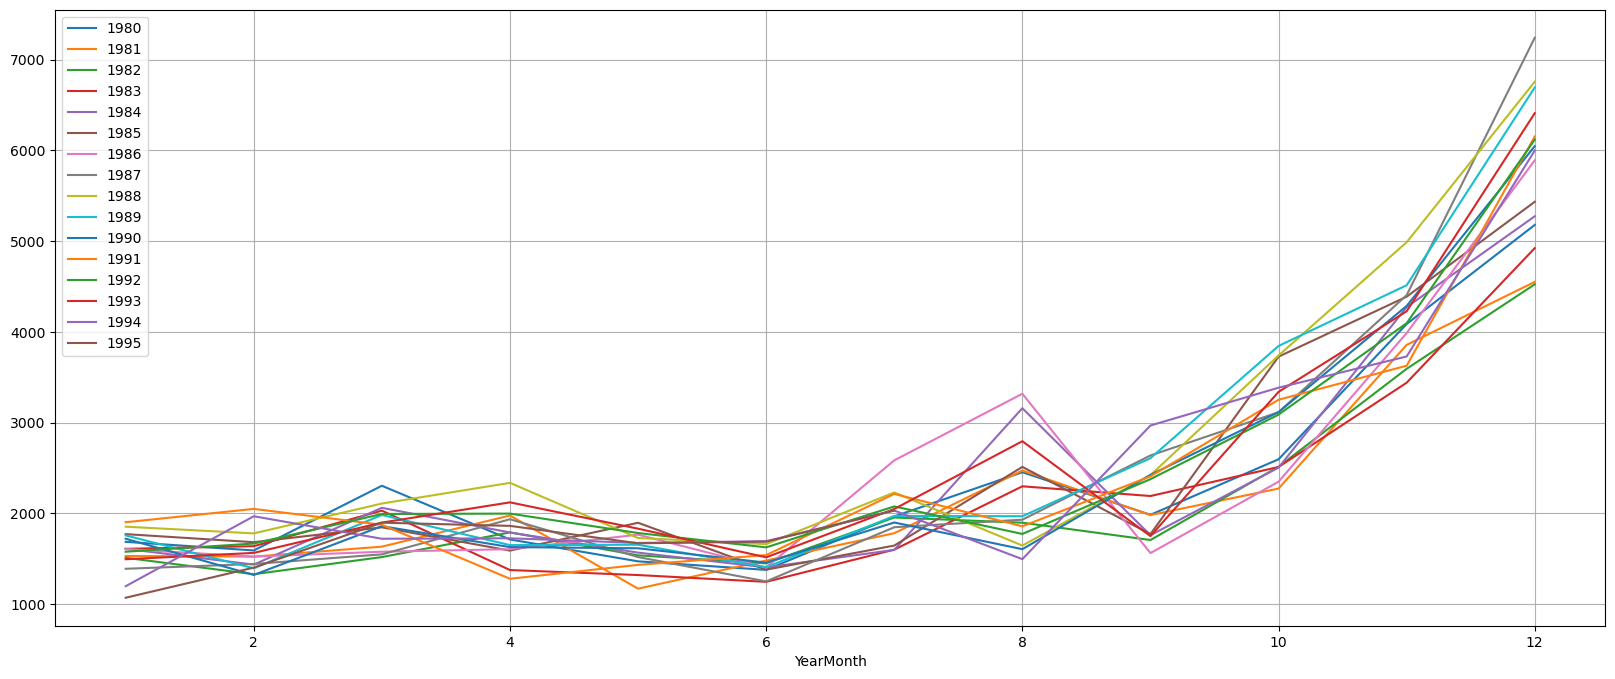

In [125]:
# Plot the table
yearly_table_across_months.plot()
plt.grid()
plt.legend(loc='best');

#### Emperical Cumulative Sales Distribution

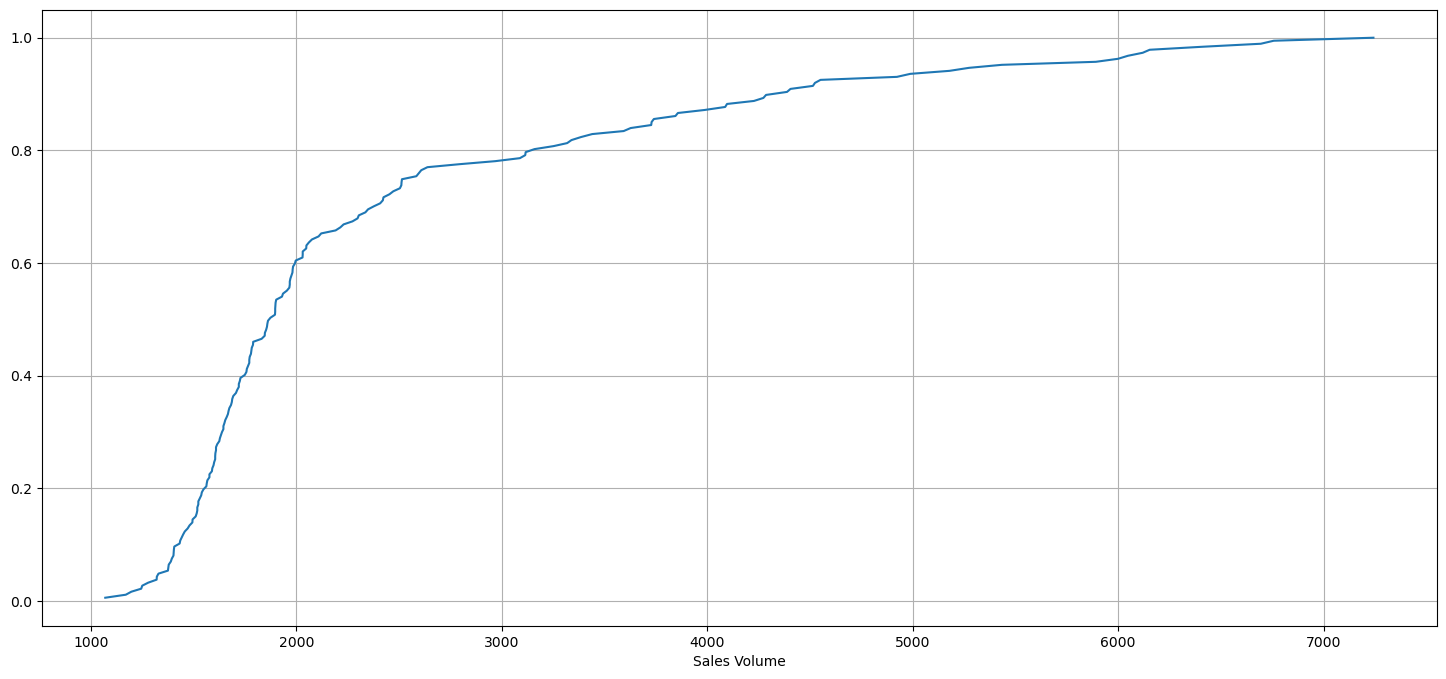

In [126]:
plt.figure(figsize = (18, 8))
cdf = ECDF(sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales Volume');

#### Average Sales Volume per month and the month on month percentage change of Sales Volume.

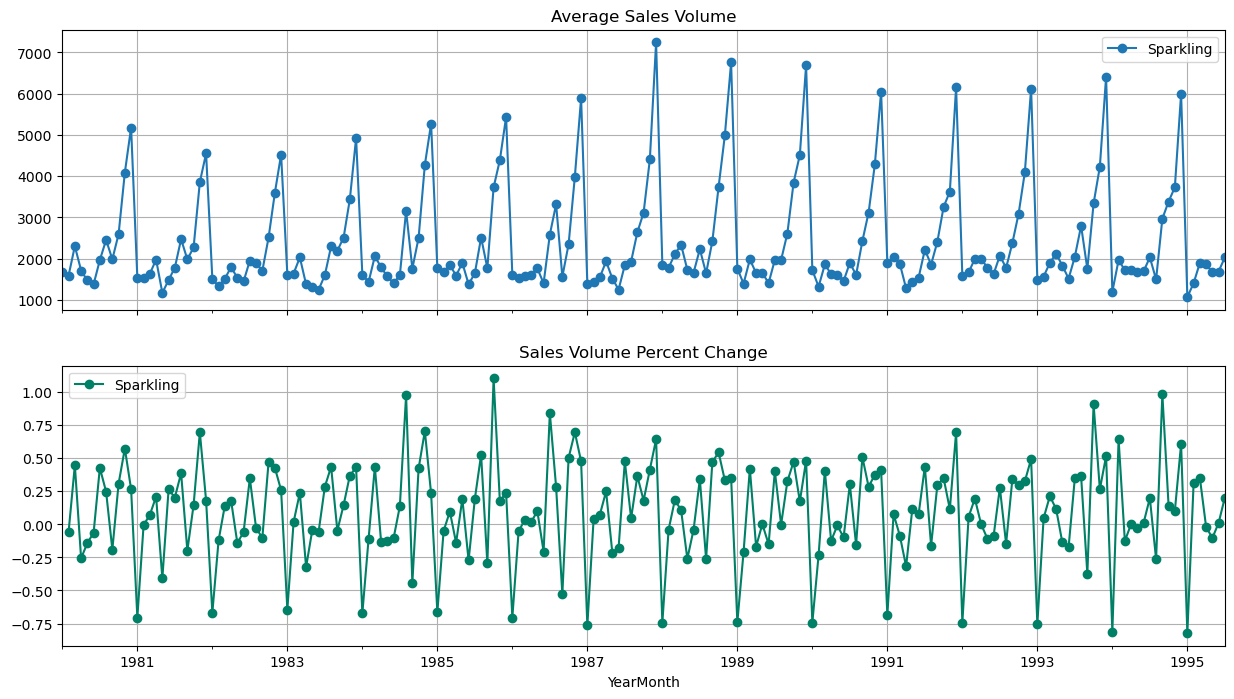

In [127]:
# group by date and get average Sales Volume, and precent change
average    = sparkling.groupby(sparkling.index)["Sparkling"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales volume over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales Volume",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales volume over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Volume Percent Change",grid=True)

##### Key Observations
1. Data is showing only seasonality as in year on year terms the sales tends to remain within a range and though there are some fluctuations these changes are not consistent, we will attribute these changes as error. In monthly terms though there is a set pattern being observed.
2. Seasonally, the highest sales occur in December, while the lowest are observed in January. Sales typically show a steady increase from January through November, followed by a significant jump in December.

### Data Decomposition

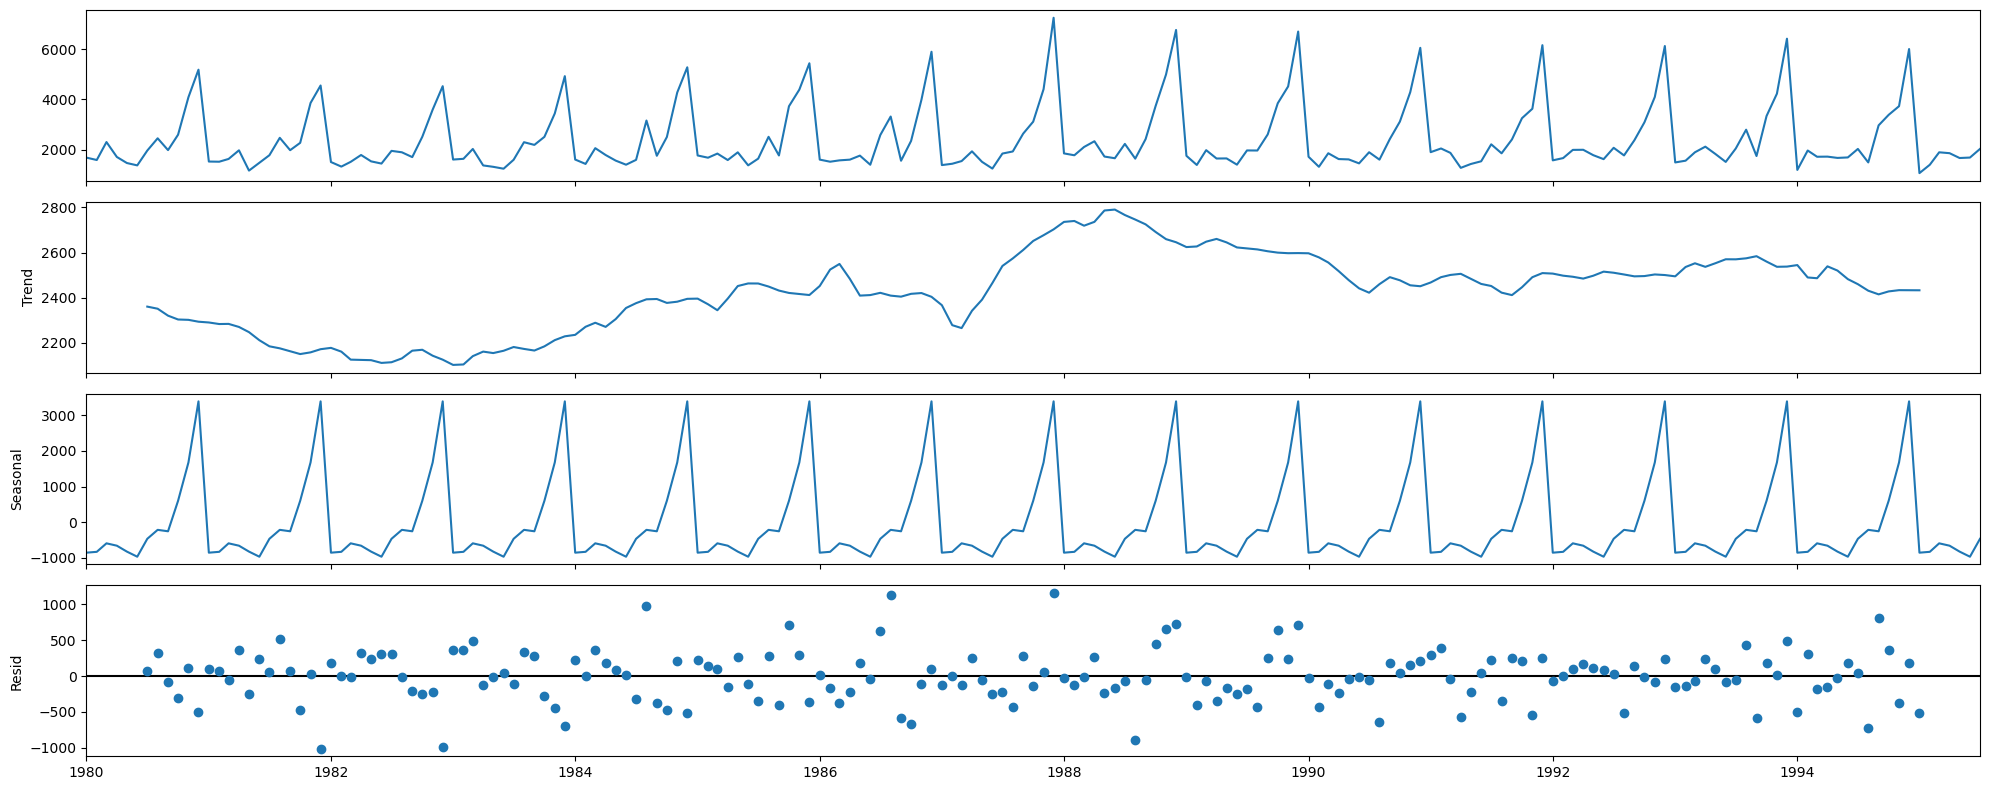

In [128]:
decomposition = seasonal_decompose(sparkling, model= 'additive')
decomposition.plot();

the above plot reitrates what we had observed during the EDA that there is no set standard pattern in trend meaning there is no trend in the data but there is clear seasonality in the data.

In [129]:
# extracting trend, seasonality and residuals separately from data
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


### Splitting Data

In [130]:
train= sparkling[sparkling.index.year < 1991]
test= sparkling[sparkling.index.year >= 1991]

In [131]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

### Model Building - Original Data
#### Linear Regression Model

In [132]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [133]:
train_time = [i+1 for i in range(len(LinearRegression_train))]
test_time = [i+43 for i in range(len(LinearRegression_test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [134]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



In [135]:
lr = LinearRegression()

In [136]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

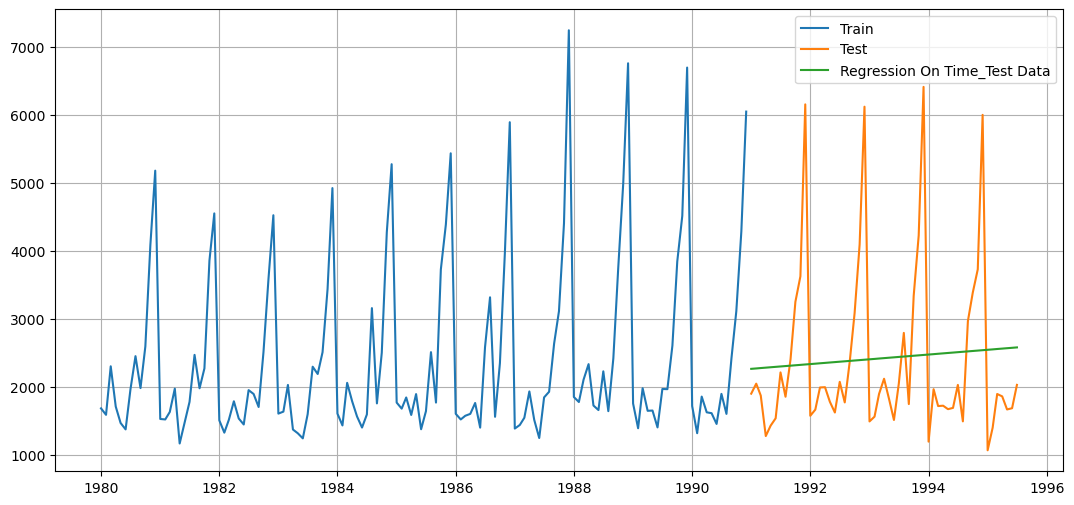

In [137]:
test_predictions_model1    = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

##### Model Evaluation

In [138]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.87


In [139]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

#### Simple Average Model

In [140]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [141]:
SimpleAverage_test = test.copy()
SimpleAverage_test.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

In [142]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

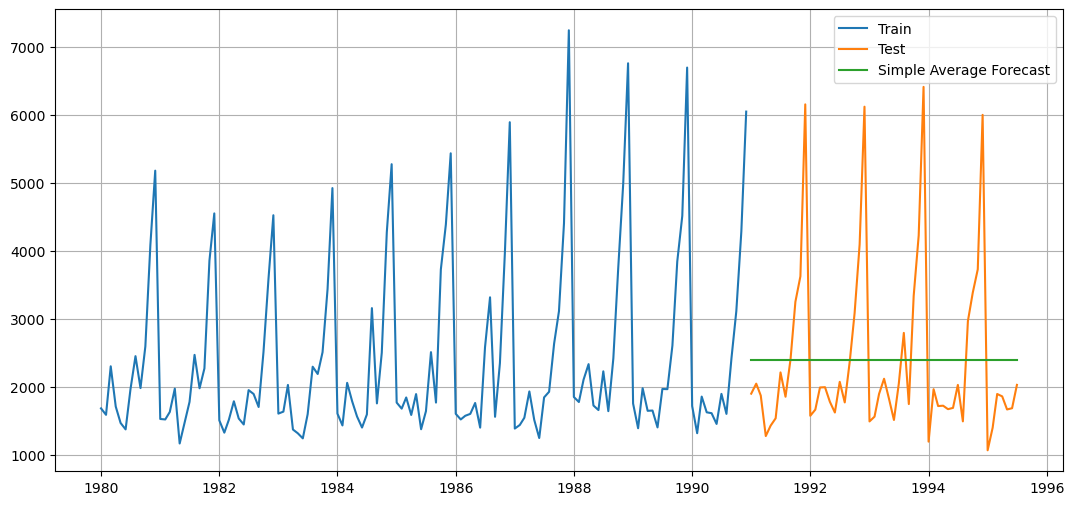

In [143]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.grid();

##### Model Evaluation

In [144]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For SimpleAverage forecast on the Test Data,  RMSE is %3.2f" %(rmse_model2_test))

For SimpleAverage forecast on the Test Data,  RMSE is 1275.08


In [145]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['SimpleAverage_Forecast'])
tempDf

Test RMSE
SimpleAverage_Forecast  1275.081804

In [146]:
resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime        1275.867052
SimpleAverage_Forecast  1275.081804

##### Moving Average Model

In [147]:
MovingAverage =sparkling.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [148]:
# trailing moving average
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

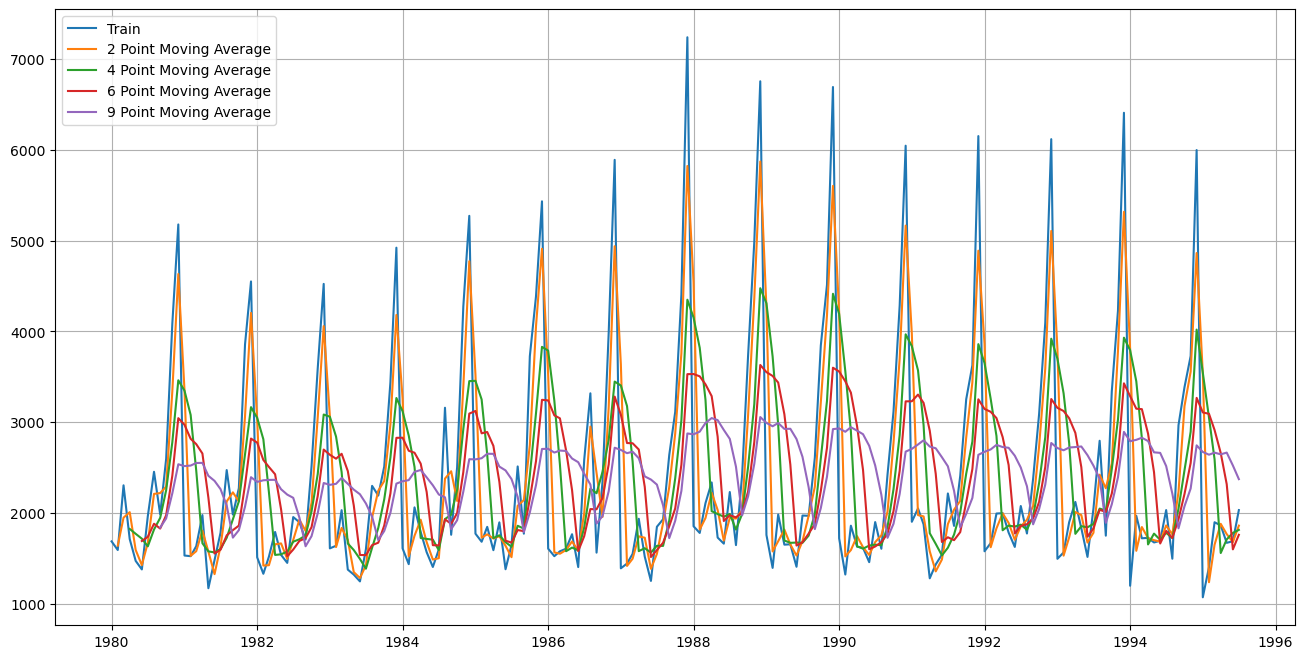

In [149]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [150]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

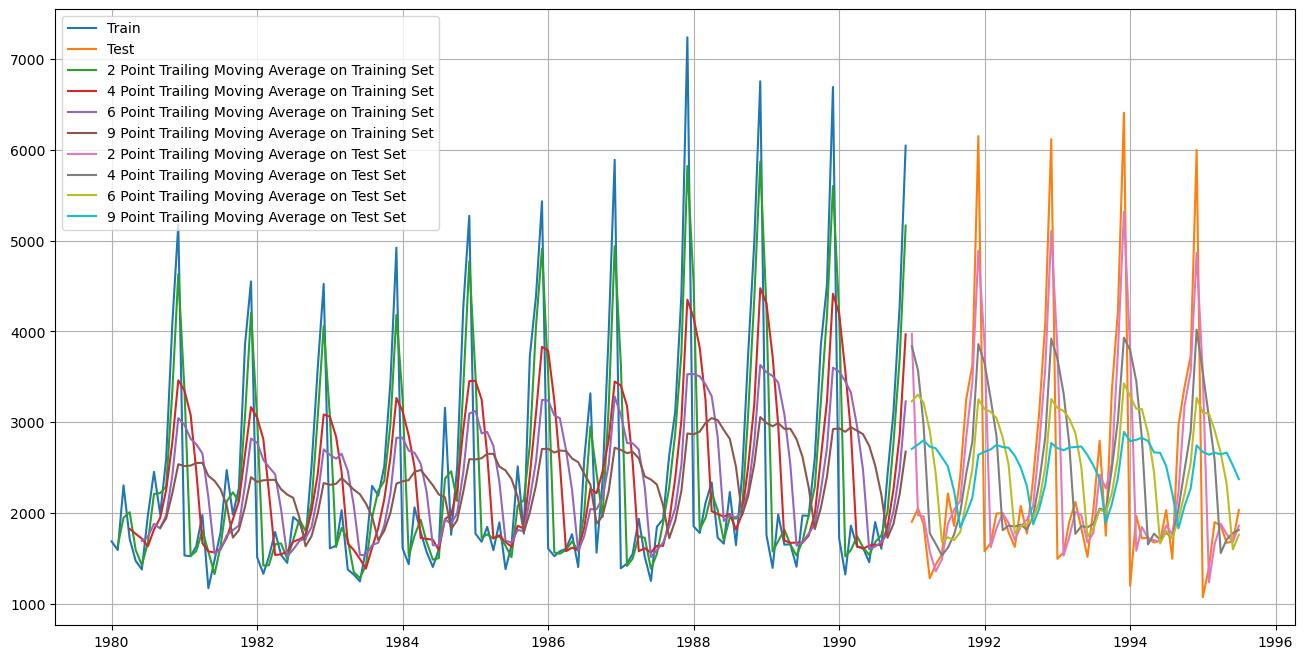

In [151]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

##### Model Evaluation

In [152]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model3_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model3_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model3_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model3_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [153]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
SimpleAverage_Forecast       1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

#### Exponential Model
##### Single Exponential Model

In [154]:
SES_train = train.copy()
SES_test = test.copy()

In [155]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [156]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [157]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2676.676366
1991-02-01       2049  2676.676366
1991-03-01       1874  2676.676366
1991-04-01       1279  2676.676366
1991-05-01       1432  2676.676366

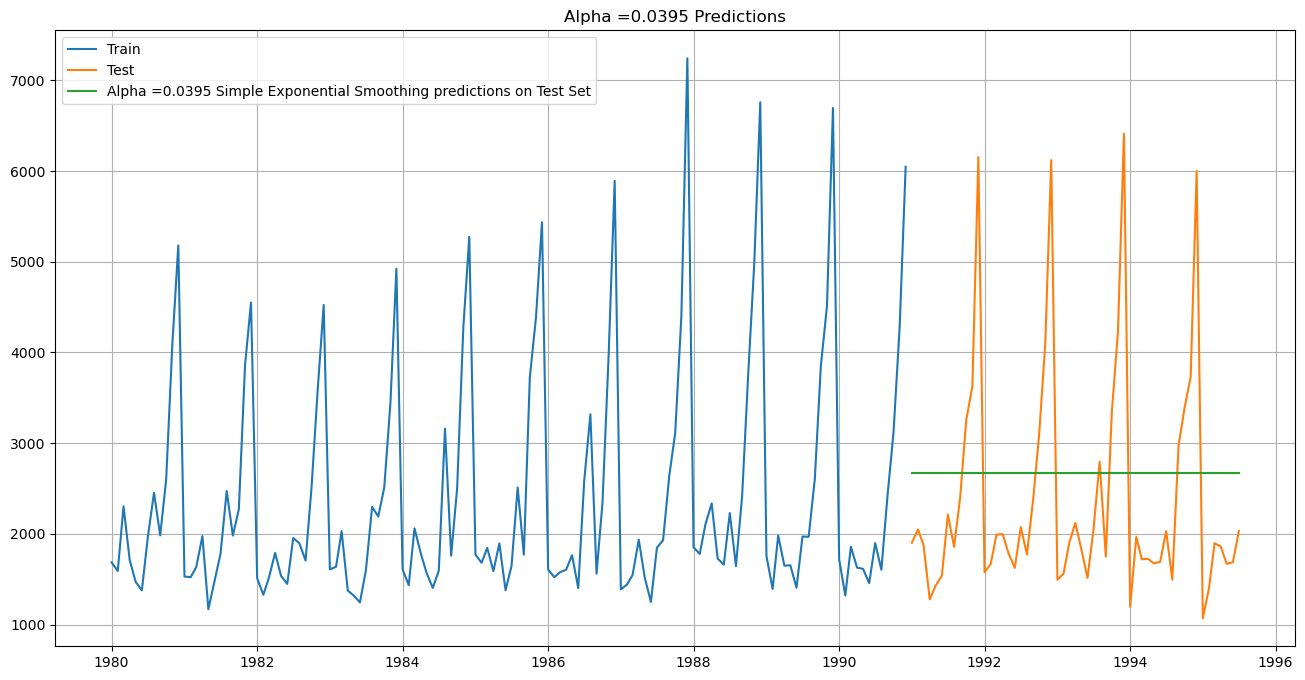

In [158]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0395 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0395 Predictions');

###### Model Evaluation

In [159]:
## Test Data

rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0395 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))

For Alpha =0.0395 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [160]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.0395,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
SimpleAverage_Forecast                   1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405

##### Double Exponential Smoothening

In [161]:
DES_train = train.copy()
DES_test = test.copy()

In [162]:
model_DES = Holt(DES_train['Sparkling'], initialization_method='estimated')

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [163]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [164]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  5401.733026
1991-02-01       2049  5476.005230
1991-03-01       1874  5550.277433
1991-04-01       1279  5624.549637
1991-05-01       1432  5698.821840

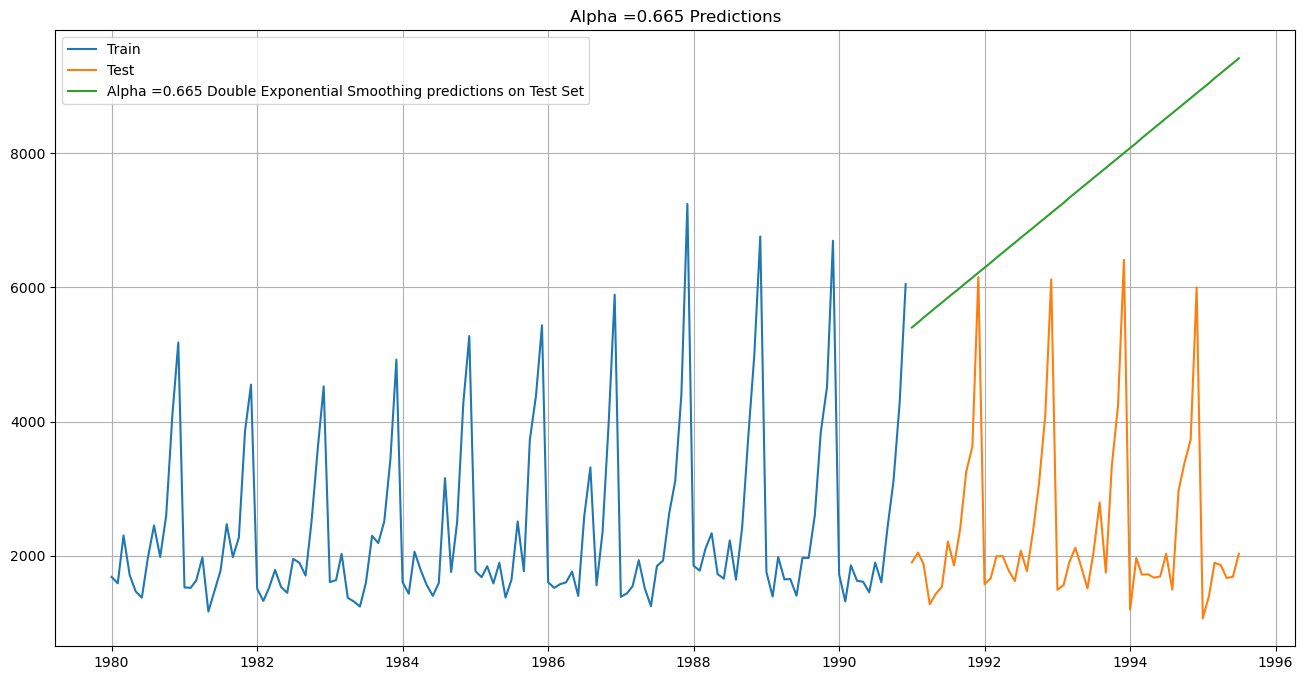

In [165]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.665 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.665 Predictions');

###### Model Evaluation

In [166]:
## Test Data

rmse_model4_test_2 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.665 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_2))

For Alpha =0.665 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 5291.880


In [167]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_2]},index=['Alpha=0.665,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
SimpleAverage_Forecast                   1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405
Alpha=0.665,DoubleExponentialSmoothing   5291.879833

##### Triple Exponential Smoothening 

In [168]:
TES_train = train.copy()
TES_test = test.copy()

In [169]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'], trend= 'additive', 
                                 seasonal = 'additive', initialization_method= 'estimated')

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [170]:
model_TES_autofit = model_TES.fit(optimized=True)
model_TES_autofit.params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [171]:
TES_test['predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  1490.402890
1991-02-01       2049  1204.525152
1991-03-01       1874  1688.734182
1991-04-01       1279  1551.226125
1991-05-01       1432  1461.197883

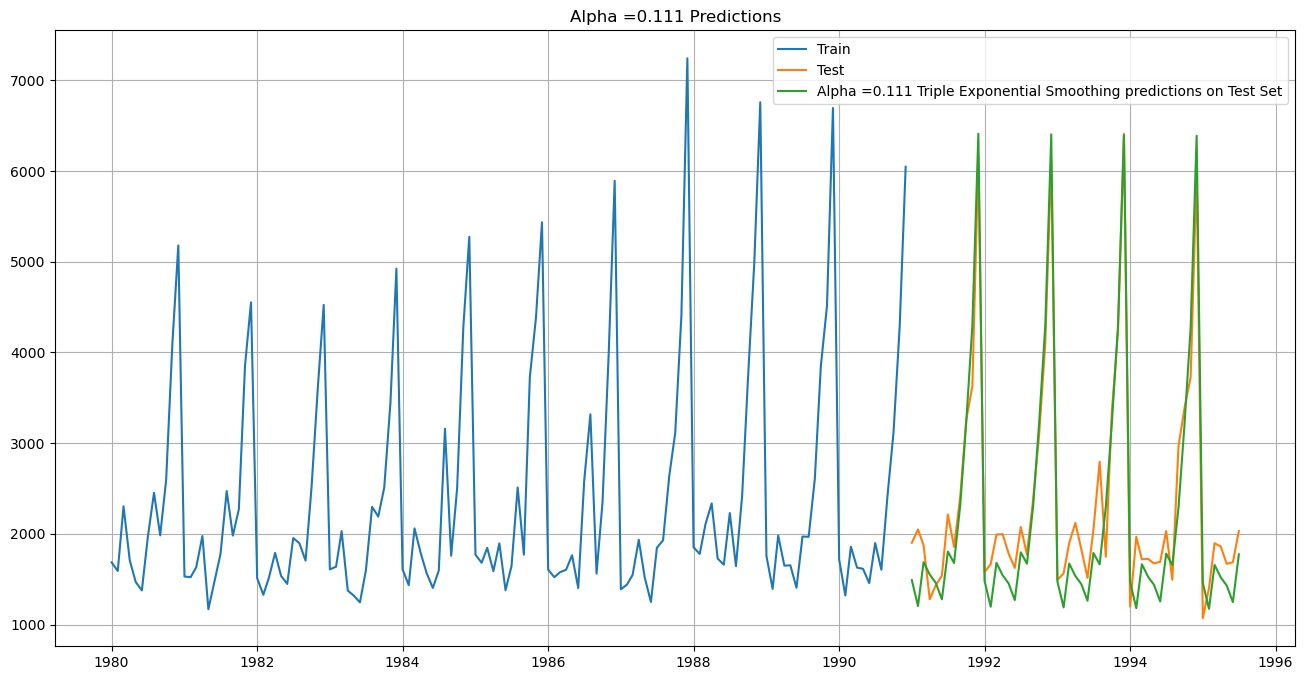

In [172]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['predict'], label='Alpha =0.111 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.111 Predictions');

###### Model Evaluation

In [173]:
## Test Data

rmse_model4_test_3 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict'],squared=False)
print("For Alpha =0.111 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_3))

For Alpha =0.111 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 378.951


In [174]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model4_test_3]},index=['Alpha=0.111,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
SimpleAverage_Forecast                   1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405
Alpha=0.665,DoubleExponentialSmoothing   5291.879833
Alpha=0.111,TripleExponentialSmoothing    378.951023

### Checking for Stationarity in Time Series Data
Before applying ARIMA and SARIMA modelling we have to check if data is stationary as these models need stationary data for which we will do Dickey Fuller Test for which hypothesis are: H0: Data is not stationary. Ha: Data is stationary.

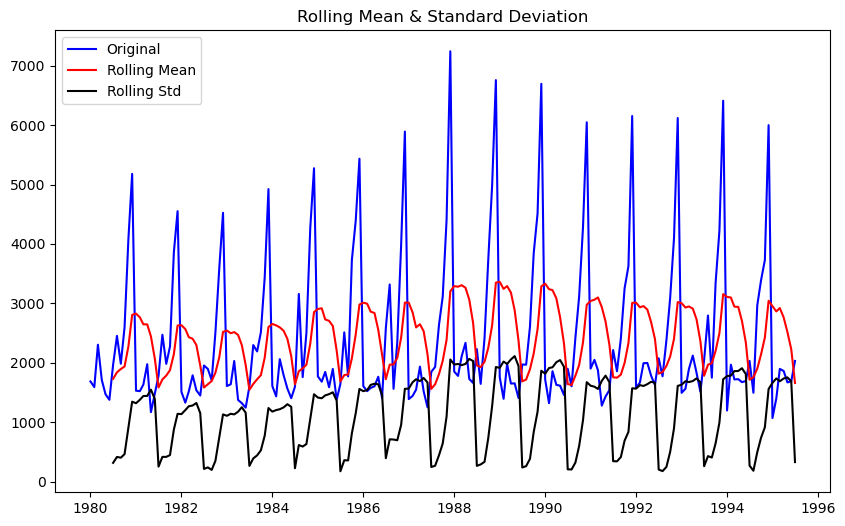

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64
Weak evidence against the null hypothesis, indicating the series is non-stationary.


In [175]:
test_stationarity(sparkling['Sparkling'])

Since, p-value is greater than 0.05 means we cannotreject the null hypothesis that data is not stationary. We will have to make data stationary.
### Making Data Stationary

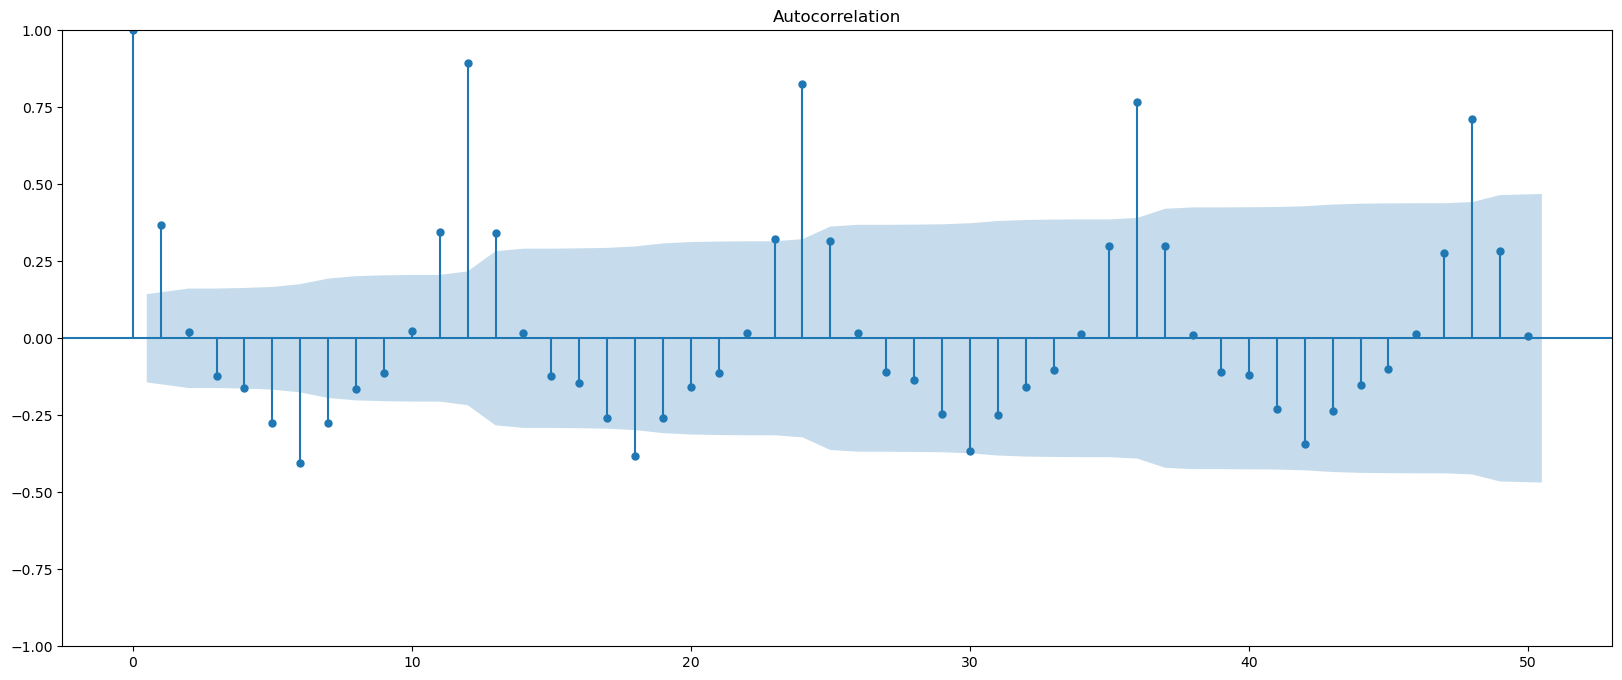

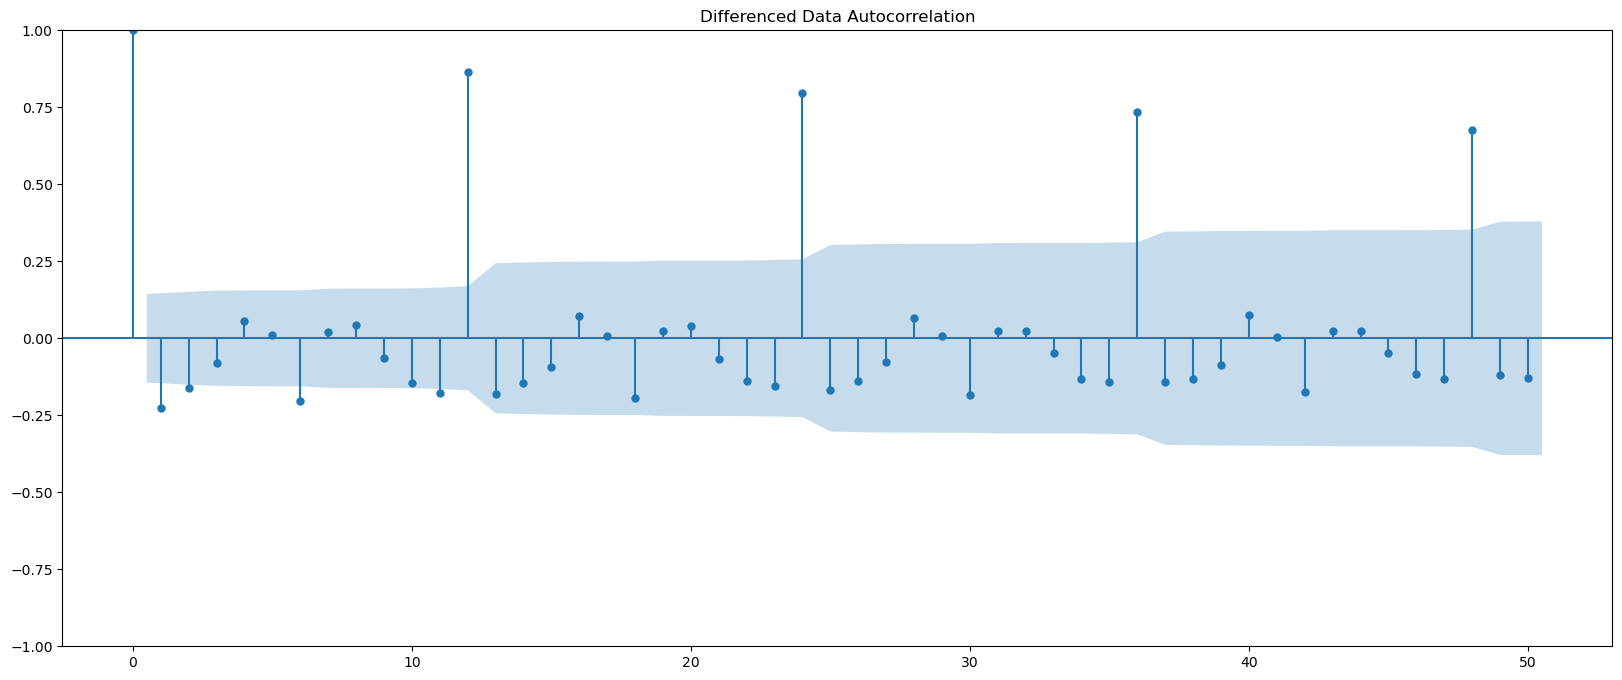

In [176]:
plot_acf(sparkling['Sparkling'],lags=50)
plot_acf(sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [177]:
stationary_df = sparkling.copy()
stationary_df['Seasonal_First_Difference']=stationary_df['Sparkling']-stationary_df['Sparkling'].shift(12)

In [178]:
stationary_df.head(14)

Sparkling  Seasonal_First_Difference
YearMonth                                       
1980-01-01       1686                        NaN
1980-02-01       1591                        NaN
1980-03-01       2304                        NaN
1980-04-01       1712                        NaN
1980-05-01       1471                        NaN
1980-06-01       1377                        NaN
1980-07-01       1966                        NaN
1980-08-01       2453                        NaN
1980-09-01       1984                        NaN
1980-10-01       2596                        NaN
1980-11-01       4087                        NaN
1980-12-01       5179                        NaN
1981-01-01       1530                     -156.0
1981-02-01       1523                      -68.0

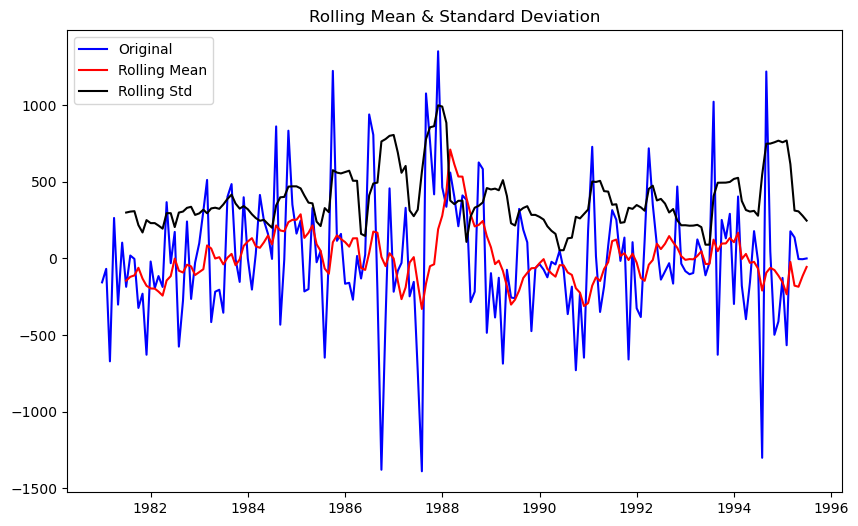

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64
Strong evidence against the null hypothesis (H0), reject the null hypothesis. The series is stationary.


In [179]:
test_stationarity(stationary_df['Seasonal_First_Difference'].dropna())

### Plot for Autocorrelation and Partial Autocorrelation Function

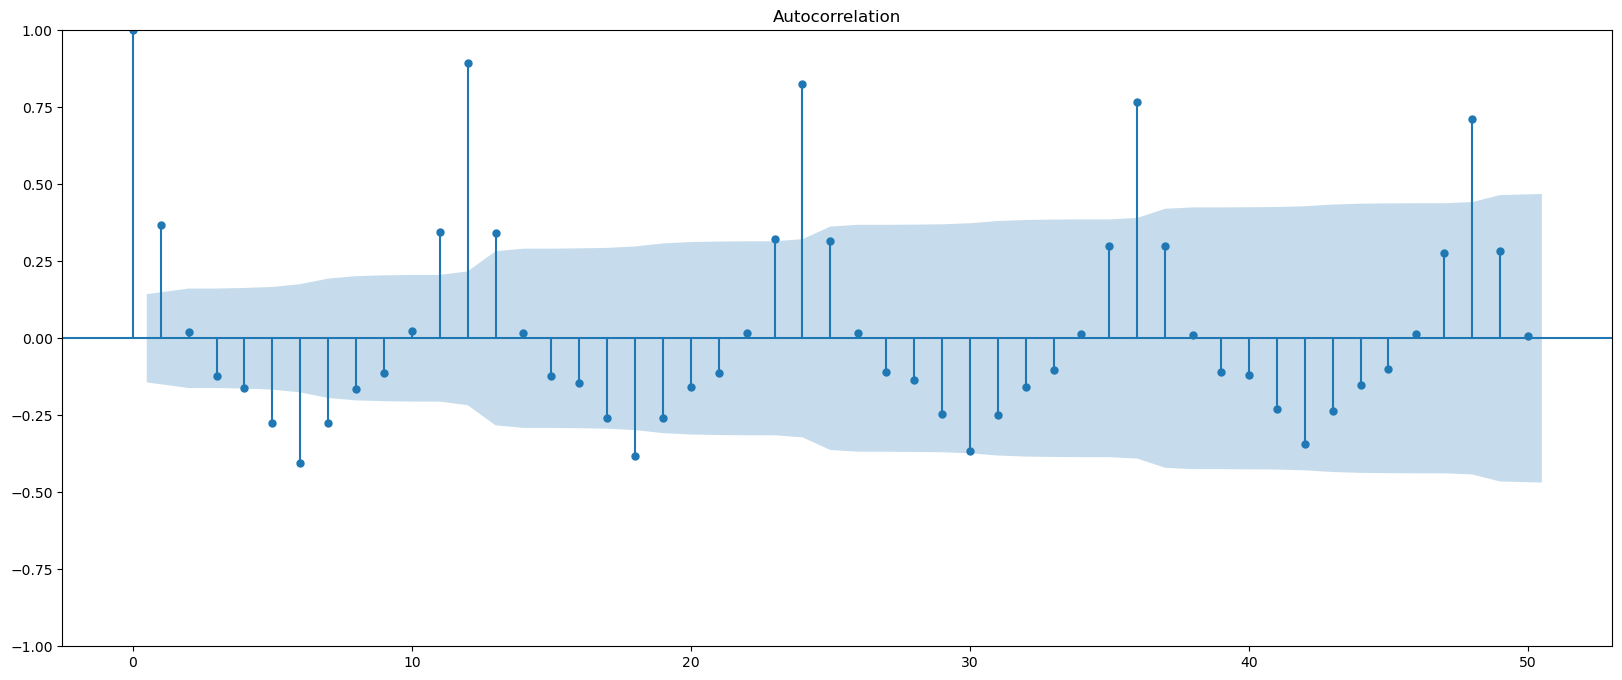

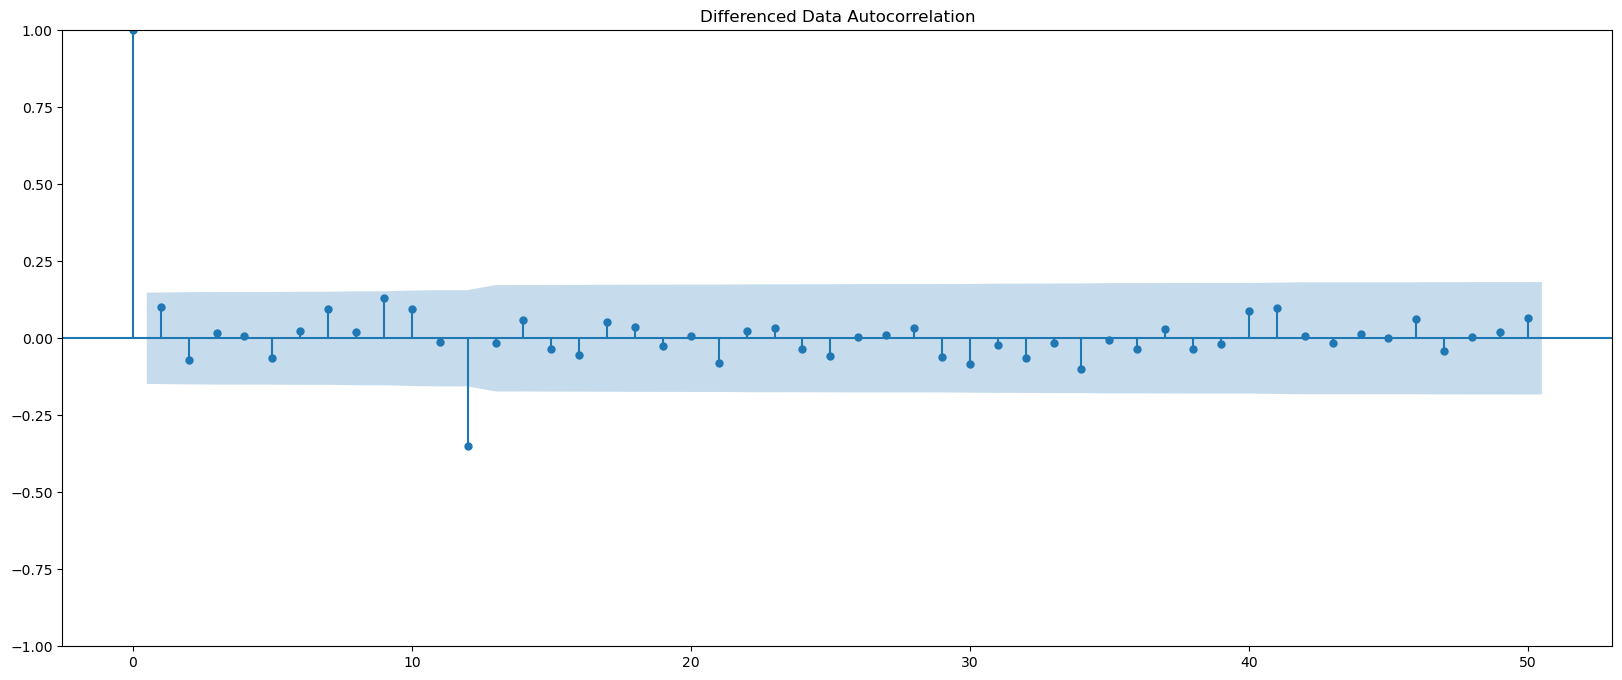

In [180]:
plot_acf(stationary_df['Sparkling'],lags=50)
plot_acf(stationary_df['Seasonal_First_Difference'].dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

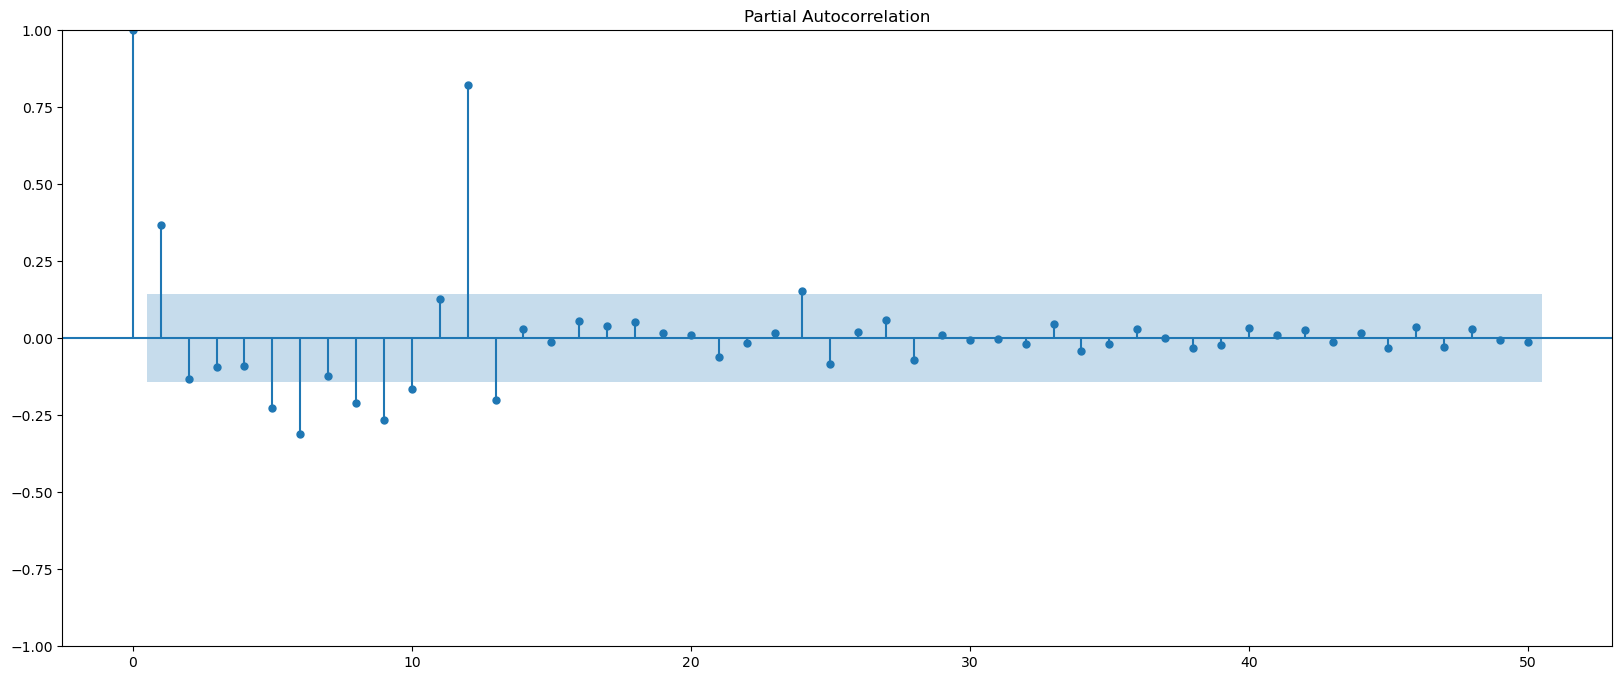

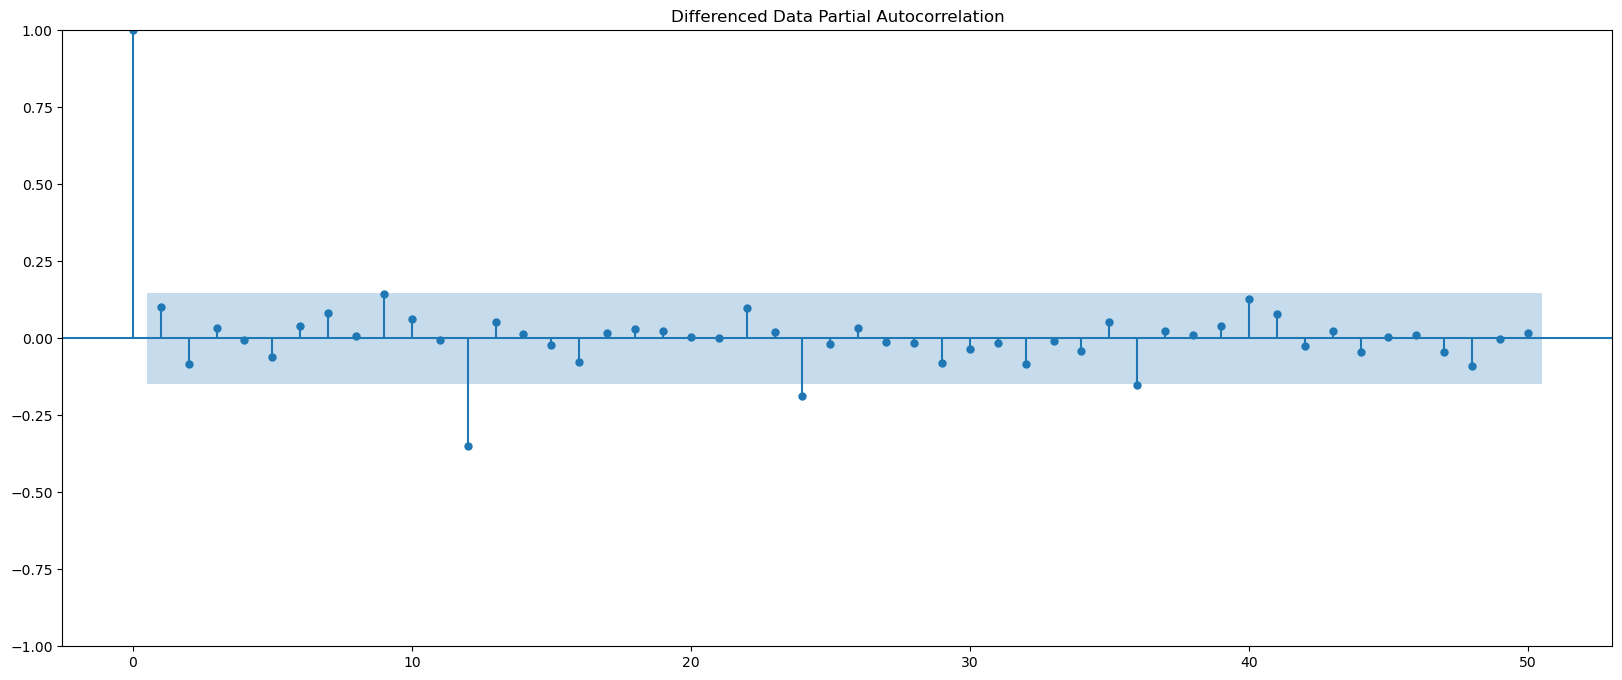

In [181]:
plot_pacf(stationary_df['Sparkling'],lags=50)
plot_pacf(stationary_df['Seasonal_First_Difference'].dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Autocorrelation and Partial Autocorrelation Function are used to calculate optimum values of auto regression(AR) and moving average(MA) represented by p and q respectively. From the above plot we can conclude that optimum value of p should be 1 and q should be 0.
### Model Building - Stationary Data
#### ARIMA Modelling
Though we have calculated optimum value of p and q using ACF and PACF plot, however, for building model we will be taking a range of p and q and calculate optimum values of p and q using auto ARIMA model.

In [182]:
# getting a combination of different parameters of p and q in the range of 0 and 3 while keeping d constant at 1
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [183]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [184]:
# Loop through the parameter combinations in pdq
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

    # Use pd.concat instead of append
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231246896
ARIMA(0, 1, 3) - AIC:2233.9948577461982
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.5272004519966
ARIMA(1, 1, 3) - AIC:2235.607807761712
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122972337


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9347720936876
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989261087767


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.7834294952218
ARIMA(3, 1, 3) - AIC:2221.458953312183


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [185]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.458953
14  (3, 1, 2)  2230.783429
11  (2, 1, 3)  2232.934772
9   (2, 1, 1)  2233.777626

In time series the best combination of p, d and q is the one with lowest AIC value for which we have sorted the above table in ascending order of AIC value based on which we can conclude that the best set of parameters are p =2, d =1 and q =2. Now we will manually build an ARIMA model using these best best parameters.

In [186]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 22 Sep 2024   AIC                           2213.509
Time:                        21:41:10   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

##### Predict on the Test Set using this model and evaluate the model

In [187]:
# Make sure the forecast returns a series or array with the correct shape
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [188]:
# Check if the prediction is a one-dimensional array
if isinstance(predicted_auto_ARIMA, tuple):
    predicted_auto_ARIMA = predicted_auto_ARIMA[0]  # Extract forecasted values if it's a tuple

In [189]:
# Now calculate RMSE, ensuring both are array-like
rmse_model5 = metrics.mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared=False)
print('For ARIMA(2, 1, 2) Model with  forecast on the Test Data, RMSE is %3.3f',rmse_model5)

For ARIMA(2, 1, 2) Model with  forecast on the Test Data, RMSE is %3.3f 1299.9796651035053


In [190]:
tempDf = pd.DataFrame({'Test RMSE': [rmse_model5]},index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
SimpleAverage_Forecast                   1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405
Alpha=0.665,DoubleExponentialSmoothing   5291.879833
Alpha=0.111,TripleExponentialSmoothing    378.951023
ARIMA(2,1,2)                             1299.979665

#### SARIMA Modelling
Checking the ACF plot once more to understand the seasonal parameter for the SARIMA model

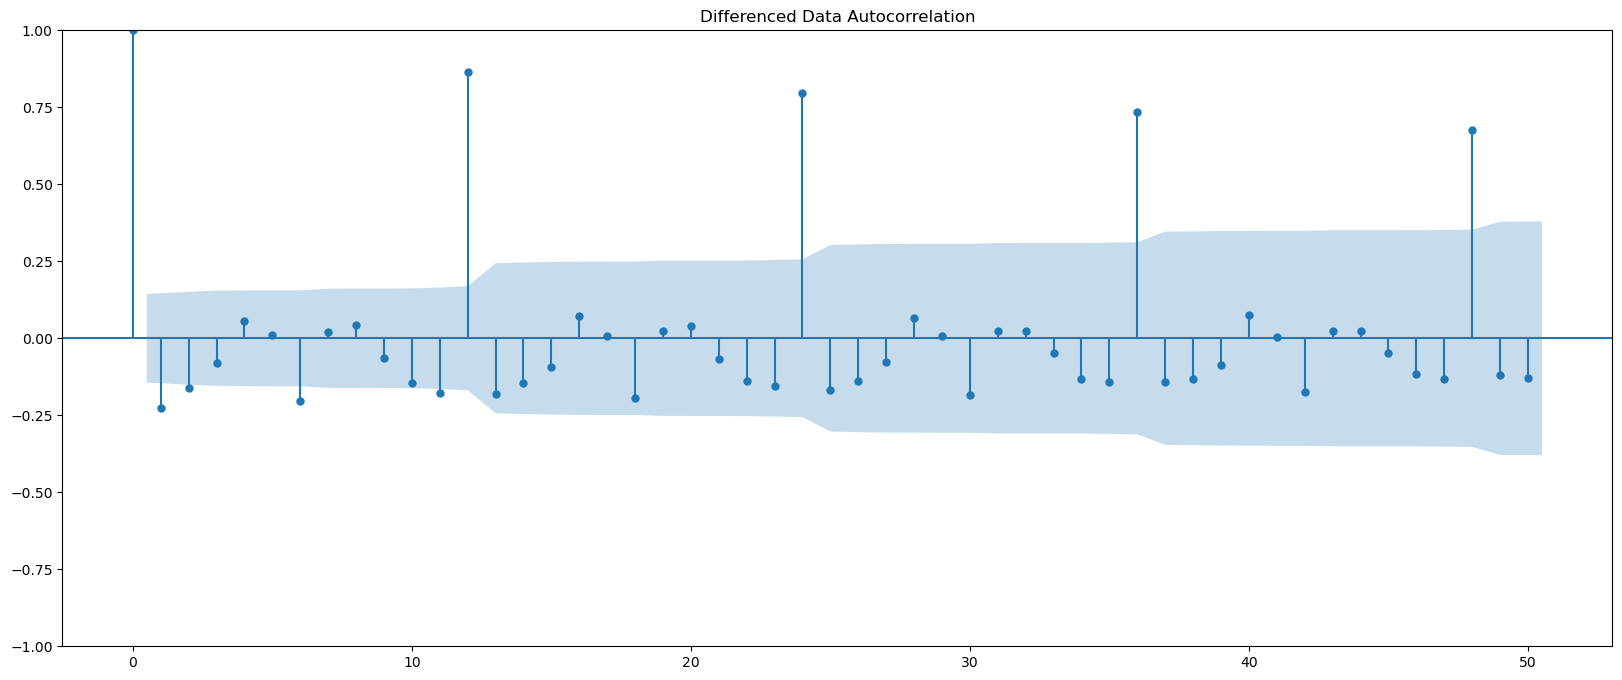

In [191]:
plot_acf(sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting as 12

In [192]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [193]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [194]:
# Loop through the parameter combinations
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Fit the SARIMA model using scaled data
            SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
            # Fit the model with more iterations and an alternative optimization method
            results_SARIMA = SARIMA_model.fit(maxiter=2000, disp=False)

            # Print the AIC for the parameter combination
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

            # Create a new row for AIC values
            new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})

            # Ensure the new row has no NA values
            if not new_row.isnull().values.any():
                SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)

        except Exception as e:
            print(f"Error fitting SARIMA{param}x{param_seasonal}: {e}")

# Display the DataFrame with the SARIMA model results
print(SARIMA_AIC)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239968


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7441.156431906364
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.99053013904


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791699


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3742.4318141456943
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861558


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3758.958248306006
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064363


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2950.5228748181057
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566844


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573006324


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7427.391419134551
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837984


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193742768


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509150145243


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3331.3367708164665
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417734


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085233474


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823777876


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3242.048908315573
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679619842


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8728002829832


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891885573647


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3005.873287168287
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168744
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.912800720163


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890419562


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7347.254422598457


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332192383


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675071234652


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605066827487


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3943.3159544854625
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.965477453014


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800300083


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215627094996


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3853.4319077652203
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407960618


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.744837574966


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.688385865908


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3618.2103784080728
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540843581


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770699174853


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661853705


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:1457.083018232741
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0300713533381


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404078841608


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741911993455


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2626.7265697982302
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807487047


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674901347872


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0489354480344


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2712.055991415852
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529450434728


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.143517602748


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1487134060176


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3411.767502388442
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903916


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355315


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7508.163889427939
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330842


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592675163


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402568434


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3555.193808940587
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.635508012921


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613212748


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067421107


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3481.3079449981556
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464037472


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780410137


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392671717


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3203.77402849772
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154559
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974129917


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352614644


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:7424.533576402358


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466961123


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167467762902


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.324886362122


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3421.592059506643


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606880116


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223596562


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.806997734684


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3319.193525686612
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074175507


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502479080563


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0903516598435


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3098.7190959557292
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.46334505039
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307497978


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142172496


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:7349.248540796093


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799323162


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.995219085458


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468653373


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4185.485206859459
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931854737


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5250824092595


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.929653763627


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4103.9579191462635
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102454390962


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146973696097


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690352234713


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3865.2962361558825
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977749
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938144932518


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5218840764117


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596092307


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554931157354


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744593339334


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3184.7784909034835
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154074565195


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668987821693


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292703301851


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3103.607694859126
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723360496666


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.751026959451


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649221711683


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3045.4950891013314
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408604


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039816634


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7504.526807024466
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066058476


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349386835


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702205386902


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3733.282356696875


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464817833


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344992012096


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.91917796358


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3557.0857337626685
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030795


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619047702


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975642165332


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3369.996863540069
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145673


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422107


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080333774


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7424.346020440857


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290832254


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911268215784


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888281207443


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2731.920791447947
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897175


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595848158415


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428687239907


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3607.9267231374024


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332894949


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221328135316


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8240272256862


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2847.4333256385553
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147583393


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372618012723


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433033331


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7350.942466338702


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931427282


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005728415635


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404021467243


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3412.612711214422
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455927177602


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5435584939323


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401321999602


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3406.230421867368
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376155229668


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040417347652


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358987606074


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3033.841569535655
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395874096625


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1866.915280709091


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.708453192231


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:7263.081927022511


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.835715562202


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8433043233354


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.528848698678


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3586.7263580964504
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6909621009122


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1569.6189016145647


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.997677218719


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3539.9690558789994


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898959620748


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.9922799990725


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1408.2861841598963


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3303.910912354884
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.368629141899


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923147877


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7503.735447062872


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703274


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834244323


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471968220904


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3306.807335399122
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255634


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812675444


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808195585174


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3610.174053317011


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862039468


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.67747087659


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074710708647


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3038.06280894953
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983380075


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9733080149717


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405050447


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7426.749958295574


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222530086697


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.308503657258


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6845029339022


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2733.9199058472527
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505414363


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959856754123


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349817054142


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3572.2358435341357


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313099637


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814843598447


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958979357541


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3337.9538862218715


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271656717


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.78043530412


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255189465583


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:7351.329197535243


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635863811031


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.3650417584151


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364231166082


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3647.000302964309
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.956455465201


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894324945112


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091555480532


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3578.628056495706


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1401.954805231042


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026167156149


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7020106413324


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2560.7902606207504
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046704


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1877.329578815812


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.782992622709


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7259.955017860645


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1750.4741259693008


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985076625482


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3936110911234


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2640.9890067170218
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.176723349472


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1562.7148211909662


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7736406022666


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3412.8060776184075


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.497015716352


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.5506840309074


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1392.63166996728


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2883.1786389690274
         param       seasonal          AIC
0    (0, 1, 0)  (0, 0, 0, 12)  2251.359720
1    (0, 1, 0)  (0, 0, 1, 12)  1956.261462
2    (0, 1, 0)  (0, 0, 2, 12)  1723.153364
3    (0, 1, 0)  (0, 0, 3, 12)  7441.156432
4    (0, 1, 0)  (1, 0, 0, 12)  1837.436602
..         ...            ...          ...
251  (3, 1, 3)  (2, 0, 3, 12)  3412.806078
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497016
253  (3, 1, 3)  (3, 0, 1, 12)  1393.550684
254  (3, 1, 3)  (3, 0, 2, 12)  1392.631670
255  (3, 1, 3)  (3, 0, 3, 12)  2883.178639

[256 rows x 3 columns]


C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [195]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497016
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602617
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484

From the above table which is sorted in ascending order of AIC score we can take the best values of parameters at (1, 1, 3)	(0, 0, 3, 12). We will build the final SARIMA model using these parameters.

In [196]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train,
                                order=(1,1,3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=2000, disp=False)
print(results_auto_SARIMA.summary())

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(0, 0, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 22 Sep 2024   AIC                             16.000
Time:                                    21:49:25   BIC                             36.087
Sample:                                01-01-1980   HQIC                            24.104
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          6.3599         -0       -inf      0.000       6.360       6.360
ma.L1          2.4977         -0   

On builing the model using best parameters we are getting a warning stating that condition number is infinite meaning there is an issue with the accuracy and reliability of the model's parameter estimates due to numerical instability which would make this model unstable thus we will rebuild the model taking second best set of parameters which are (3, 1, 3)	(3, 0, 0, 12).	

In [197]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train,
                                order=(3,1,3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=2000, disp=False)
print(results_auto_SARIMA.summary())

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -683.749
Date:                             Sun, 22 Sep 2024   AIC                           1387.497
Time:                                     21:49:32   BIC                           1412.715
Sample:                                 01-01-1980   HQIC                          1397.675
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6747      0.142    -11.819      0.000      -1.952      -1.397
ar.L2         -0.7438      

Though the warning is stating that statndar error could be unstable since condition number is very high, however, unlike previous case where the condition number was infinity, here we have got a computable number. Thus, we will continue with these parameters. 

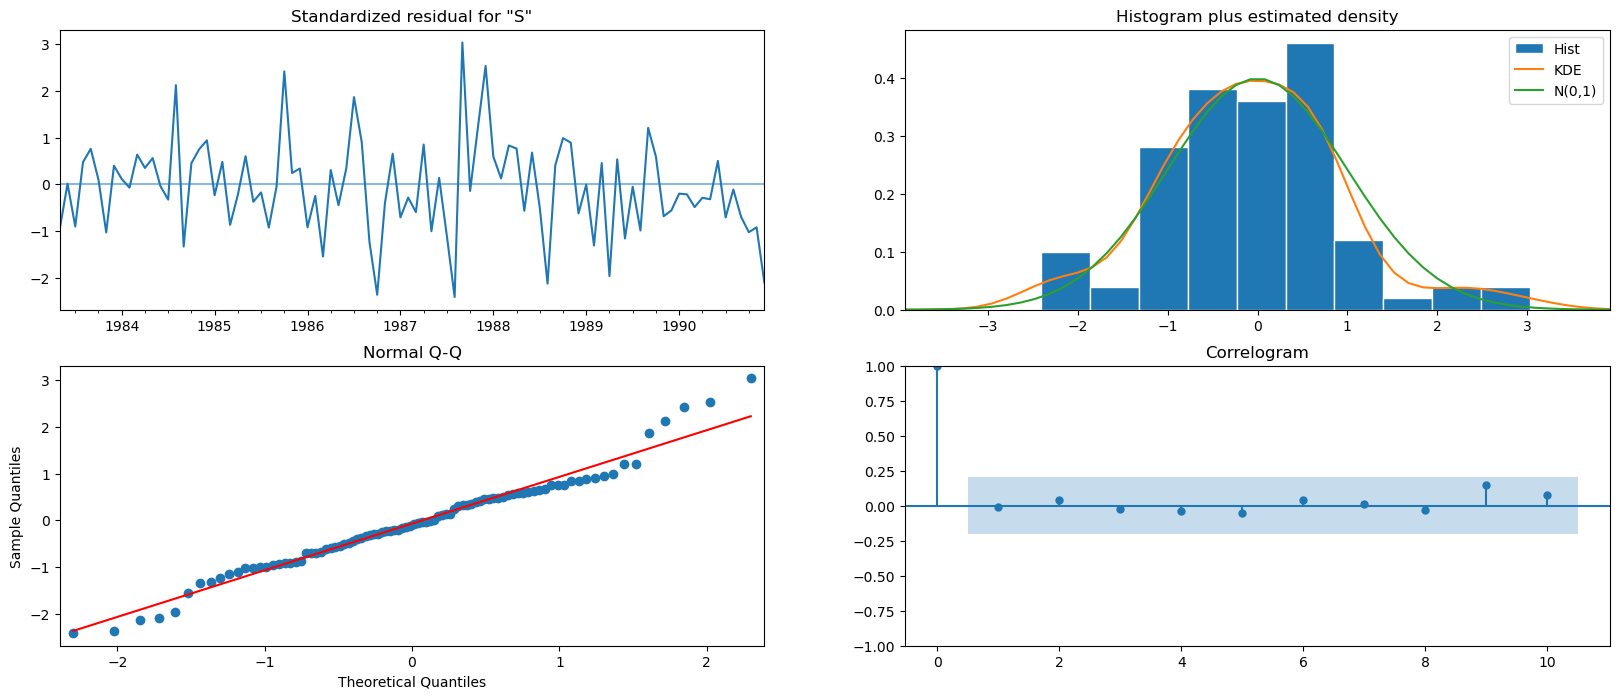

In [198]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In the above diagnostic plot residuals are randomly scattered meaning we have optimized the model.
##### Predict on the Test Set using this model and evaluate the model

In [199]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [200]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1342.048706  394.805743     568.243669    2115.853743
1991-02-01  1350.628086  419.587483     528.251730    2173.004441
1991-03-01  1578.381746  421.162002     752.919391    2403.844102
1991-04-01  1667.684437  432.679813     819.647586    2515.721288
1991-05-01  1320.556339  432.713748     472.452978    2168.659701

In [201]:
rmse_model6 = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('For SARIMA(3, 1, 3) (3, 0, 0, 12) Model with  forecast on the Test Data, RMSE is %3.3f',rmse_model6)

For SARIMA(3, 1, 3) (3, 0, 0, 12) Model with  forecast on the Test Data, RMSE is %3.3f 611.4731936284929


In [202]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model6]},index=['SARIMA(3,1,3)(3,0,0,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
RegressionOnTime                         1275.867052
SimpleAverage_Forecast                   1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405
Alpha=0.665,DoubleExponentialSmoothing   5291.879833
Alpha=0.111,TripleExponentialSmoothing    378.951023
ARIMA(2,1,2)                             1299.979665
SARIMA(3,1,3)(3,0,0,12)                   611.473194

In [203]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
Alpha=0.111,TripleExponentialSmoothing    378.951023
SARIMA(3,1,3)(3,0,0,12)                   611.473194
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
SimpleAverage_Forecast                   1275.081804
RegressionOnTime                         1275.867052
6pointTrailingMovingAverage              1283.927428
ARIMA(2,1,2)                             1299.979665
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405
9pointTrailingMovingAverage              1346.278315
Alpha=0.665,DoubleExponentialSmoothing   5291.879833

From the above table we can conclude that Alpha=0.111,TripleExponentialSmoothing model is the best performing model as it has the lowest RMSE score. For forecasting we will use this model.
### Building the most optimum model on the Full Data

In [204]:
fullmodel = ExponentialSmoothing(sparkling,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.012,
                                                                 smoothing_seasonal=0.461)

C:\Users\piyus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [205]:
RMSE_fullmodel = metrics.mean_squared_error(sparkling['Sparkling'],fullmodel.fittedvalues,squared=False)

print('For Alpha=0.111,TripleExponentialSmoothing model forecast on the full Data,  RMSE is %3.3f',RMSE_fullmodel)

For Alpha=0.111,TripleExponentialSmoothing model forecast on the full Data,  RMSE is %3.3f 356.96820003228873


In [206]:
# Predict for the next 12 months
forecast_12 = fullmodel.forecast(12)
print("Forecasted values for the next 12 months:\n", forecast_12)

Forecasted values for the next 12 months:
 1995-08-01    1860.790317
1995-09-01    2470.931957
1995-10-01    3200.128073
1995-11-01    3806.537212
1995-12-01    5967.647889
1996-01-01    1224.569165
1996-02-01    1600.114618
1996-03-01    1861.874819
1996-04-01    1845.012697
1996-05-01    1681.565864
1996-06-01    1635.125010
1996-07-01    1993.194193
Freq: MS, dtype: float64


In [207]:
# Create forecast index (next 12 months)
last_date = sparkling.index[-1]  # Get the last date in the historical data
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

In [208]:
# Calculate residuals (actual - fitted values)
residuals = sparkling['Sparkling'] - fullmodel.fittedvalues
print("Residuals summary:\n", residuals.describe())


Residuals summary:
 count     187.000000
mean       -5.717768
std       357.880587
min     -1173.545694
25%      -191.202207
50%       -47.946647
75%       151.944970
max      1610.669878
dtype: float64


In [209]:
# Calculate the 95% confidence intervals
lower_percentile = np.percentile(residuals, 2.5)  # 2.5 percentile for lower bound
upper_percentile = np.percentile(residuals, 97.5)  # 97.5 percentile for upper bound
print("Lower Percentile:", lower_percentile)
print("Upper Percentile:", upper_percentile)


Lower Percentile: -776.3574393351099
Upper Percentile: 927.8340509816887


In [210]:
# Create upper and lower confidence bands
lower_bound = forecast_12 + lower_percentile
upper_bound = forecast_12 + upper_percentile
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 1995-08-01    1084.432878
1995-09-01    1694.574517
1995-10-01    2423.770633
1995-11-01    3030.179772
1995-12-01    5191.290450
1996-01-01     448.211726
1996-02-01     823.757178
1996-03-01    1085.517379
1996-04-01    1068.655258
1996-05-01     905.208425
1996-06-01     858.767571
1996-07-01    1216.836753
Freq: MS, dtype: float64
Upper Bound: 1995-08-01    2788.624368
1995-09-01    3398.766008
1995-10-01    4127.962124
1995-11-01    4734.371263
1995-12-01    6895.481940
1996-01-01    2152.403216
1996-02-01    2527.948669
1996-03-01    2789.708870
1996-04-01    2772.846748
1996-05-01    2609.399915
1996-06-01    2562.959061
1996-07-01    2921.028244
Freq: MS, dtype: float64


In [211]:
forecast_12.index = forecast_index
lower_bound.index = forecast_index
upper_bound.index = forecast_index

In [212]:
# Create a DataFrame with forecast values and confidence intervals
forecast_df = pd.DataFrame({
    'prediction': forecast_12,
    'lower_CI': lower_bound,
    'upper_CI': upper_bound
}, index=forecast_index)

In [213]:
# Display the DataFrame with the predictions and confidence intervals
display(forecast_df)

prediction     lower_CI     upper_CI
1995-08-31  1860.790317  1084.432878  2788.624368
1995-09-30  2470.931957  1694.574517  3398.766008
1995-10-31  3200.128073  2423.770633  4127.962124
1995-11-30  3806.537212  3030.179772  4734.371263
1995-12-31  5967.647889  5191.290450  6895.481940
1996-01-31  1224.569165   448.211726  2152.403216
1996-02-29  1600.114618   823.757178  2527.948669
1996-03-31  1861.874819  1085.517379  2789.708870
1996-04-30  1845.012697  1068.655258  2772.846748
1996-05-31  1681.565864   905.208425  2609.399915
1996-06-30  1635.125010   858.767571  2562.959061
1996-07-31  1993.194193  1216.836753  2921.028244

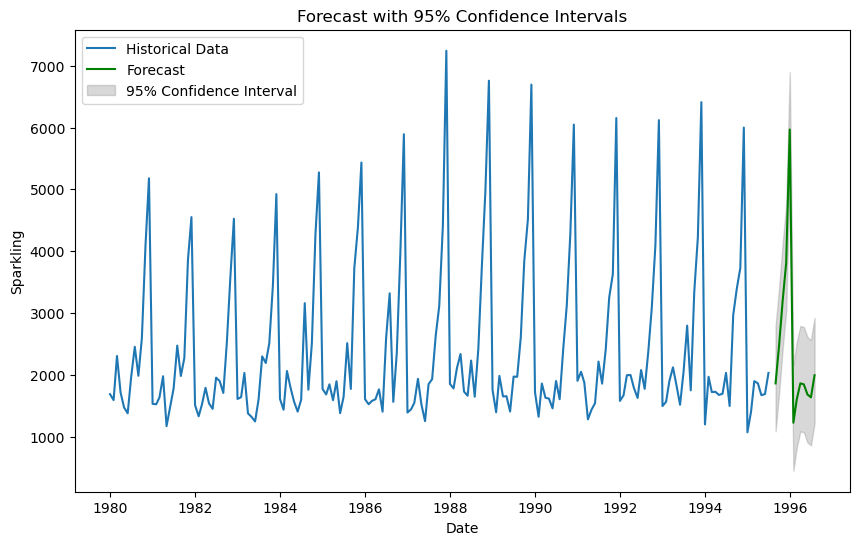

In [214]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sparkling.index, sparkling['Sparkling'], label='Historical Data')
plt.plot(forecast_index, forecast_12, label='Forecast', color='green')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sparkling')
plt.title('Forecast with 95% Confidence Intervals')
plt.legend()

# Show plot
plt.show()

The plot above illustrates the forecasted sales, represented by the orange line, for the next 12 months. The shaded region around it indicates the range within which sales are expected to fall with 95% confidence.
# Conclusion
ABC Estate Wines provided historical sales data for their Rosé and Sparkling wines. After a detailed analysis, we were able to uncover the following key insights.
### Key Insights
1. In wine sales for both variants there was clear seasonality where January has the lowest sales and December has highest sales, additionally, throughout the year sales tend to consistently peaking in the month of December which coincides with the holiday season.
2. Variant specific insights:

For Rose Wine:
* Sales of Rosé wine have experienced a steady decline over the years. In December 1980, approximately 260 units were sold, but by 1994, this number had dropped to around 80 units, which is even lower than the lowest sales month in 1980.

For Sparkling Wine:
* The demand for Sparkling wine has remained almost consistent for this entire time period.
* While year-on-year sales data for sparkling wine shows some fluctuations, these are likely influenced by factors beyond the general trend. A separate analysis could be conducted to better understand the causes of these fluctuations. This would be crucial in improving the forecasting model's accuracy, especially since sparkling wine sales have consistently been higher than those of Rosé, and even more so now as the company faces a decline in Rosé sales.
3. Using the provided data, we built a forecasting model that predicts future wine sales by accounting for both trend and seasonality. After testing various models, we selected the 2-point moving average model as the best-performing model for Rosé wine, and the Triple Smoothing Model (Holt-Winter's Linear Method) for Sparkling wine

### Business Recommendations
1. The demand shows a increase from January to December, allowing ABC Wine Estate to manage inventory accordingly. In particular, demand rises significantly in December, making advanced planning and maintaining adequate stock level is crucial. This proactive approach will enable the company to fully capitalize on the peak sales season, maximizing revenue and minimizing the risk of stockouts.
2. The Rose Wine variant has experienced a steady decline in sales. To maintain a competitive edge in the wine industry, ABC Estate Wine is strongly advised to investigate the reasons behind this decline. It is essential to determine whether the decline is a broader industry trend or specific to the company. Based on these insights, necessary corrective actions should be taken to address the issue and enhance future performance.
3. Data for two wine variants were provided, showing that while sales for one variant have seen a steady decline, the other has remained relatively unchanged over a span of 15 years. This indicates that business growth is at best stagnant for these specific variants. If ABC Estate Wines produces other wine variants, it is recommended that similar analysis projects be conducted for those as well. This will enable the company to better understand its overall market position and plan its future course of action effectively.